In [76]:
import healpy as hp
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.signal as signal

In [73]:
files = os.listdir('./PowerSpectrum/')
titles = [word[27:-4] for word in files]

In [14]:
data = np.load('./PowerSpectrum/'+files[0])

for i in range(1, len(files)):
    data = np.vstack((data, np.load('./PowerSpectrum/'+files[i])))

## Lens and Not Lensed Ratios

In [26]:
ratioLensToNotLensed = data[:36]

for i in range(36):
    ratioLensToNotLensed[i] = data[i]/data[i+36]

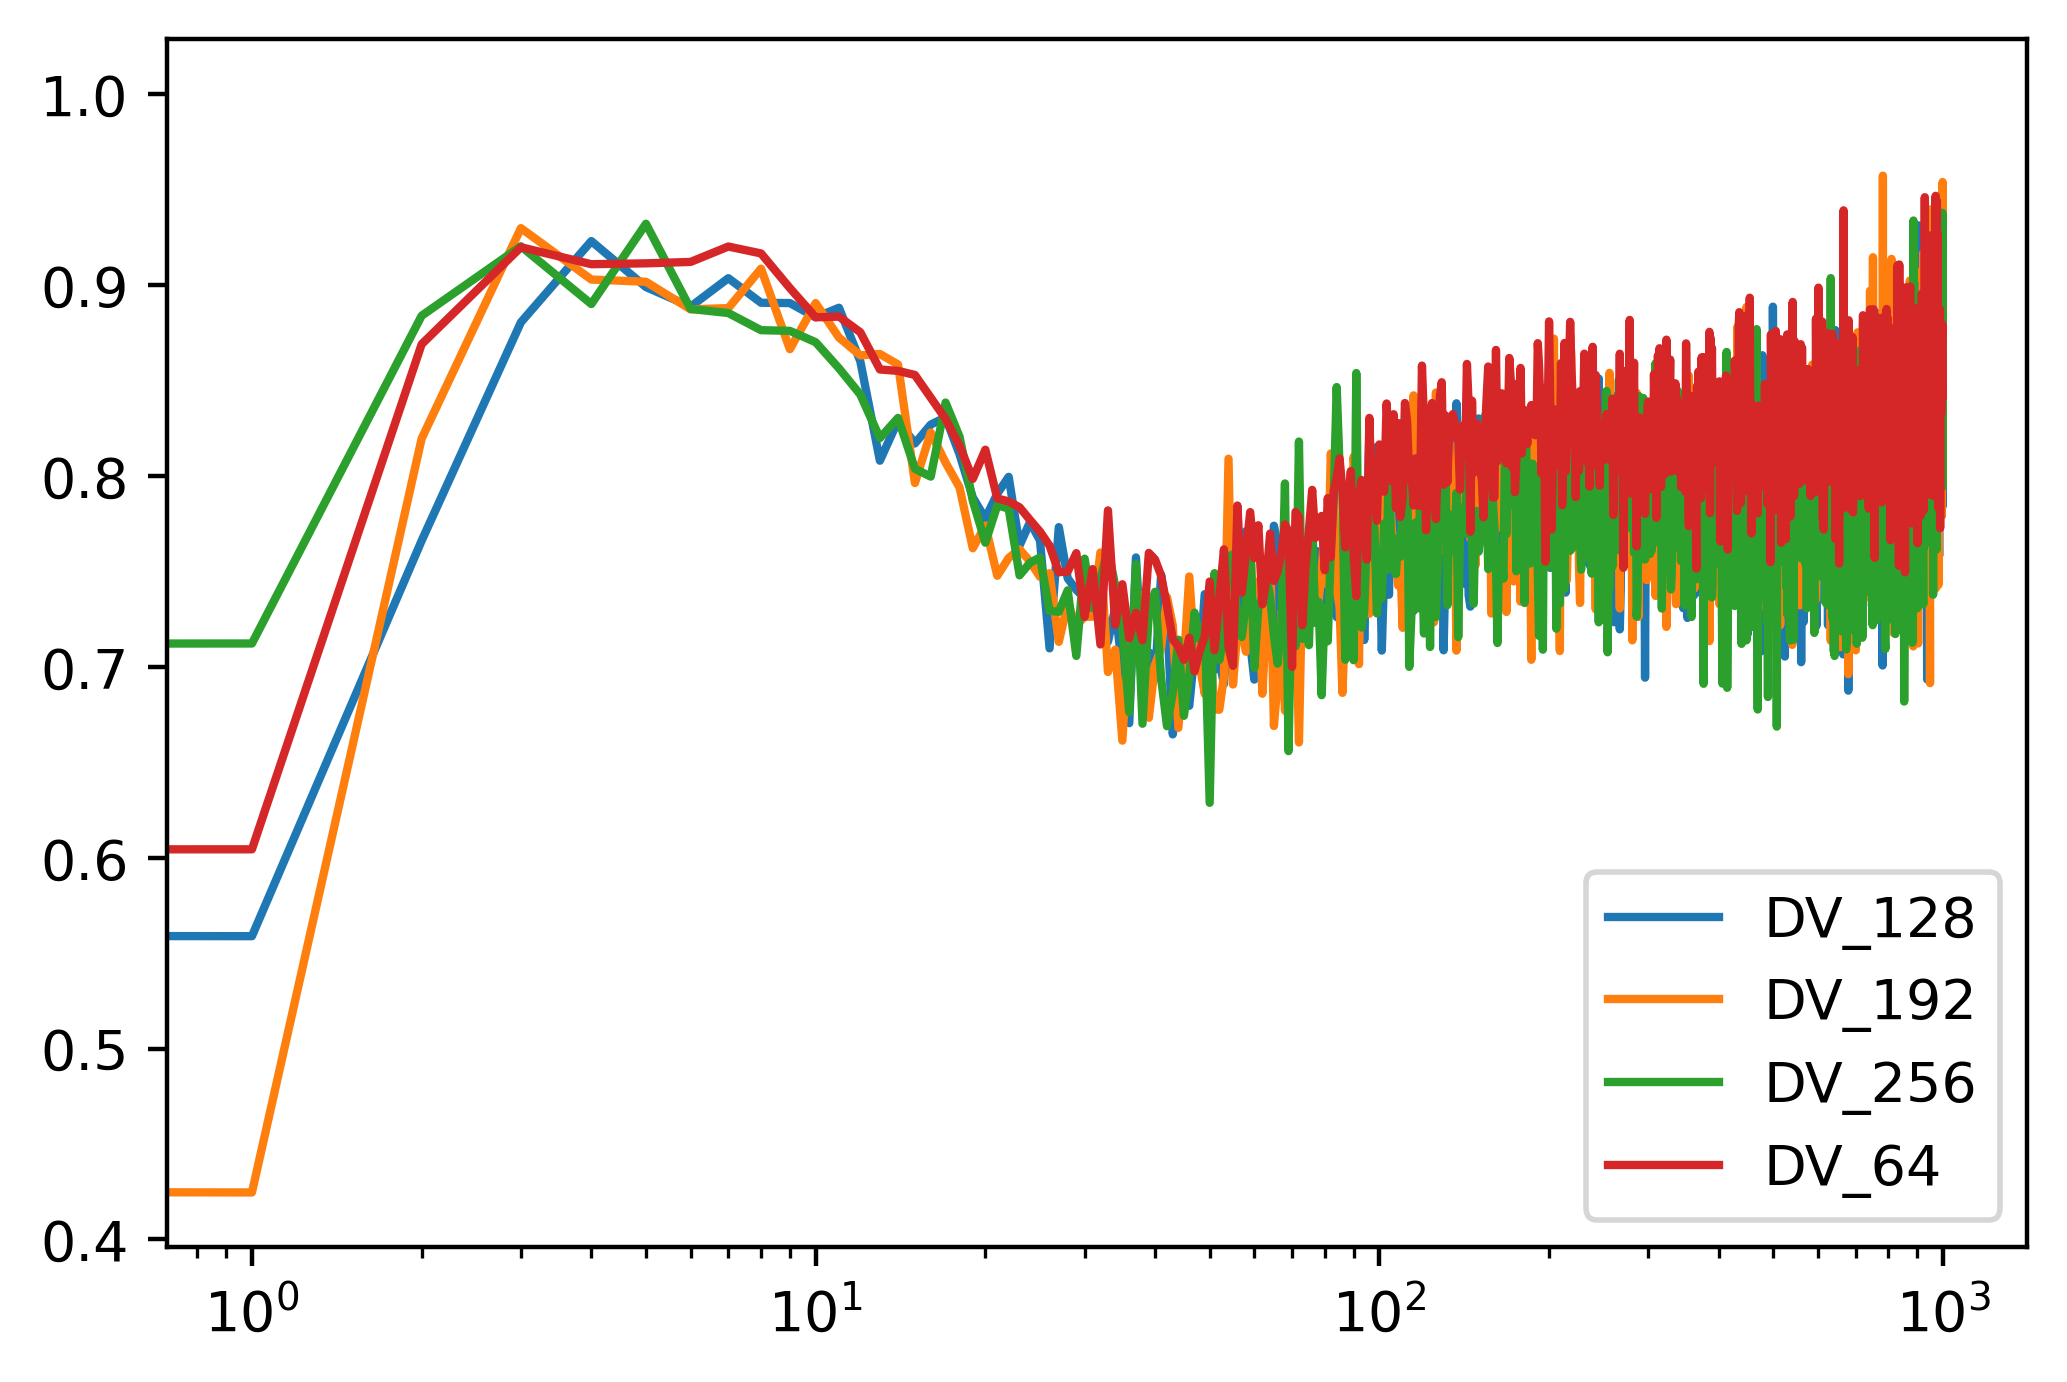

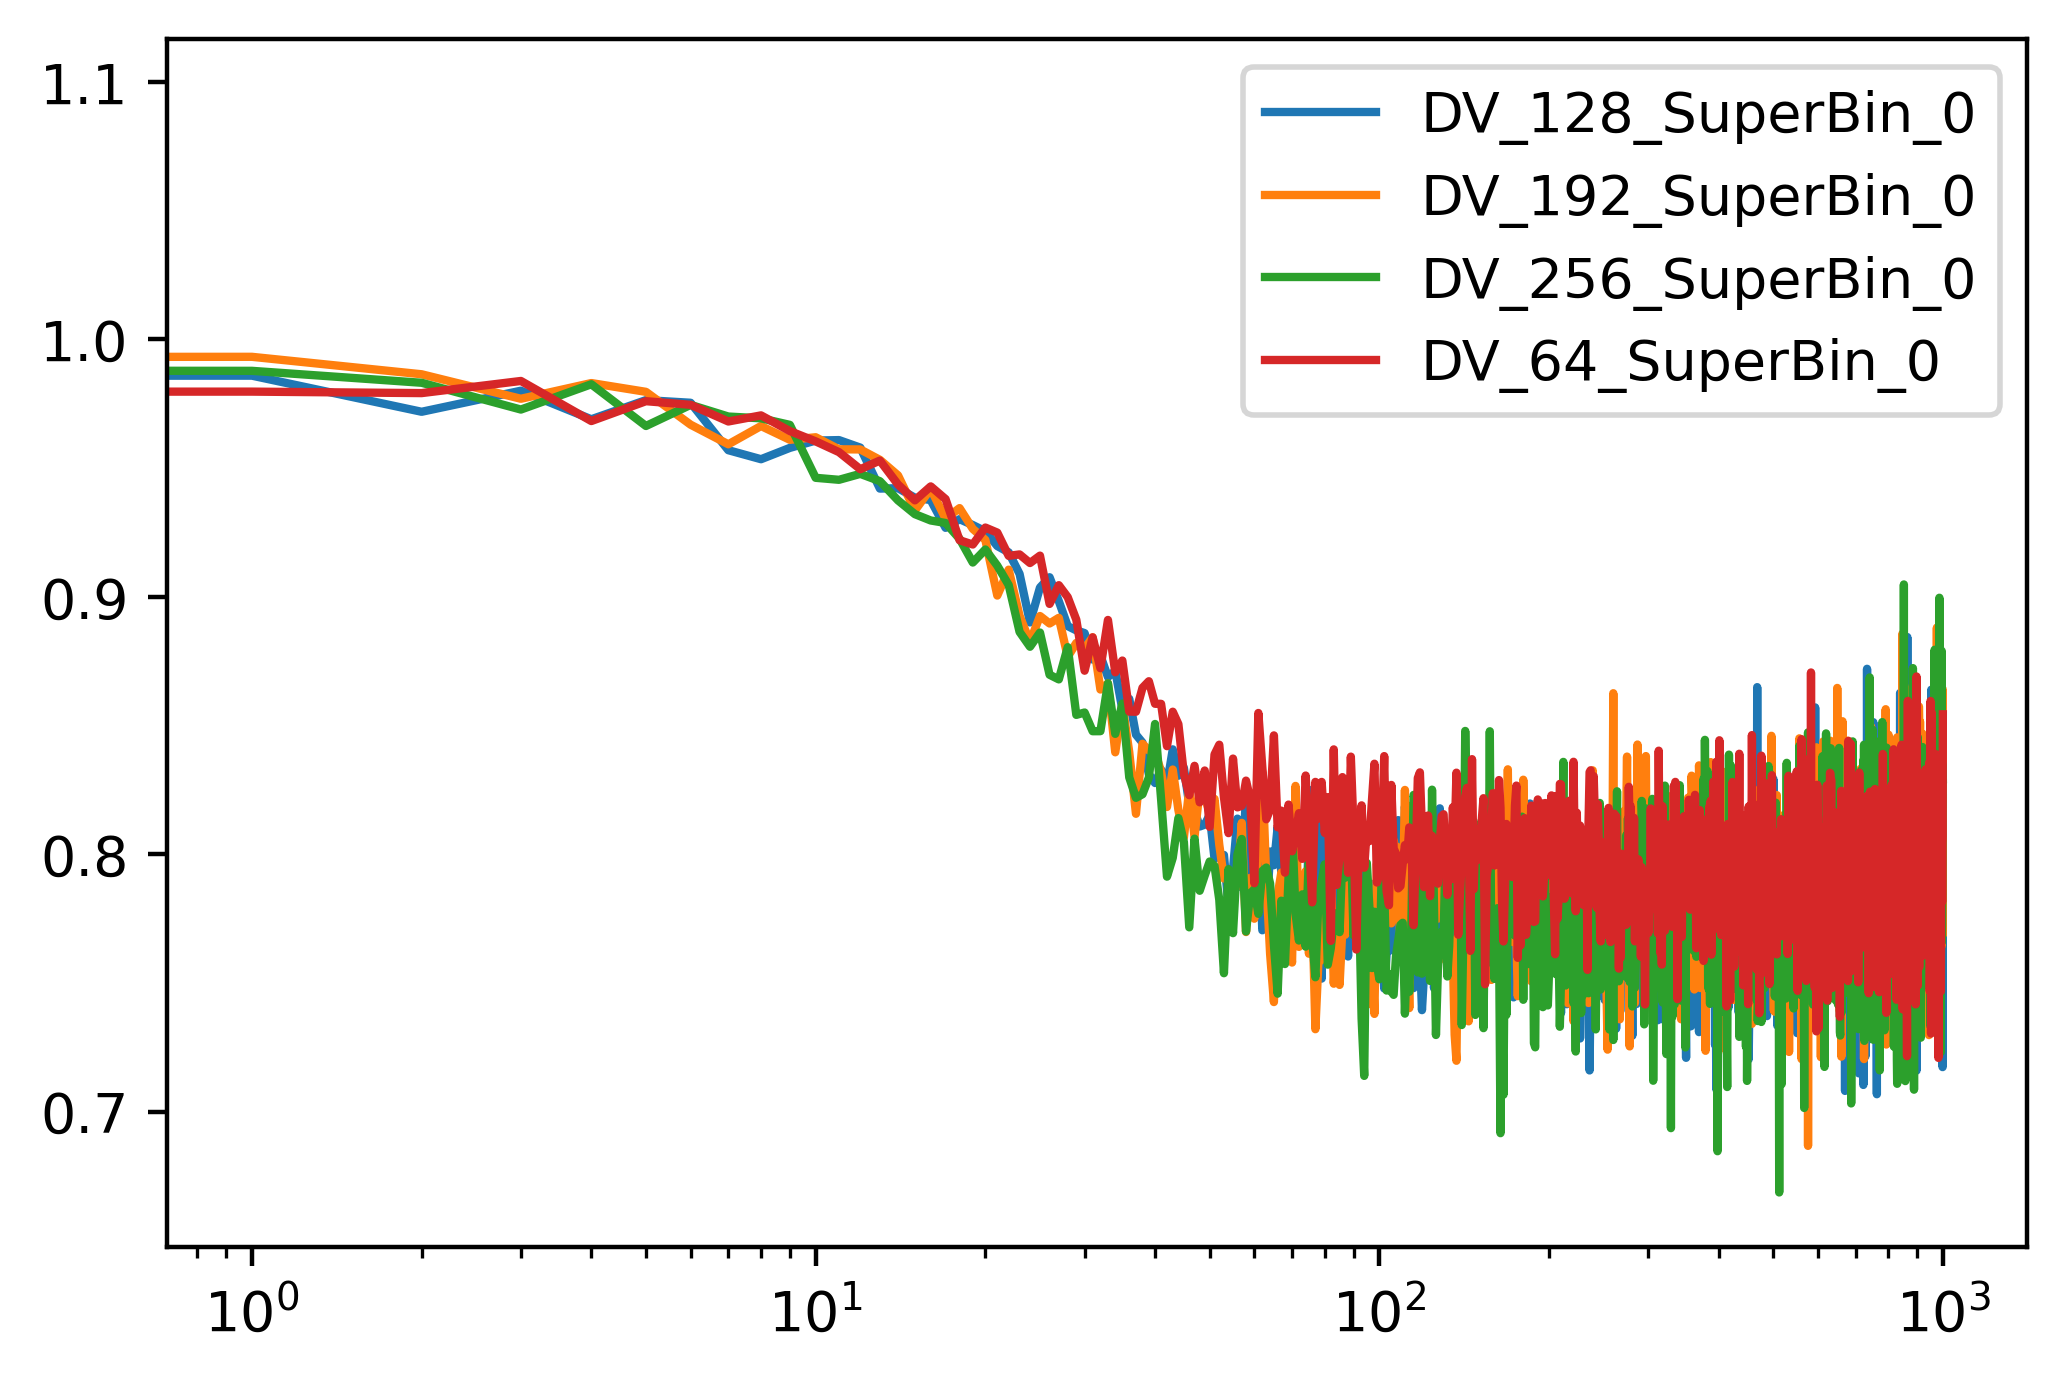

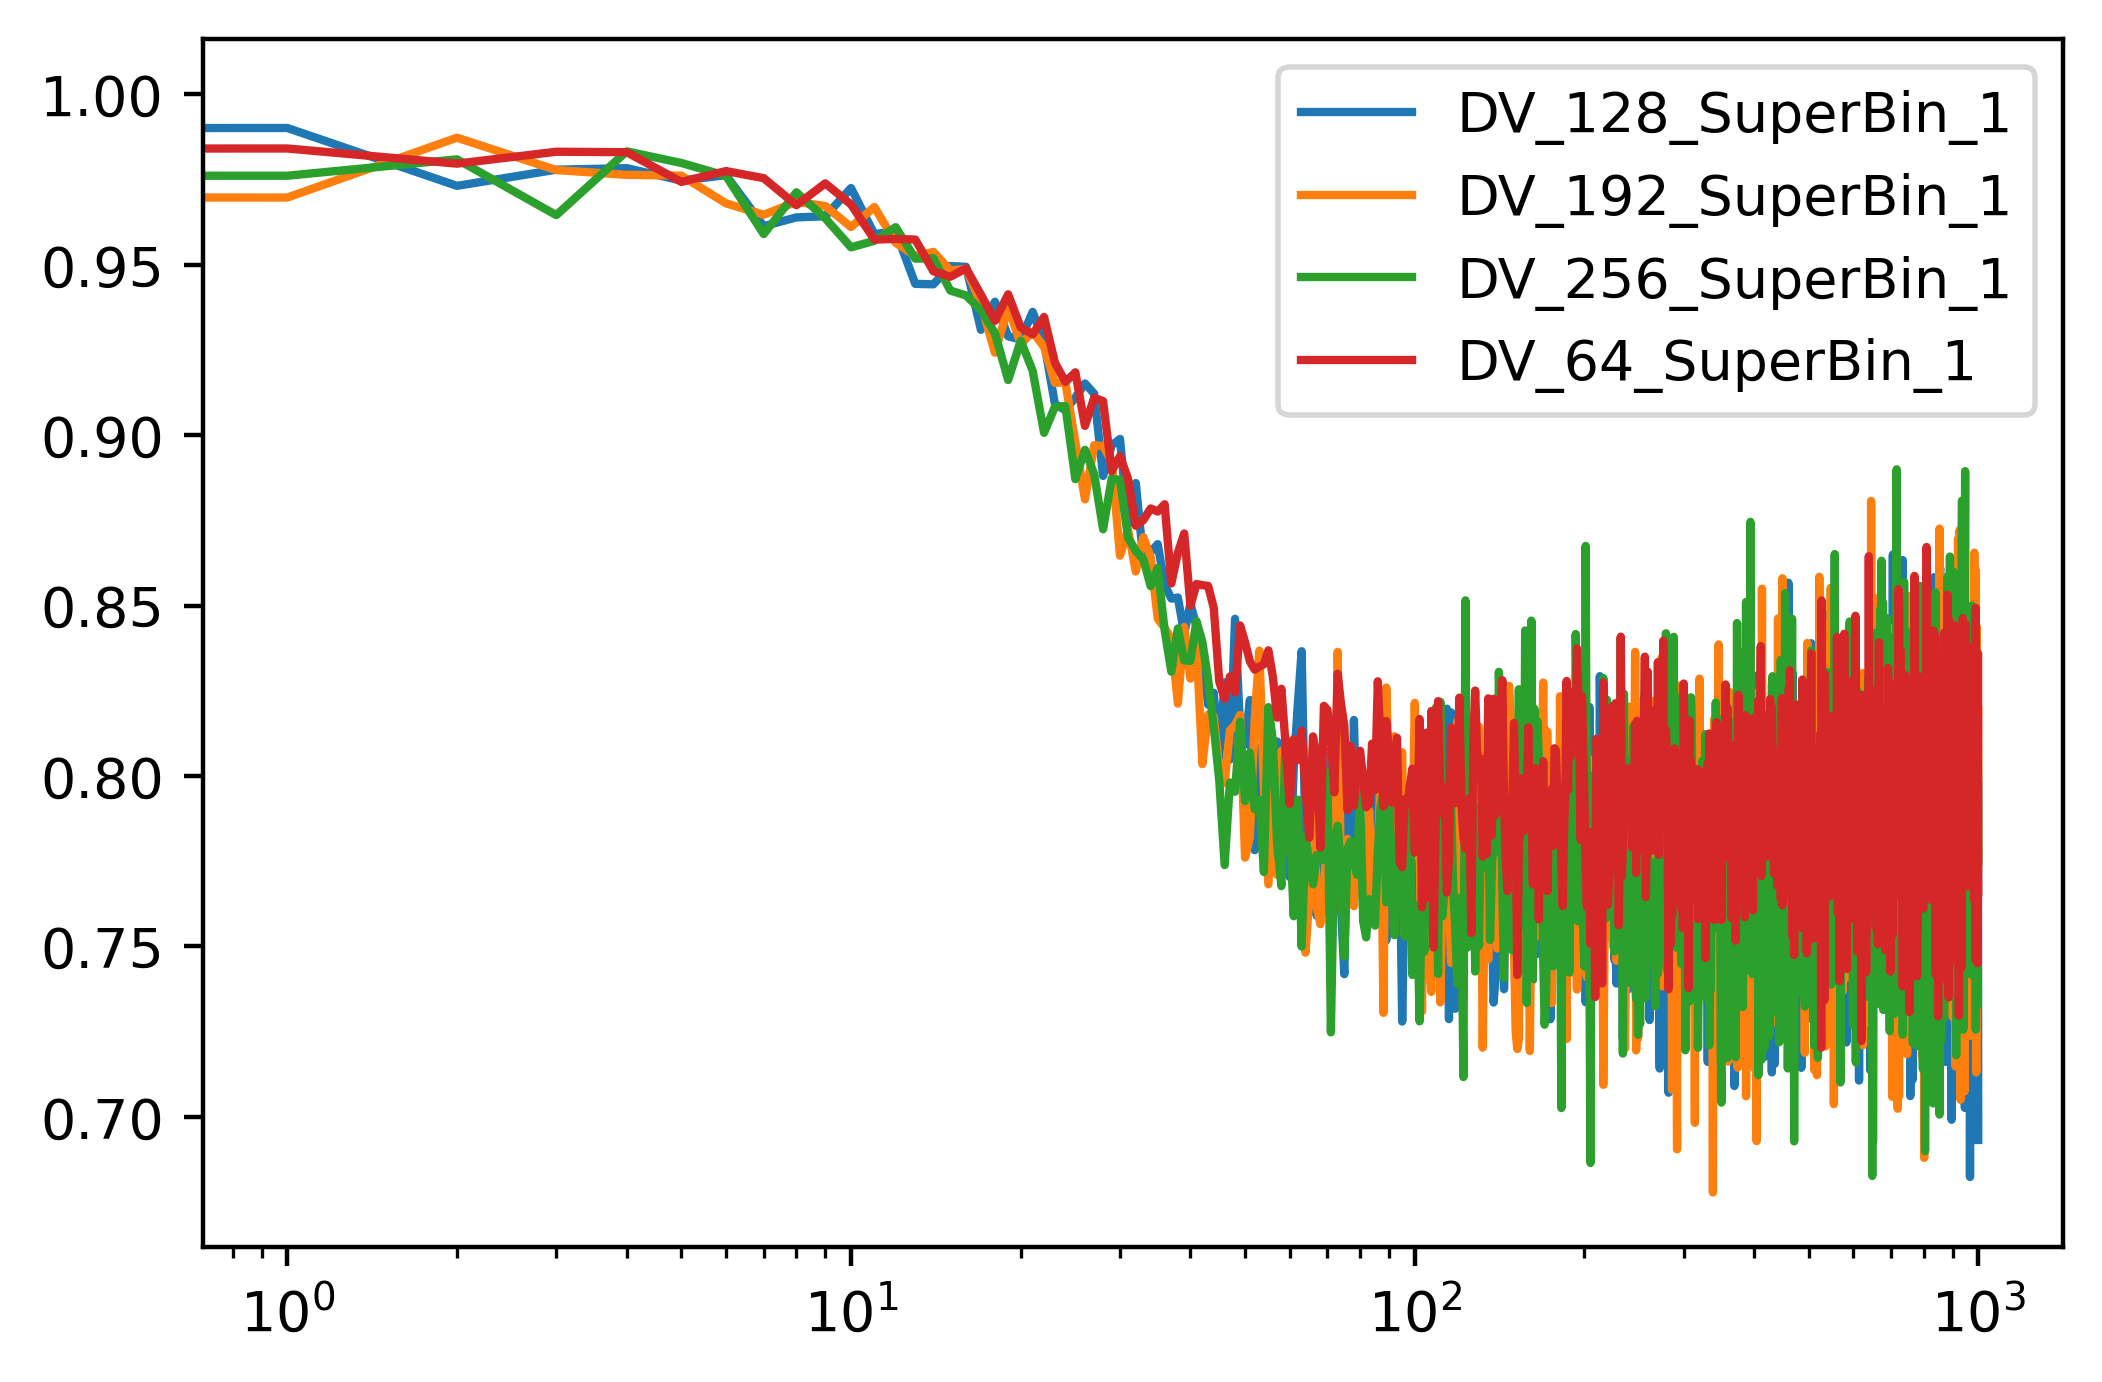

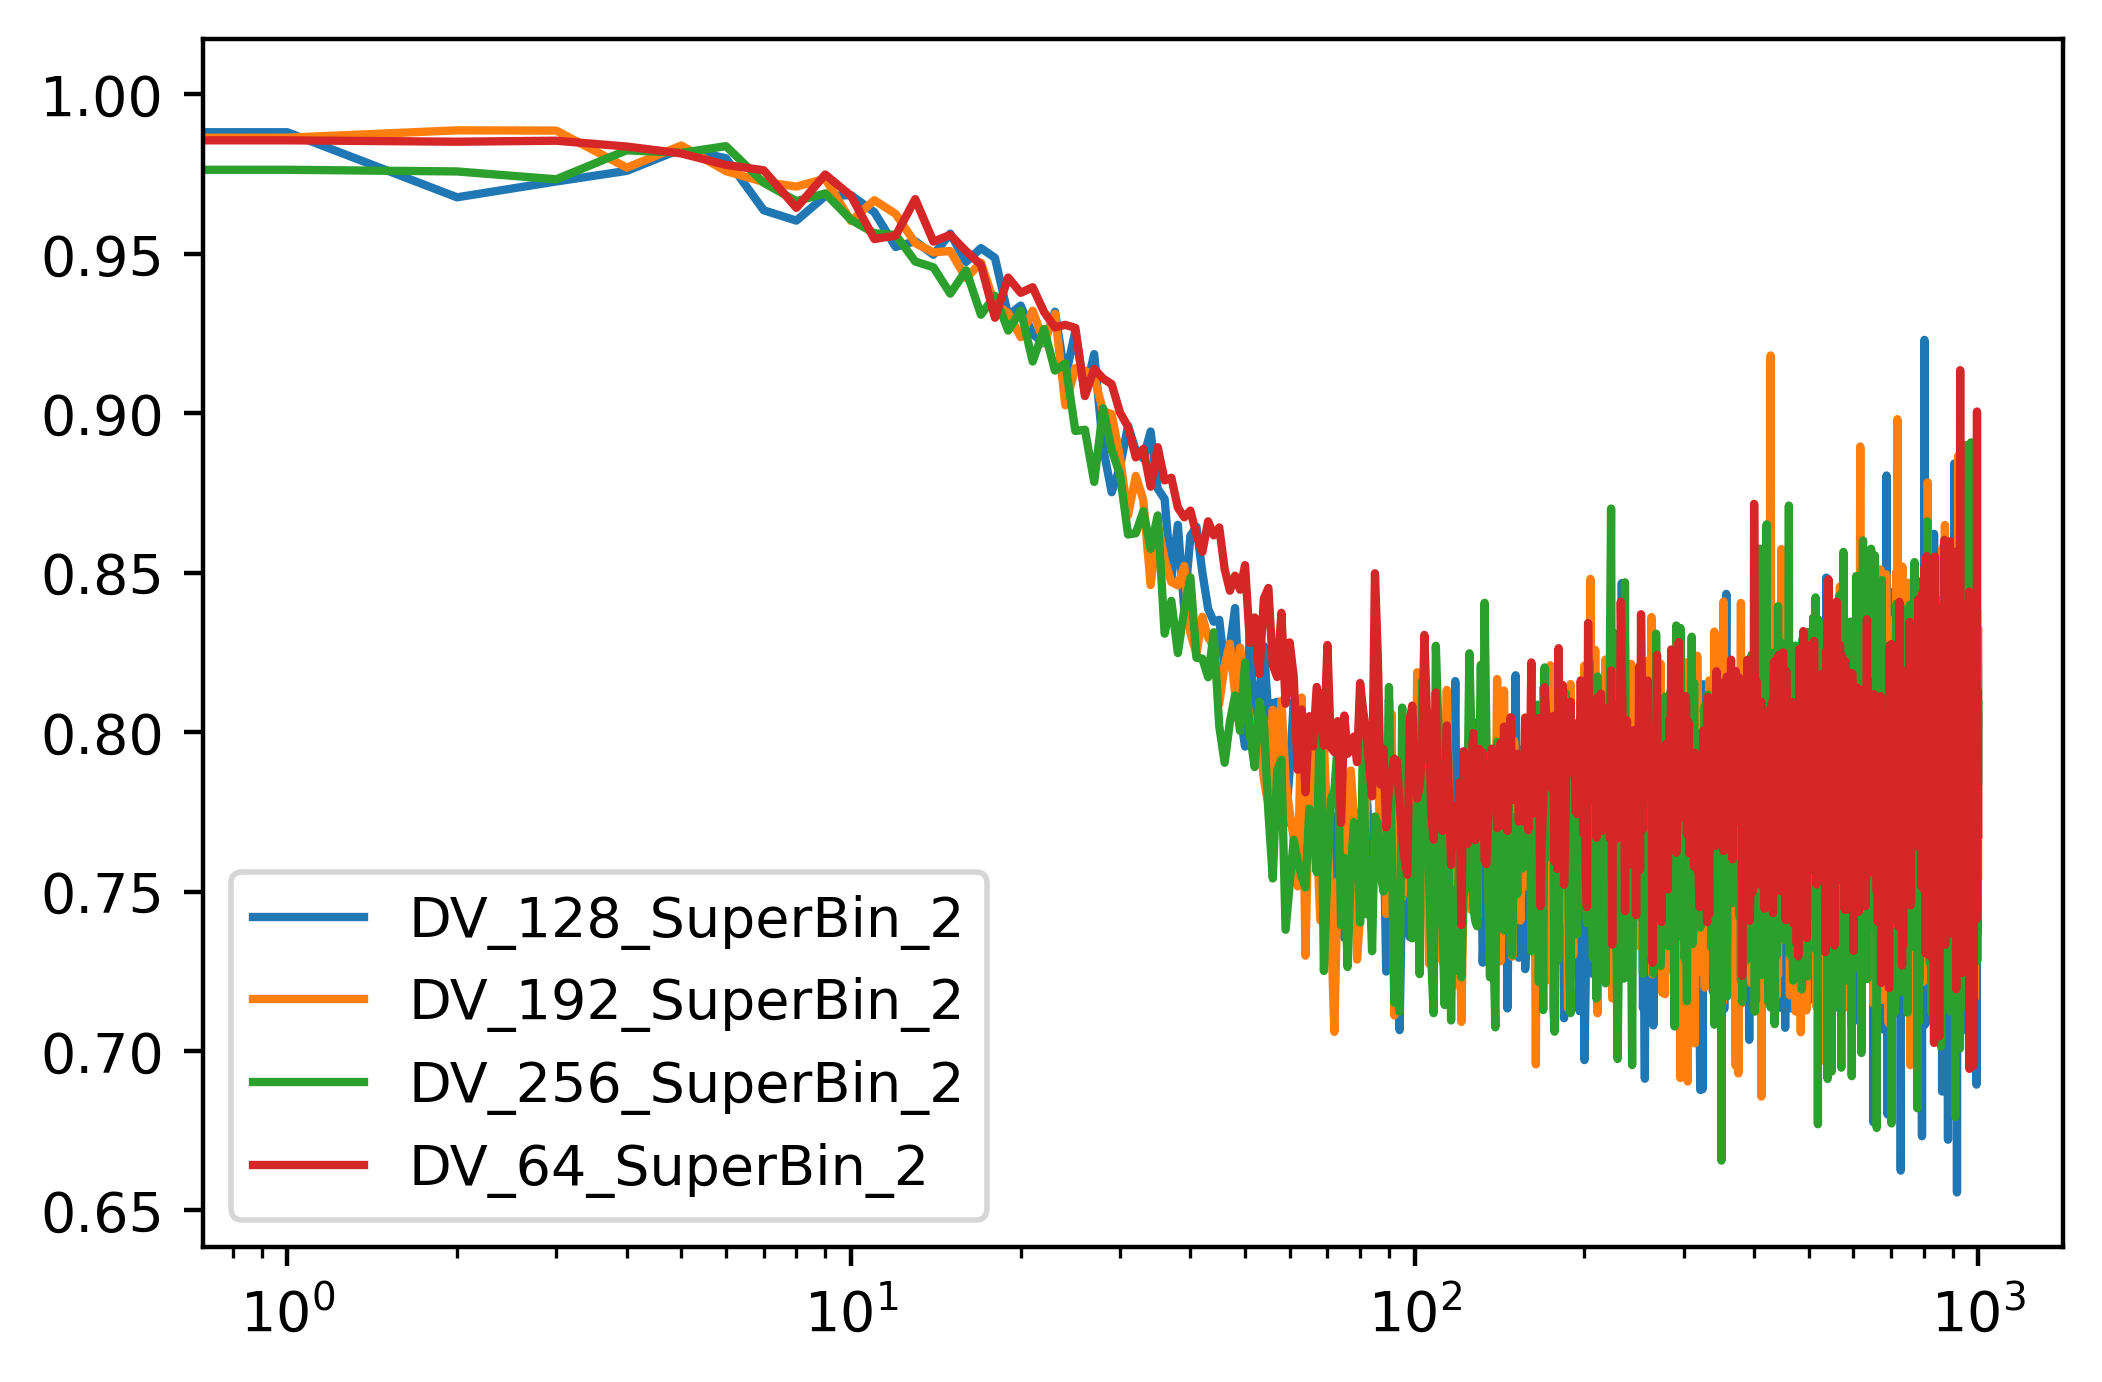

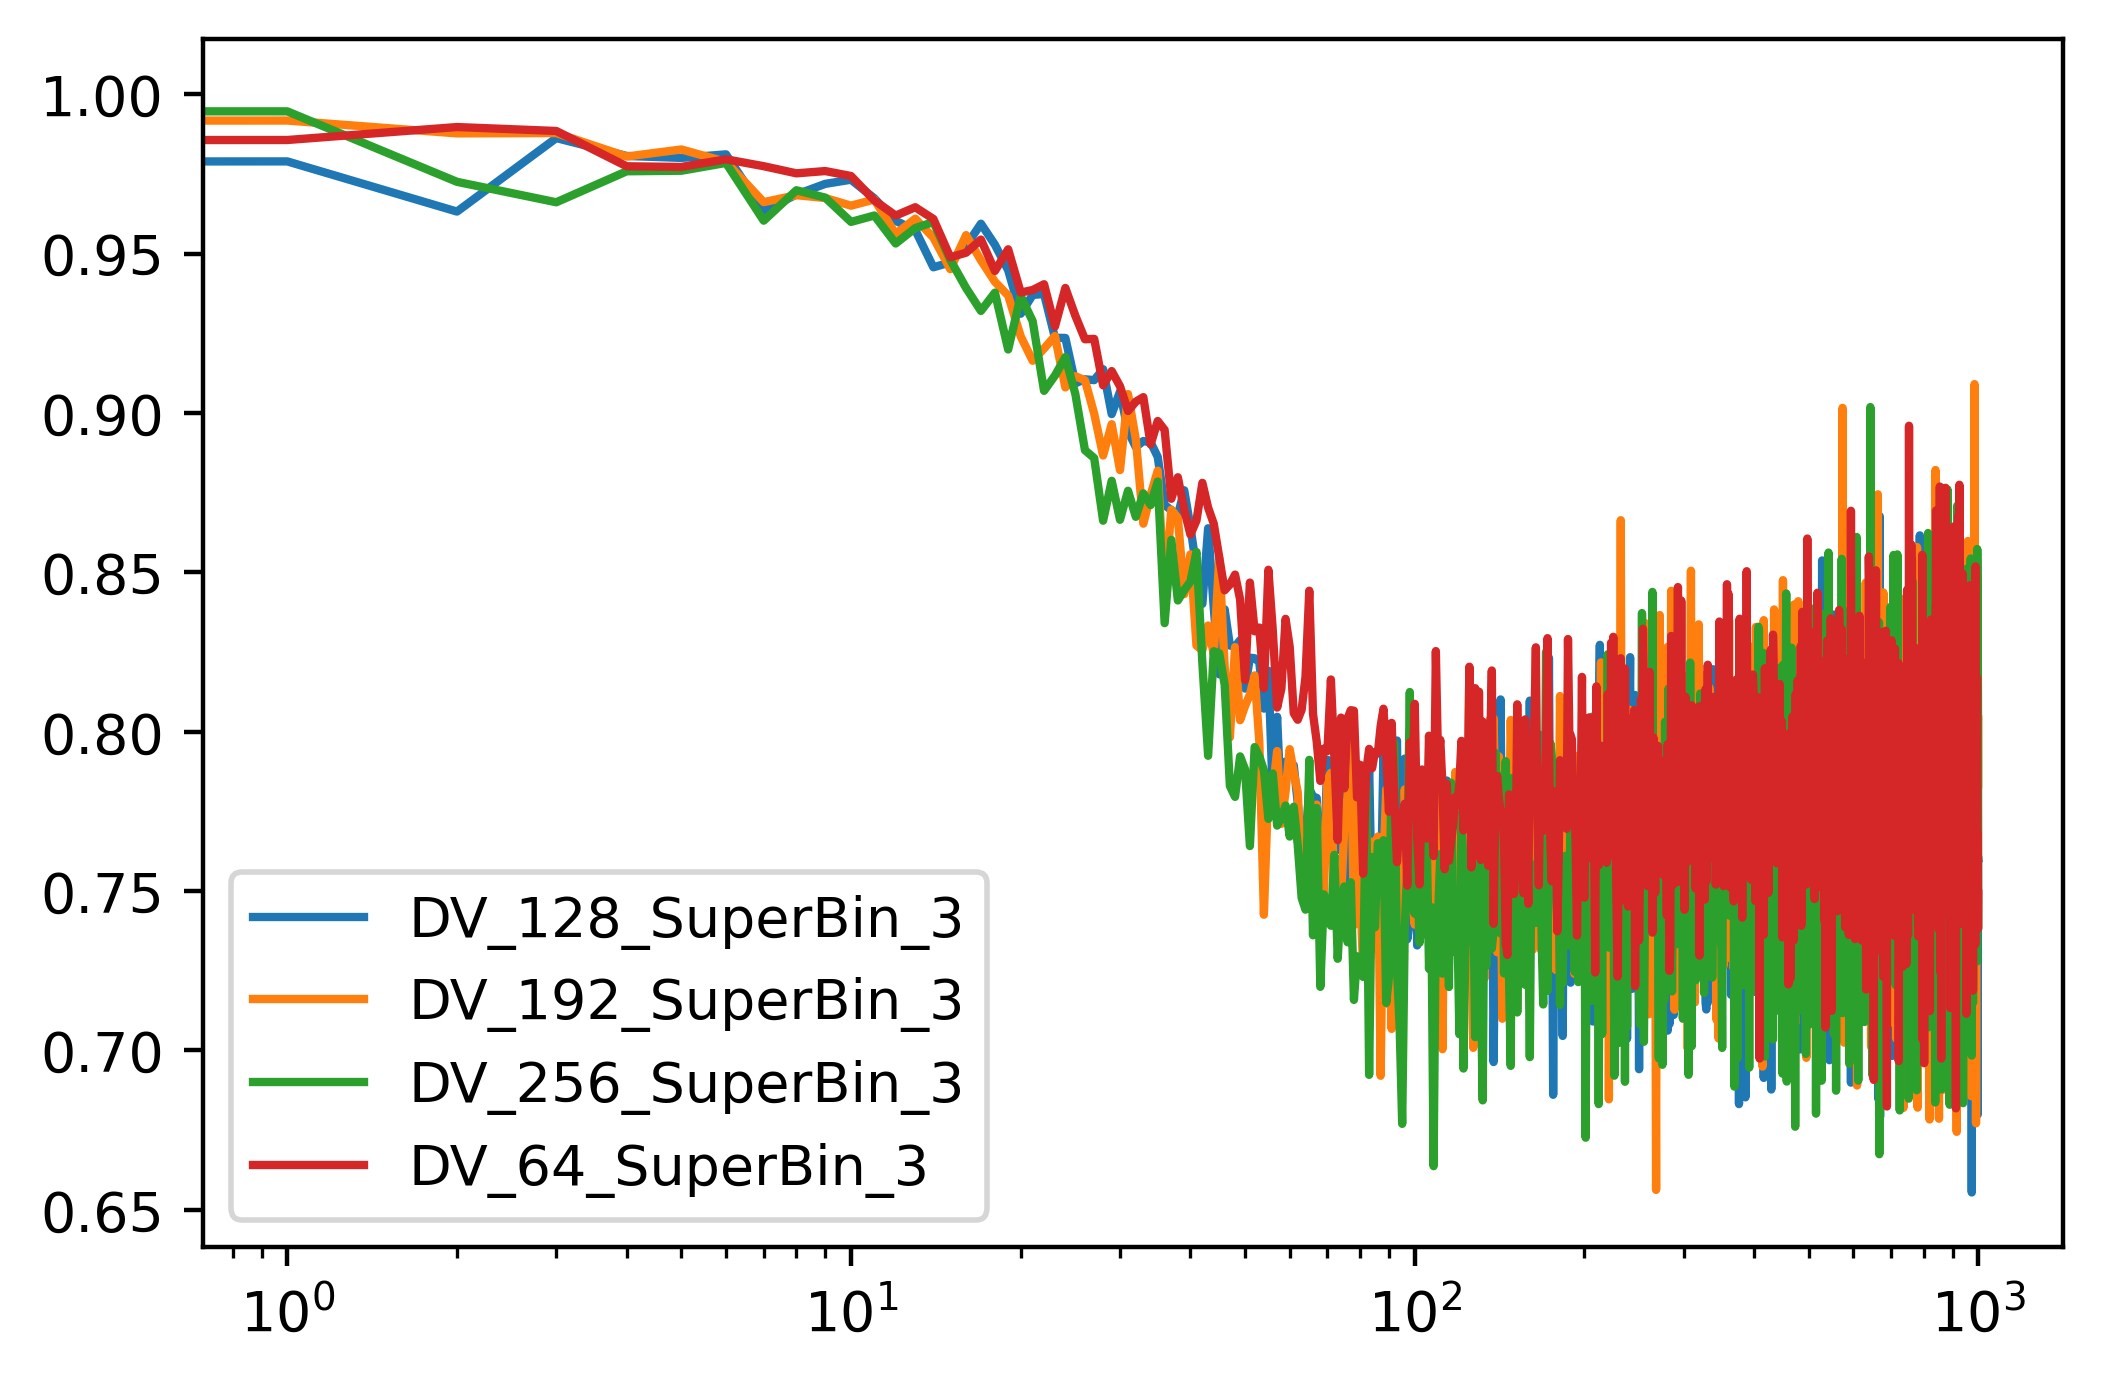

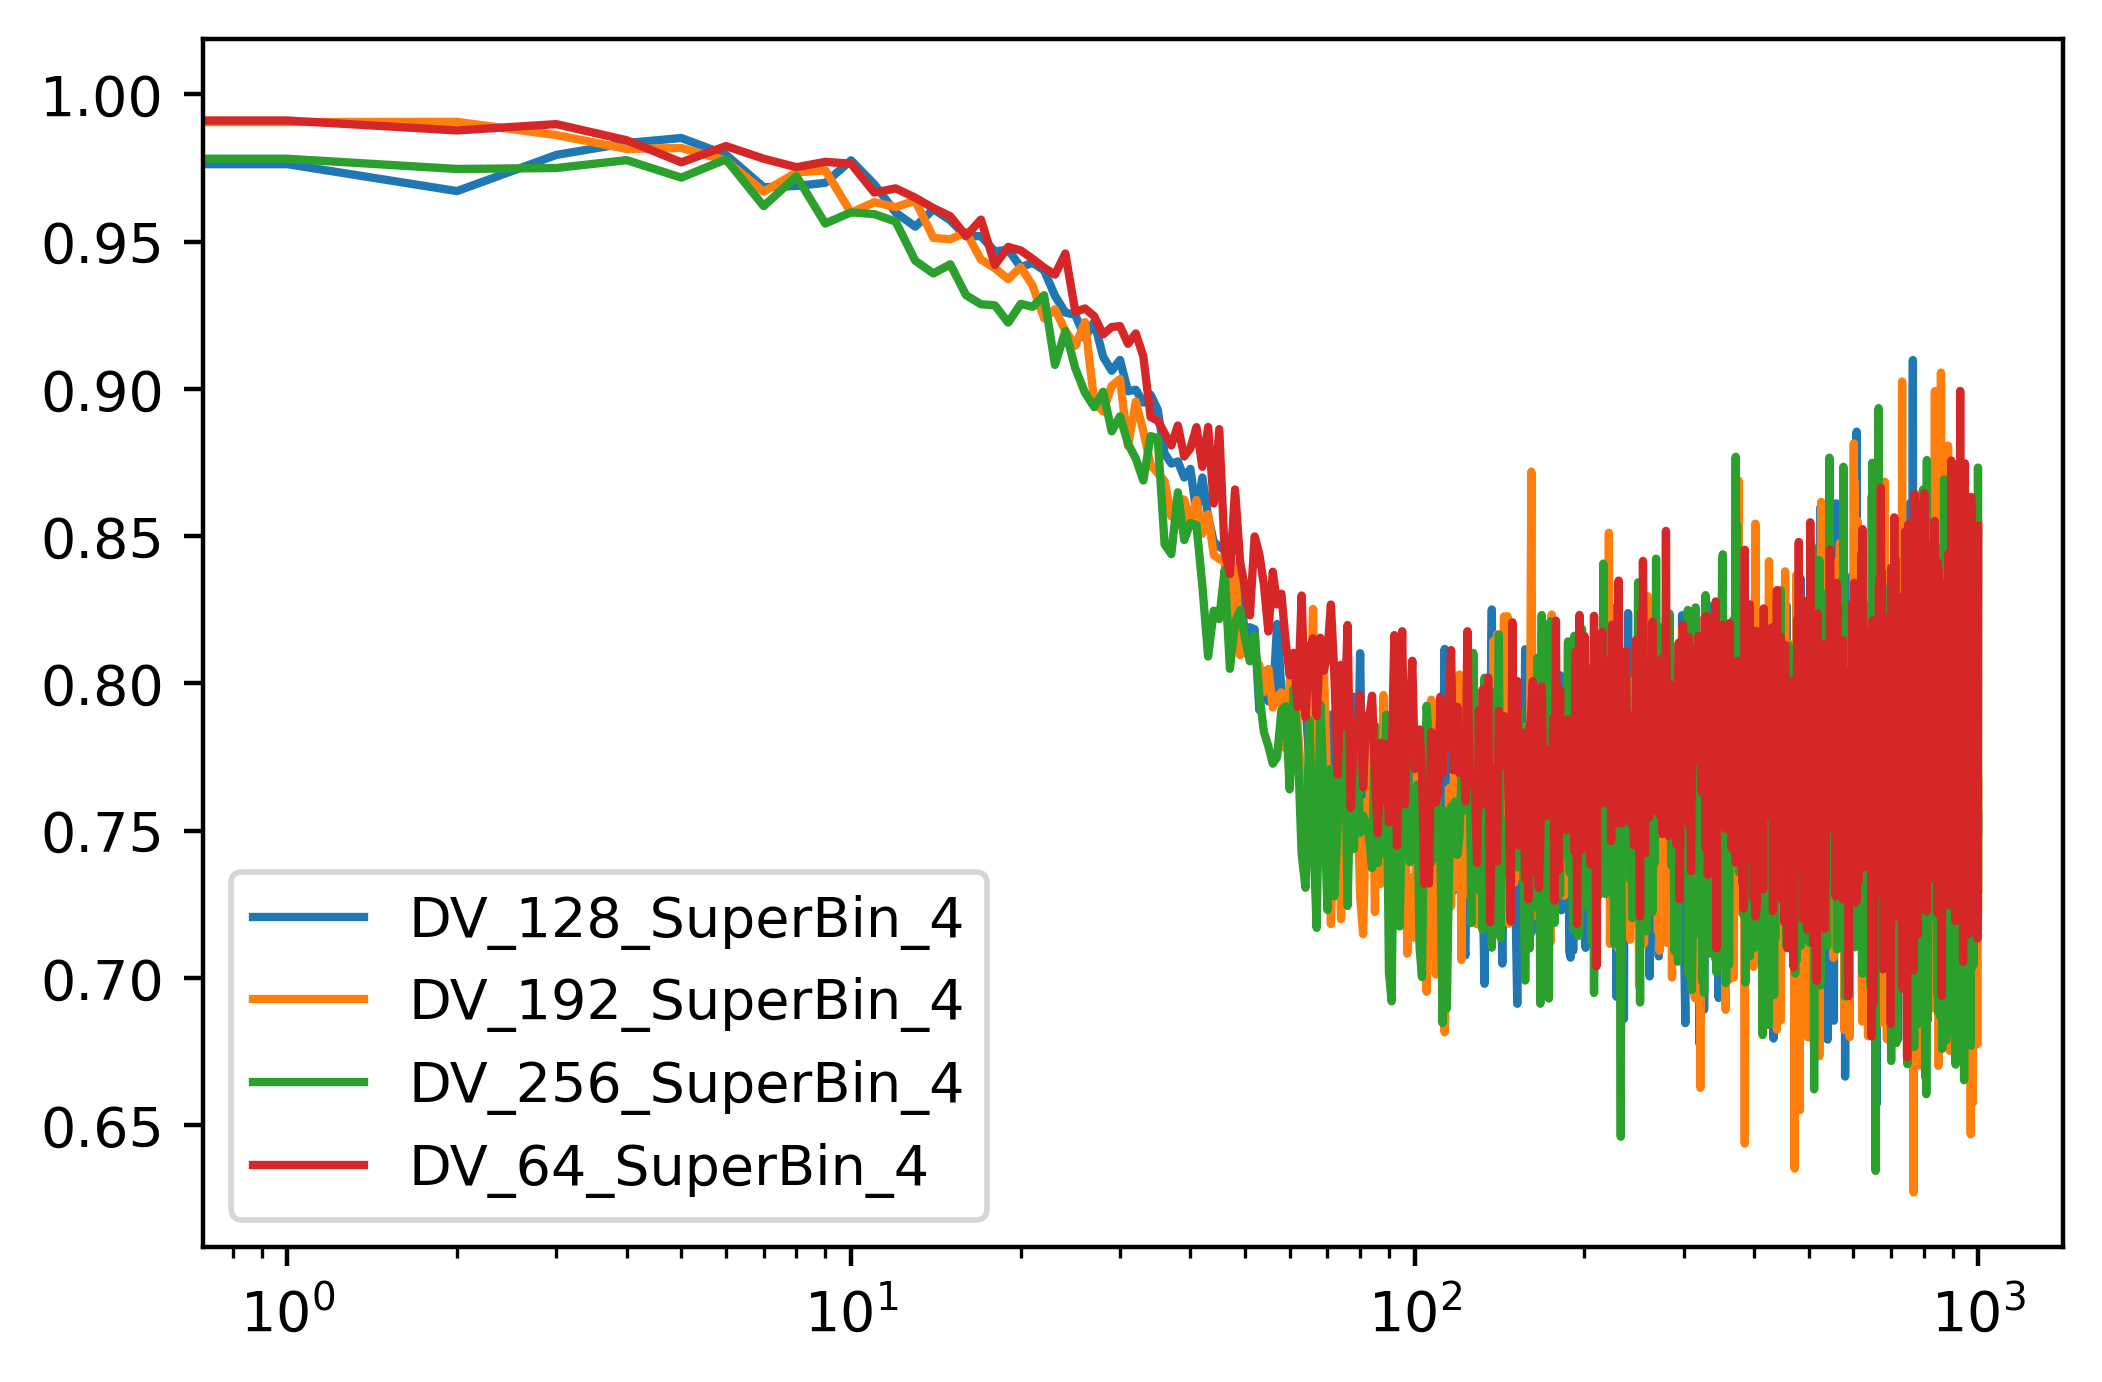

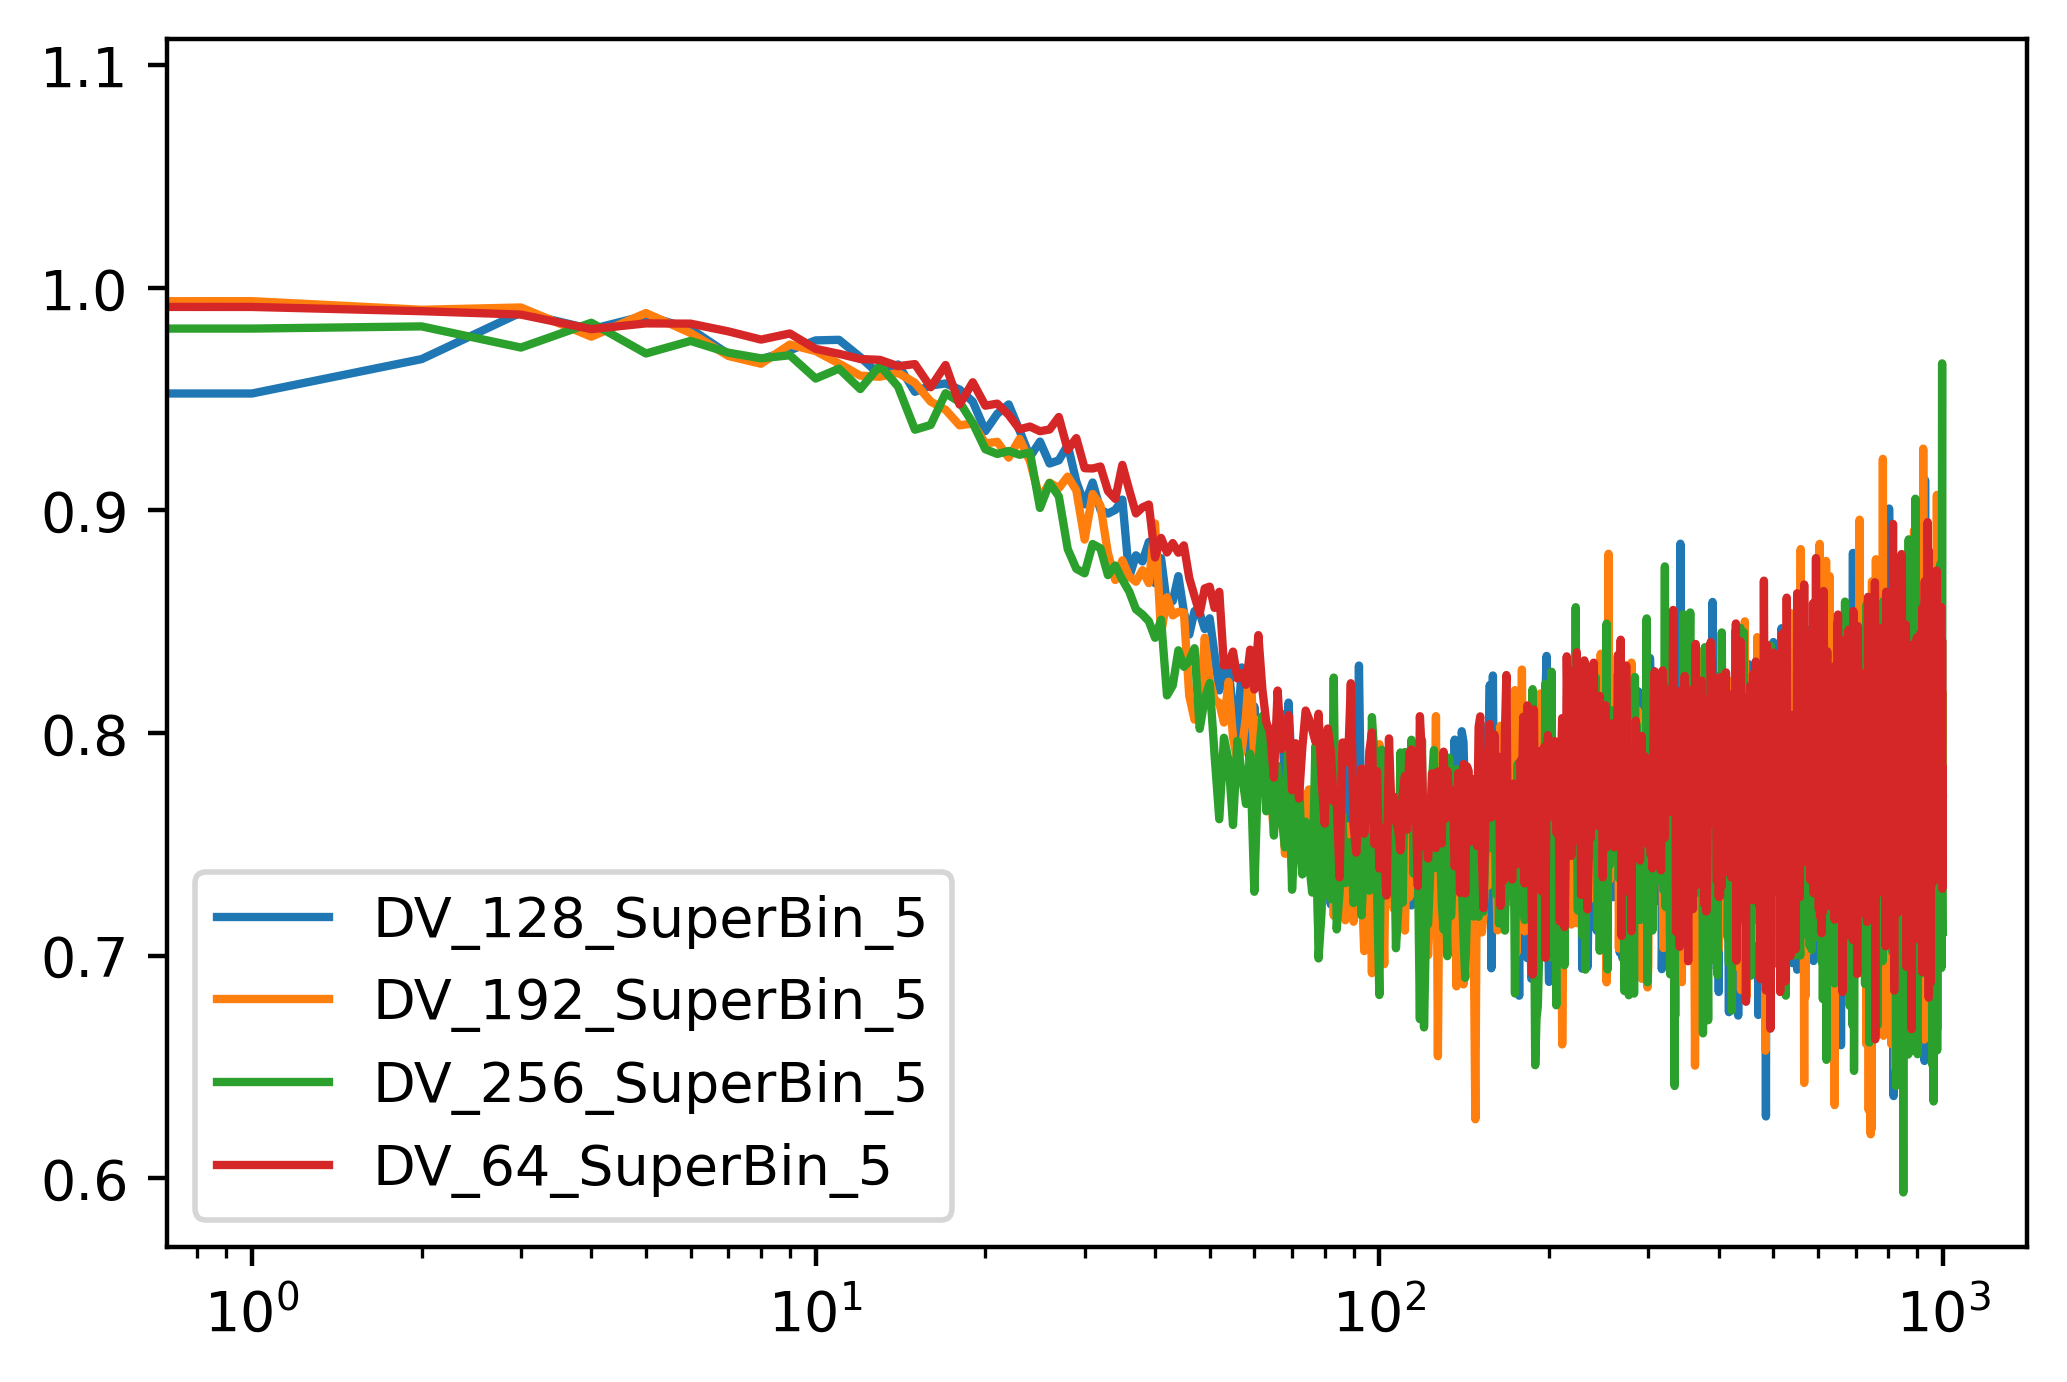

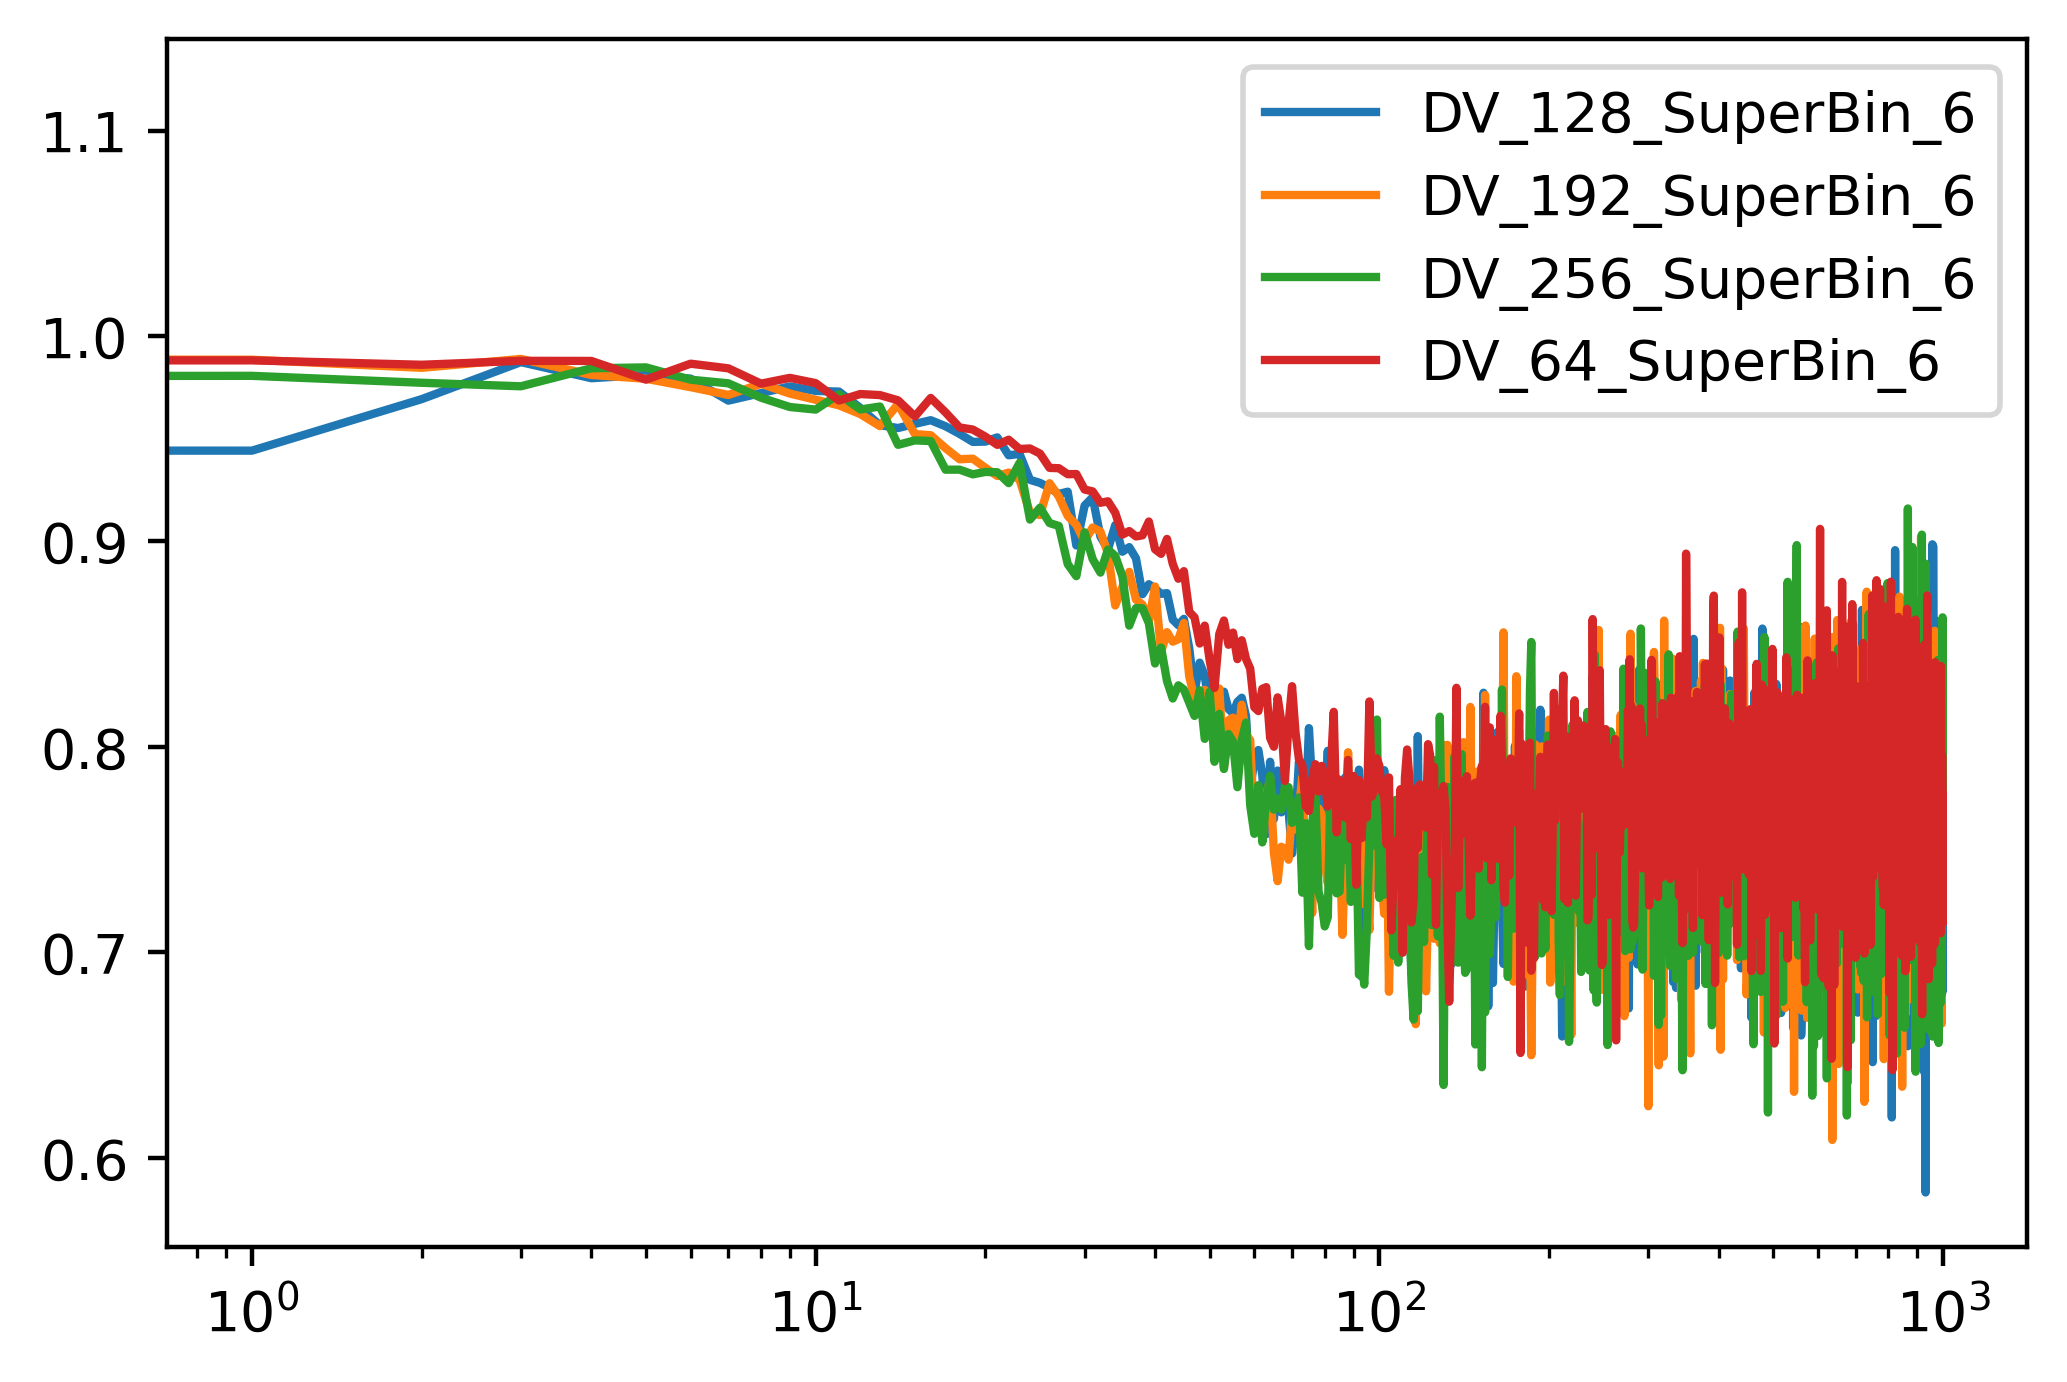

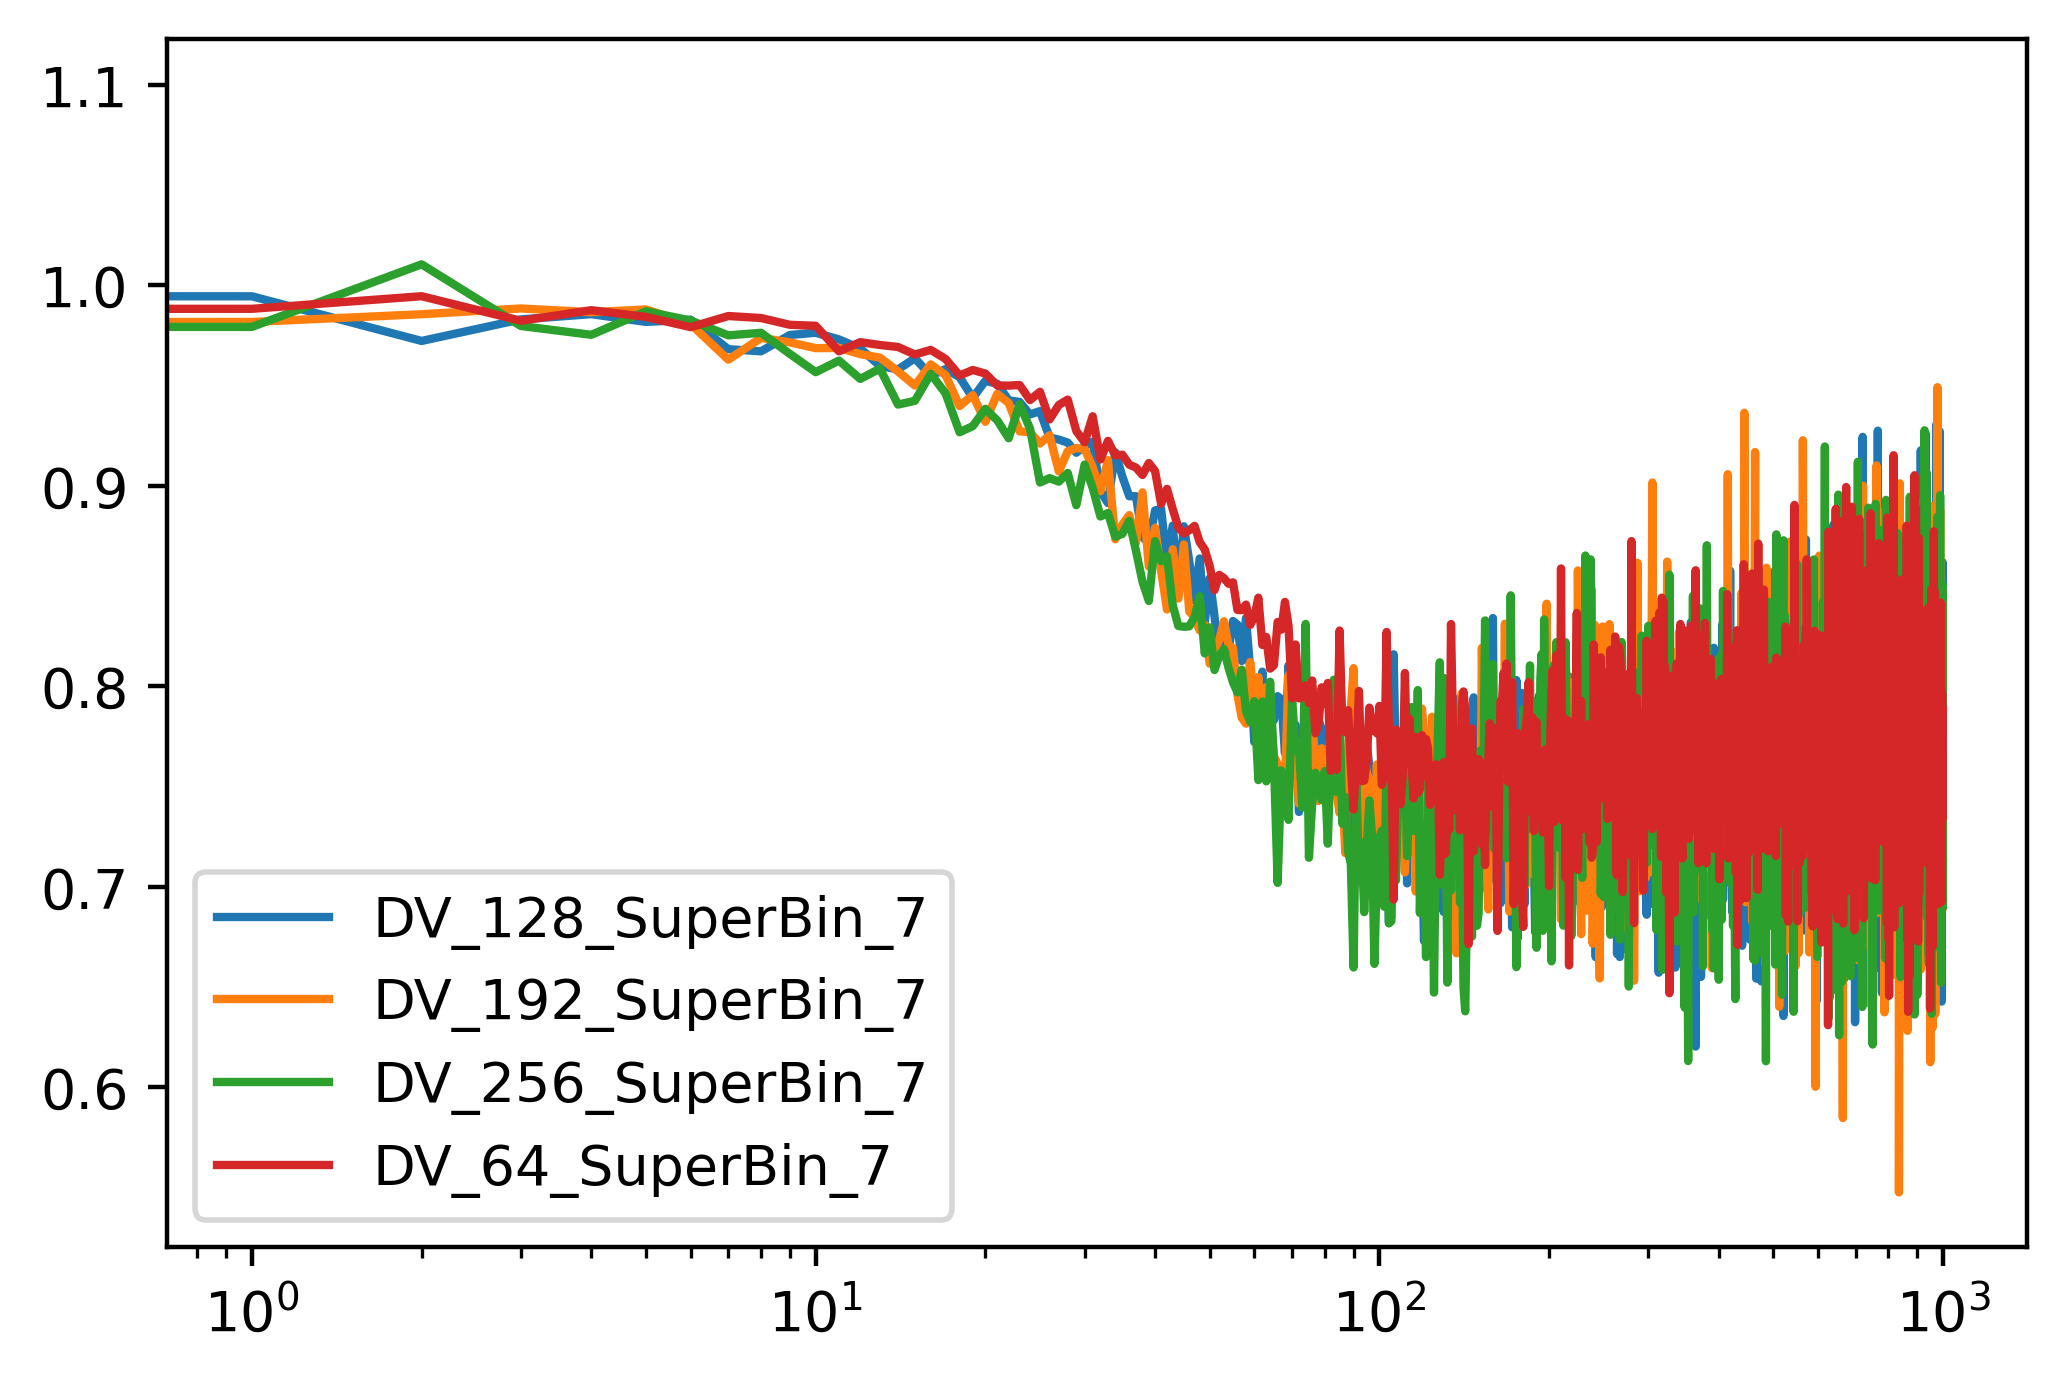

In [75]:
for i in range(9):
    plt.figure(dpi=400)
    plt.semilogx(np.transpose(ratioLensToNotLensed[i:36:9,:1000]));
    plt.legend(titles[i:36:9]);

## Smooth Plots

In [133]:
smoothRatio = signal.savgol_filter(ratioLensToNotLensed, 251, 7, axis=1)

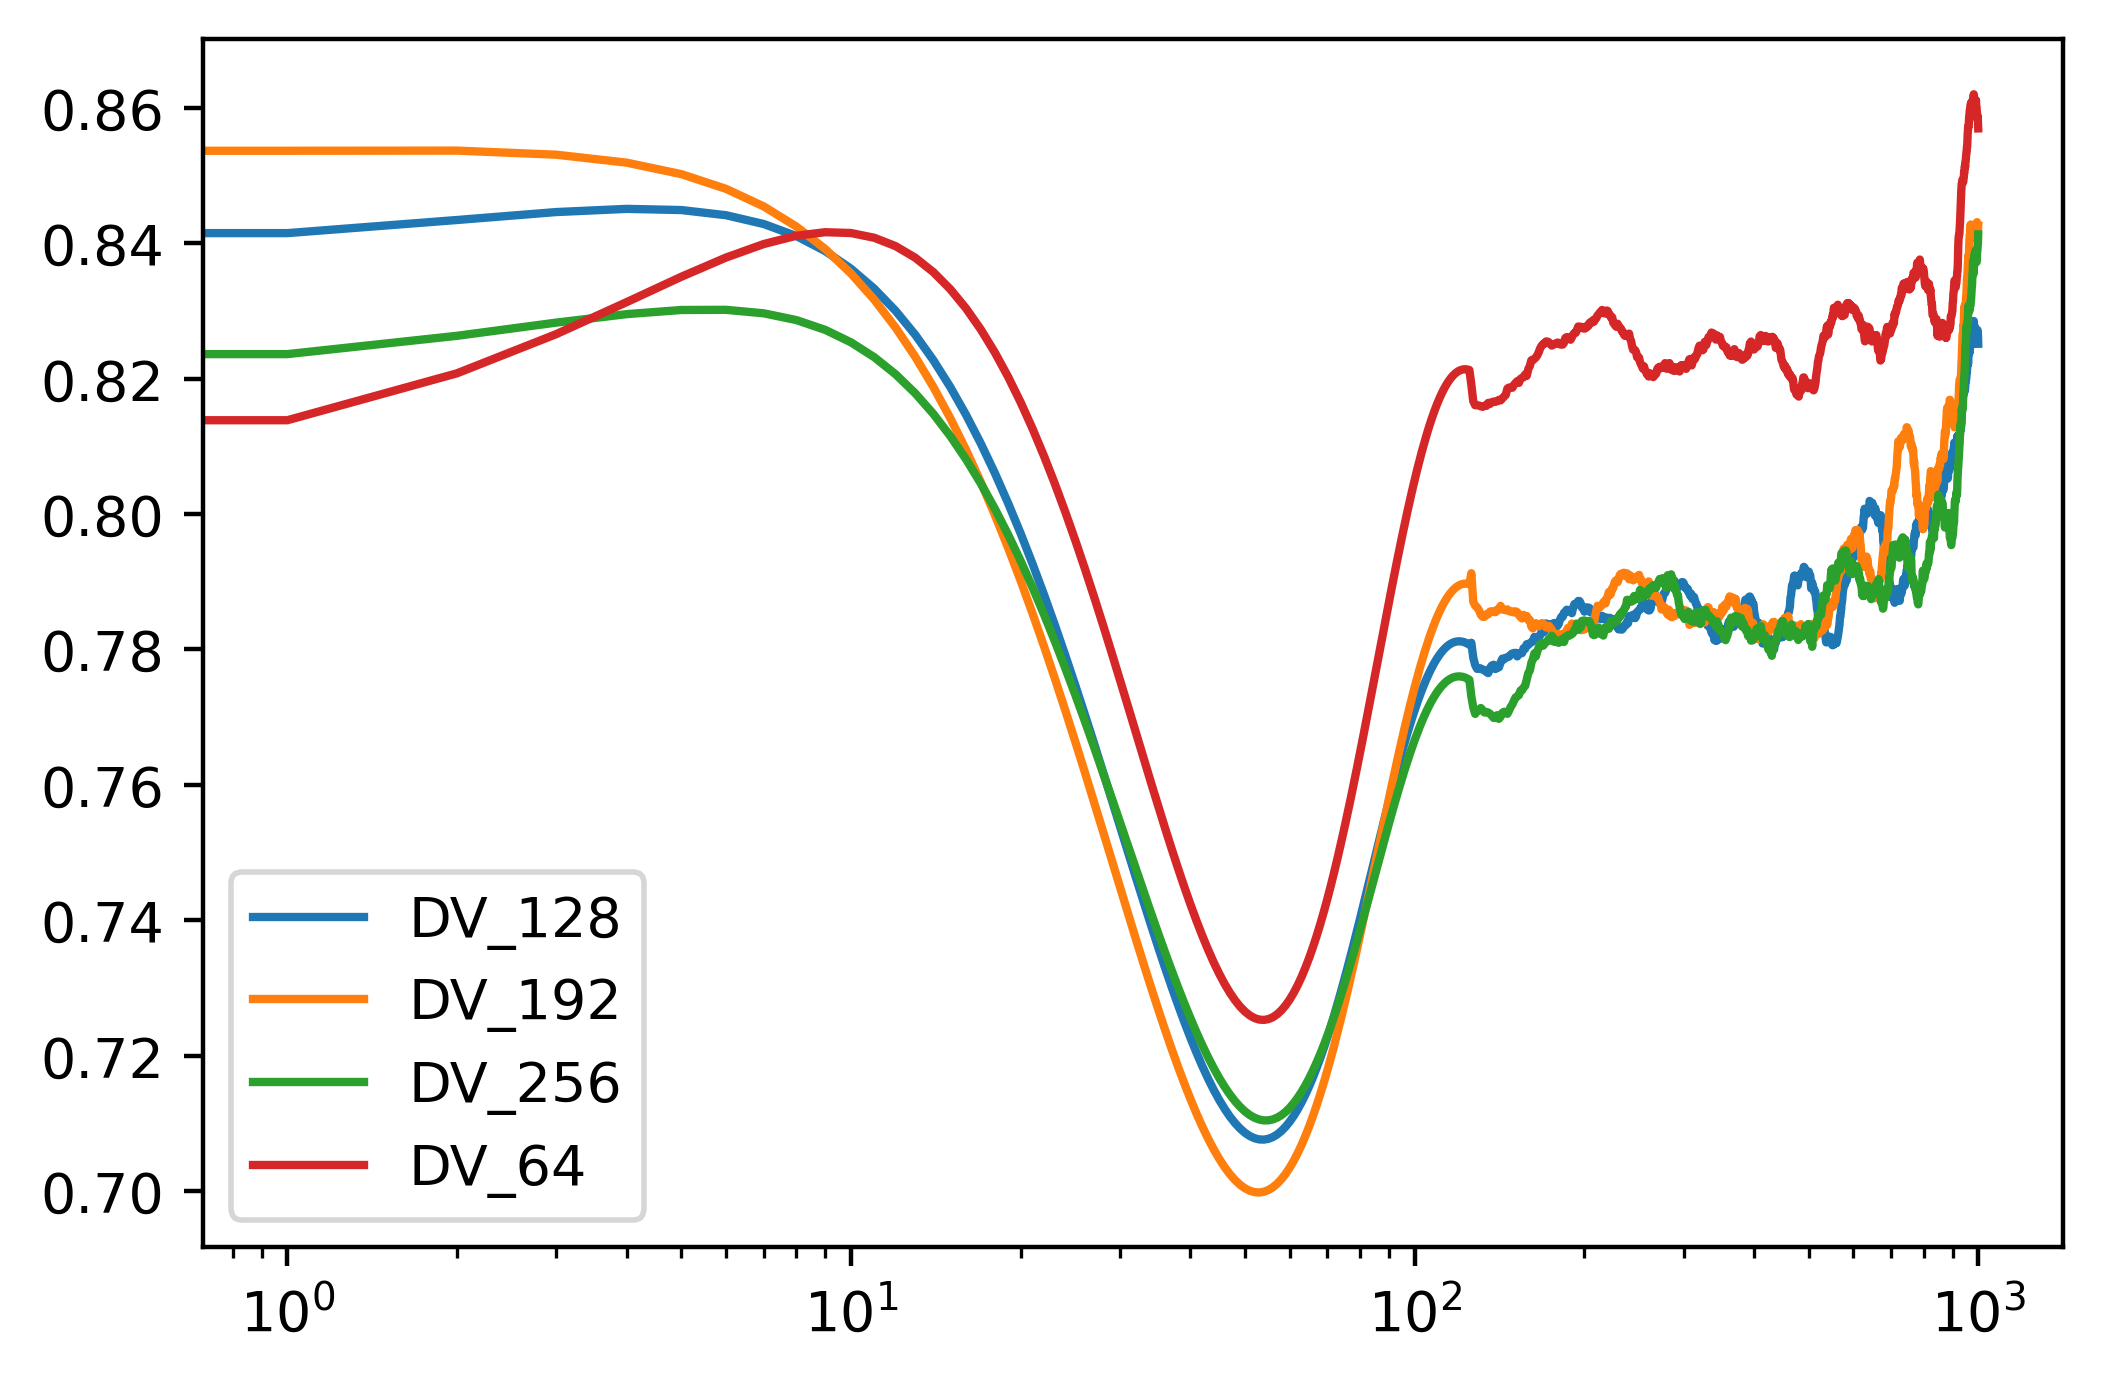

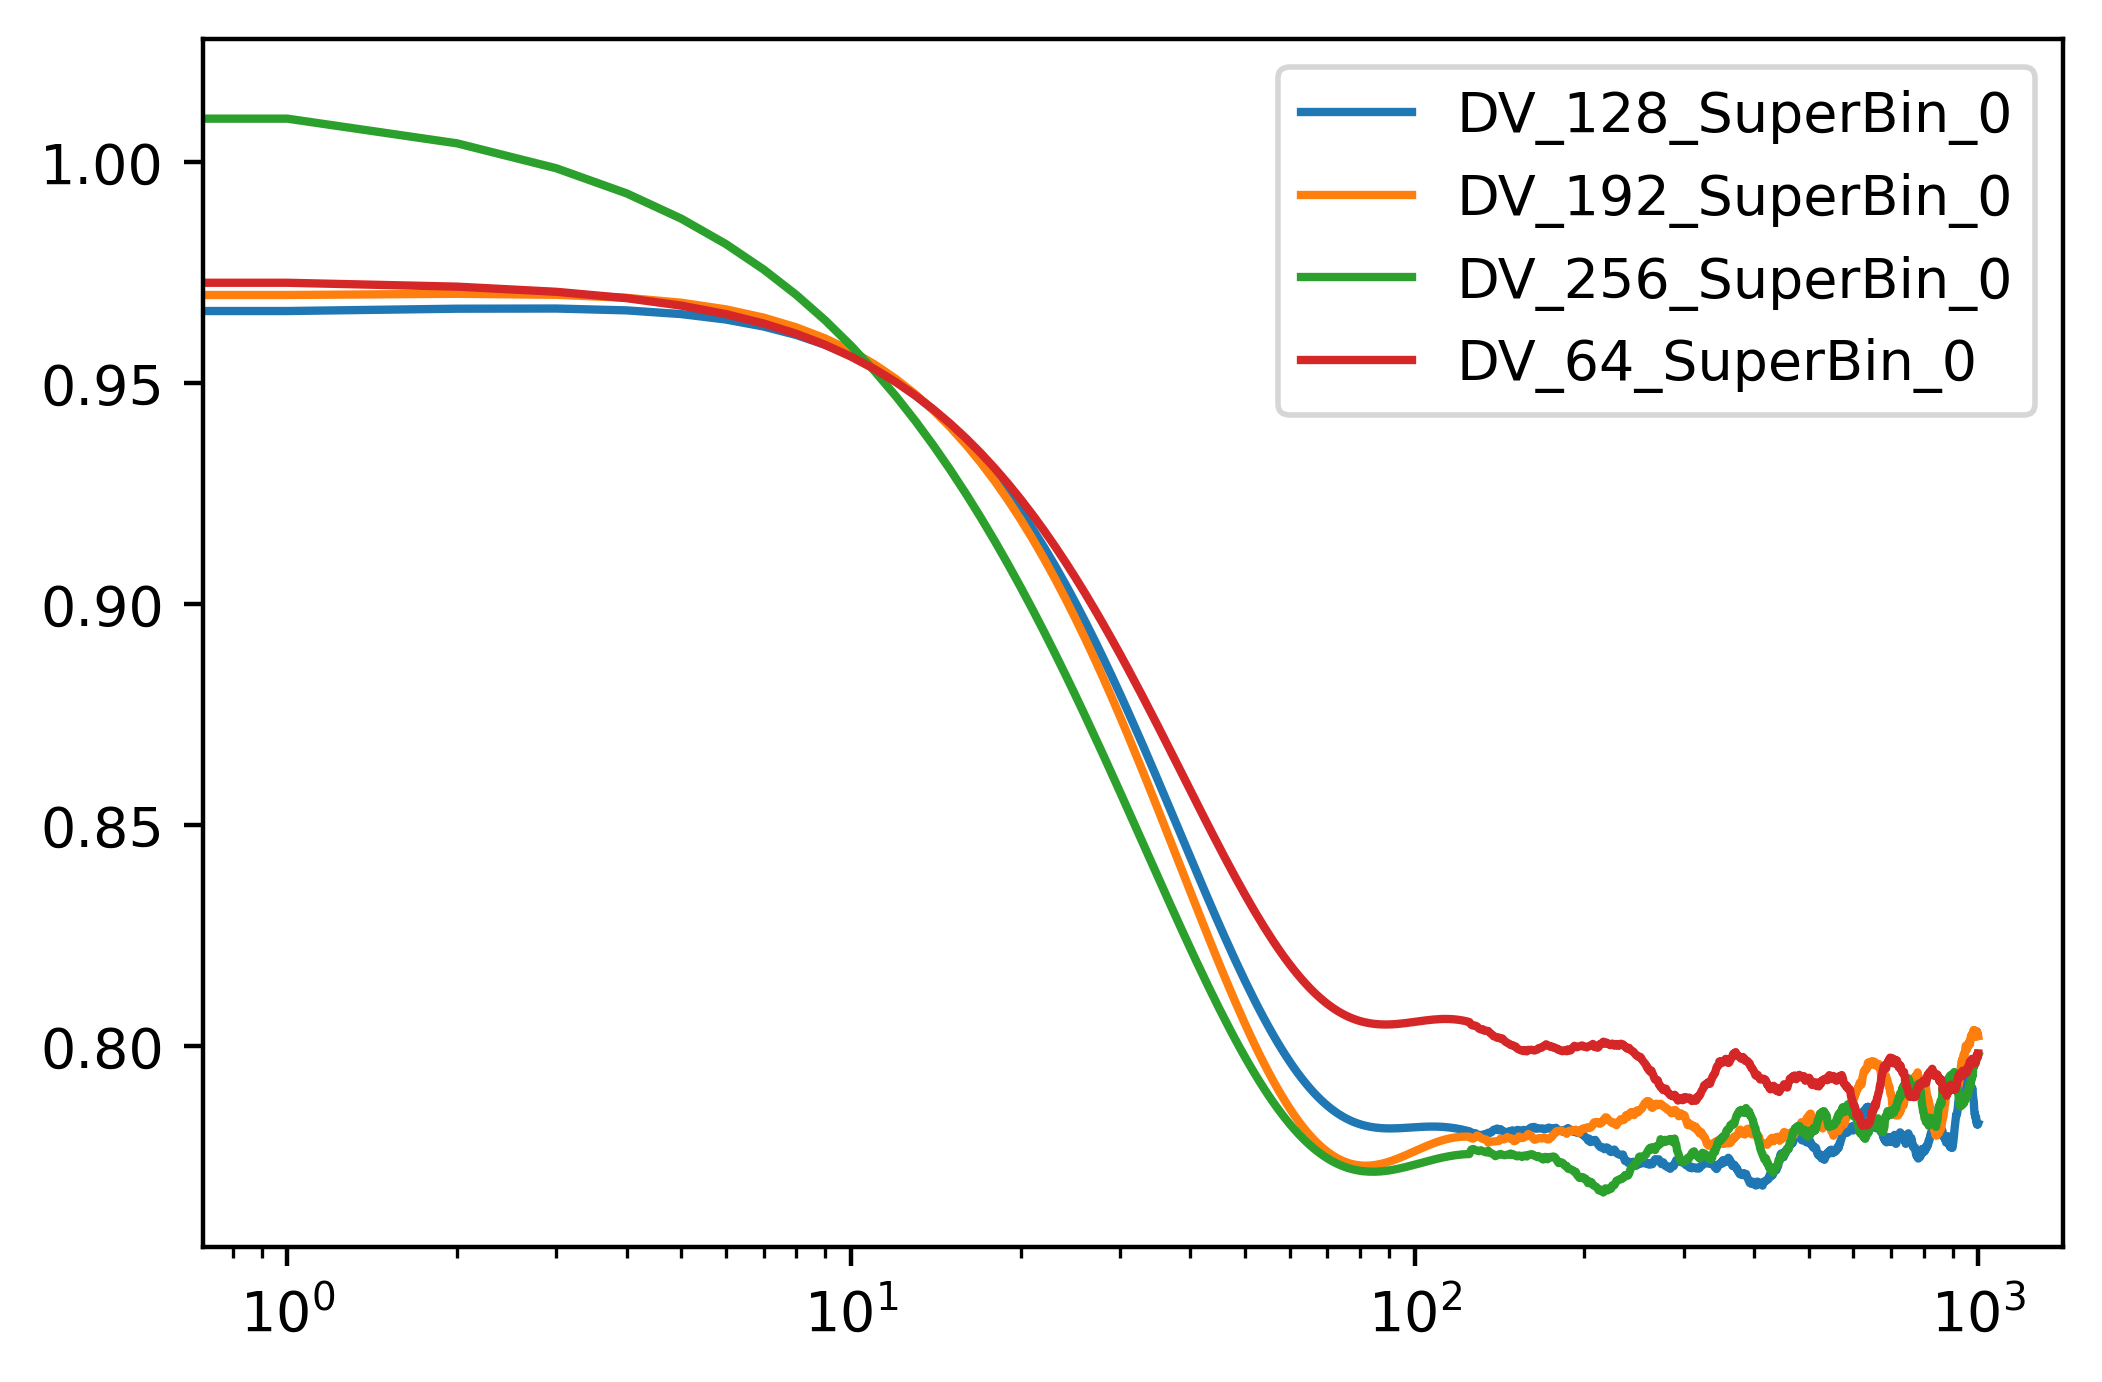

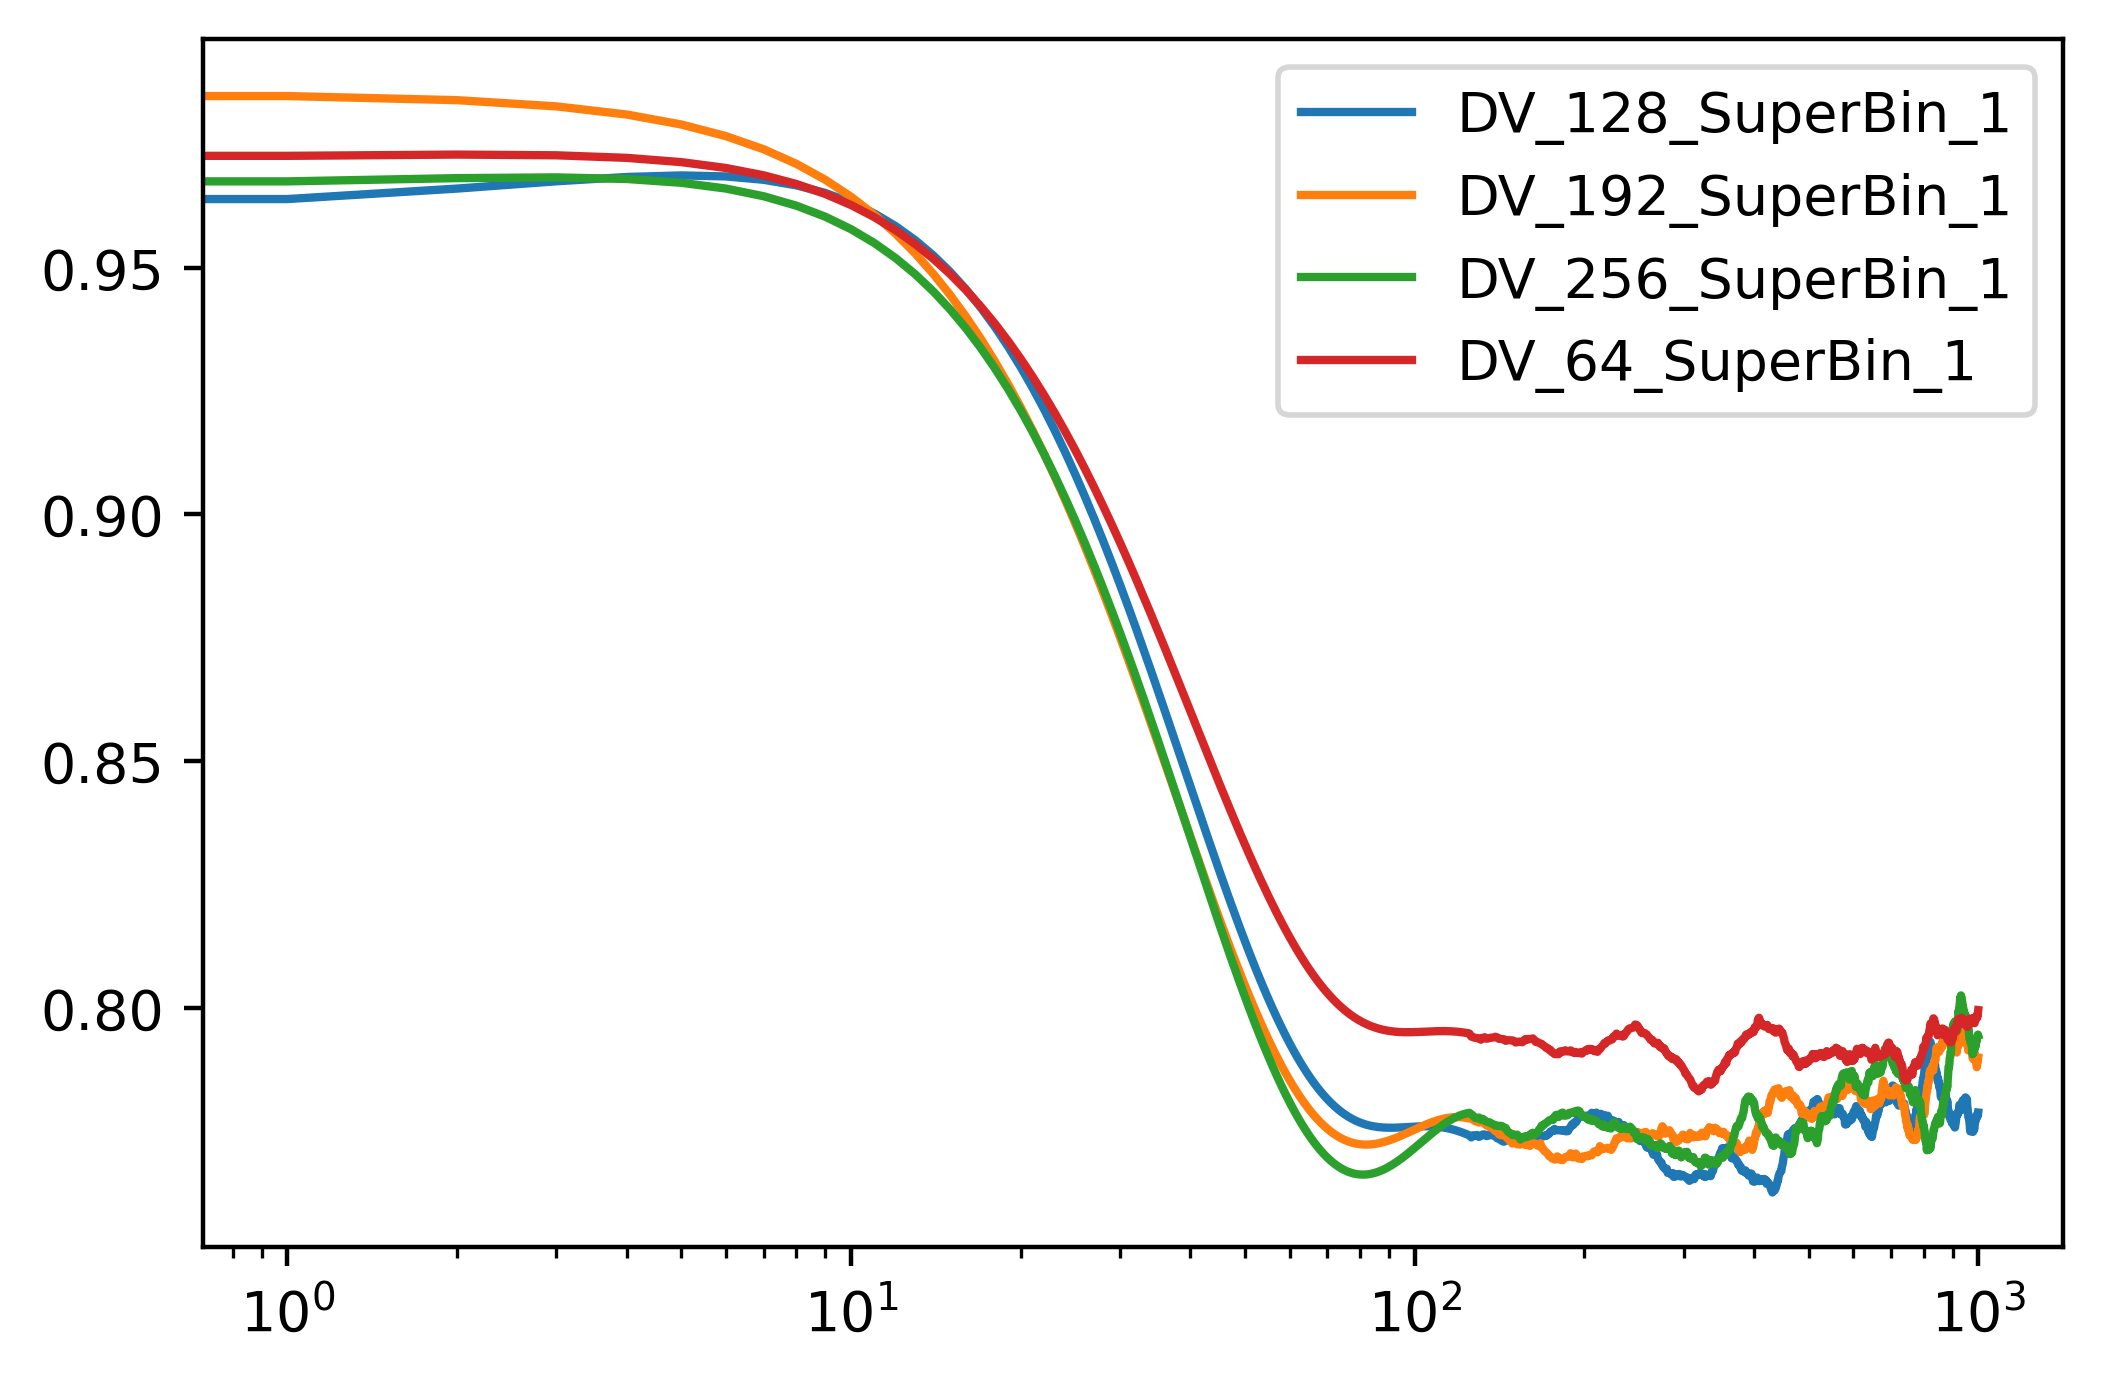

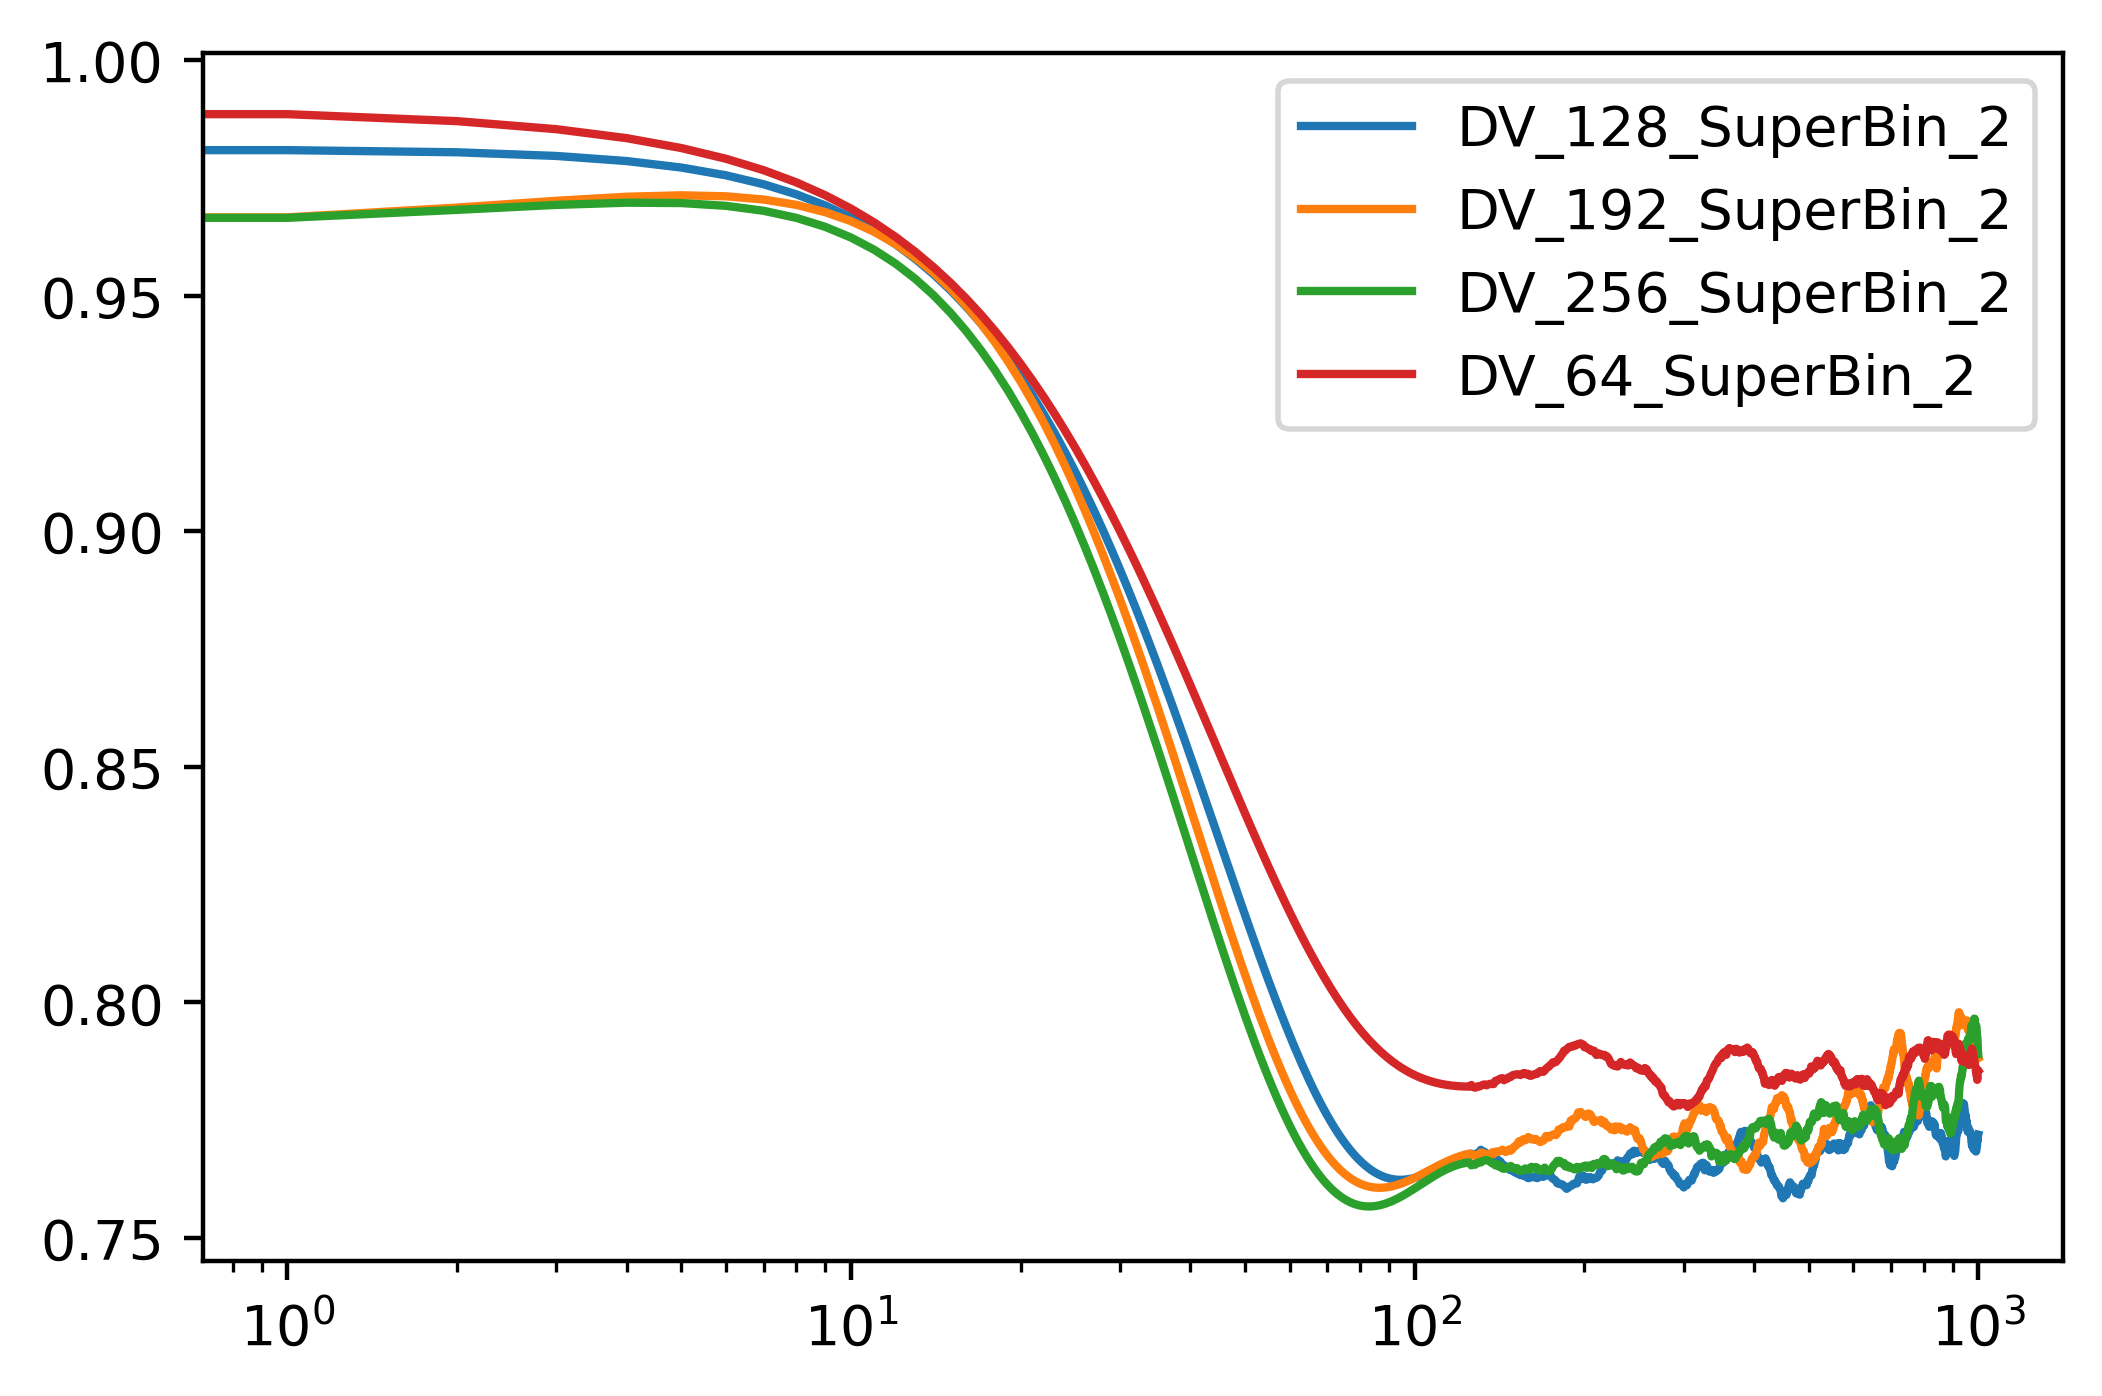

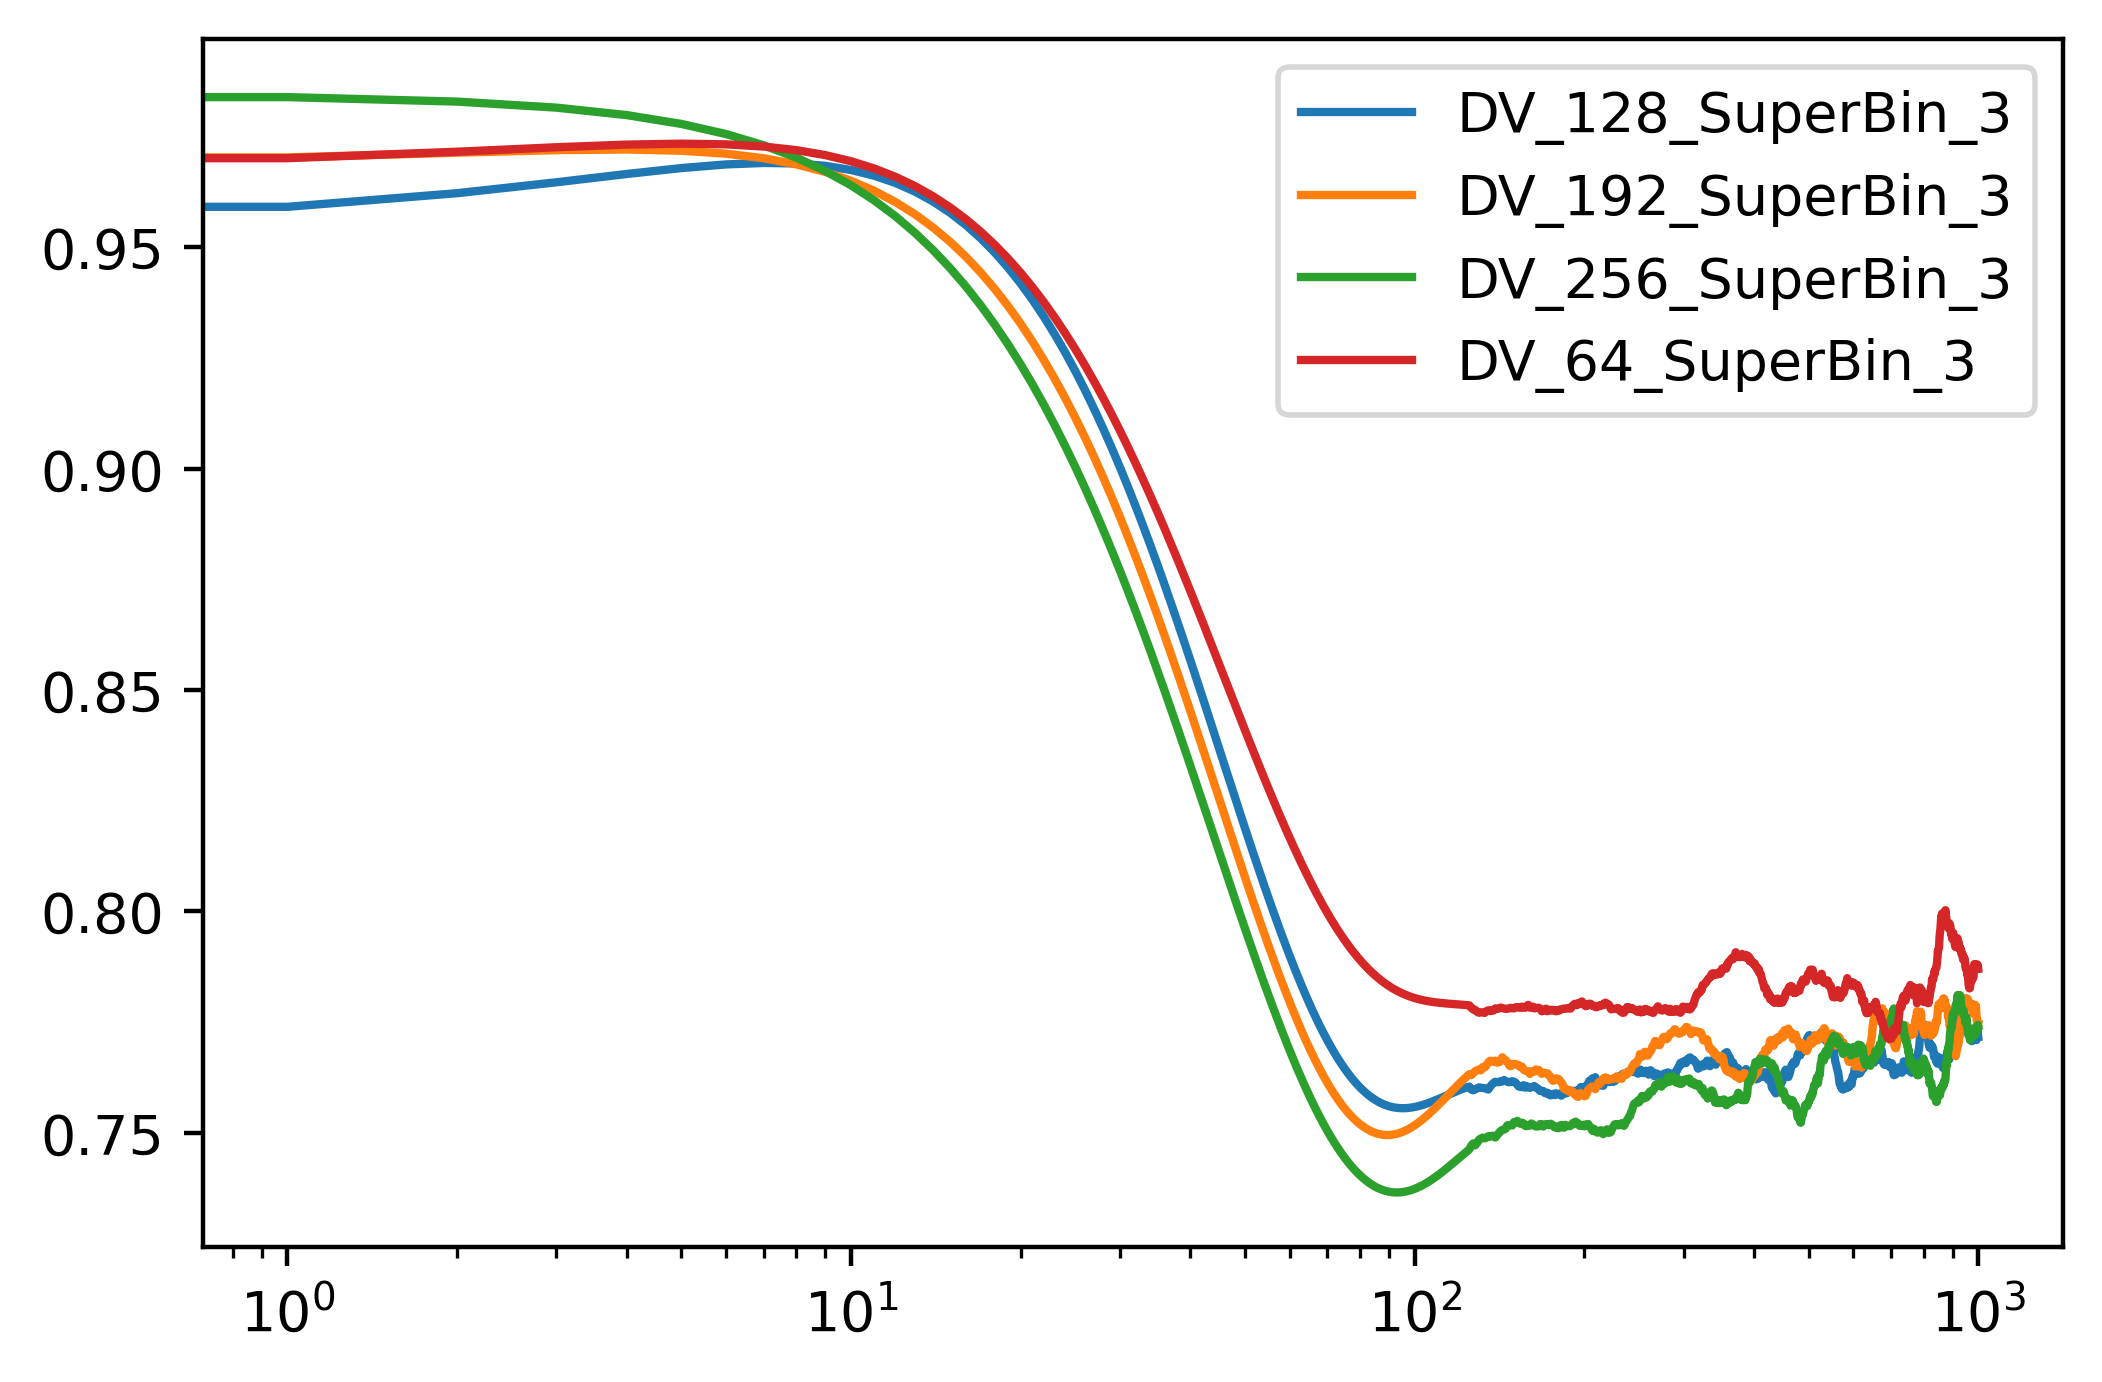

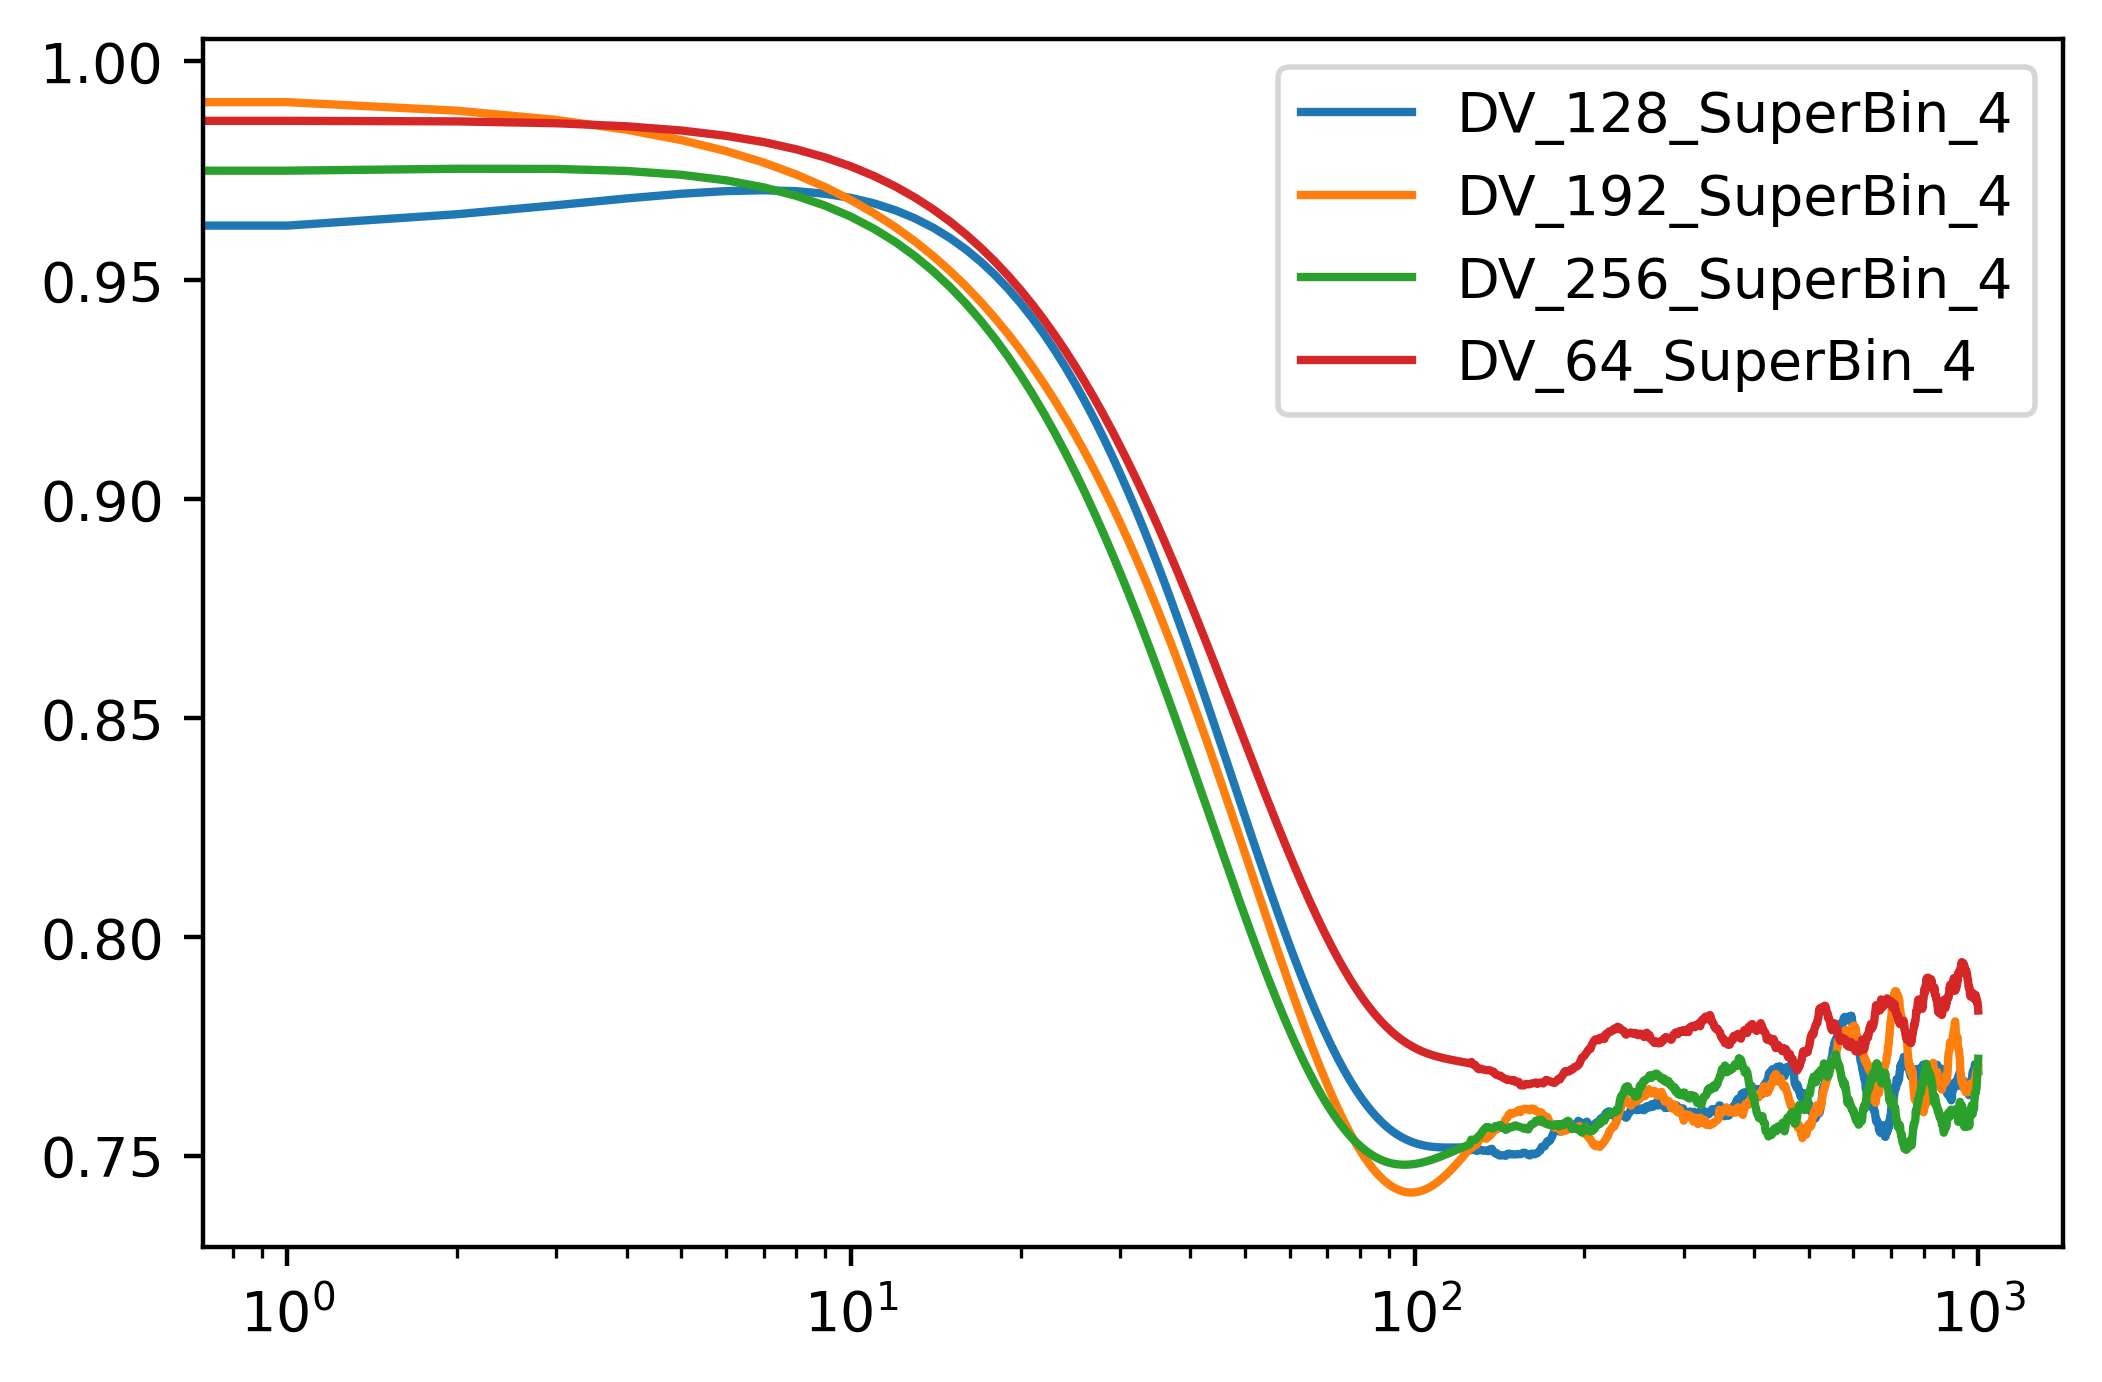

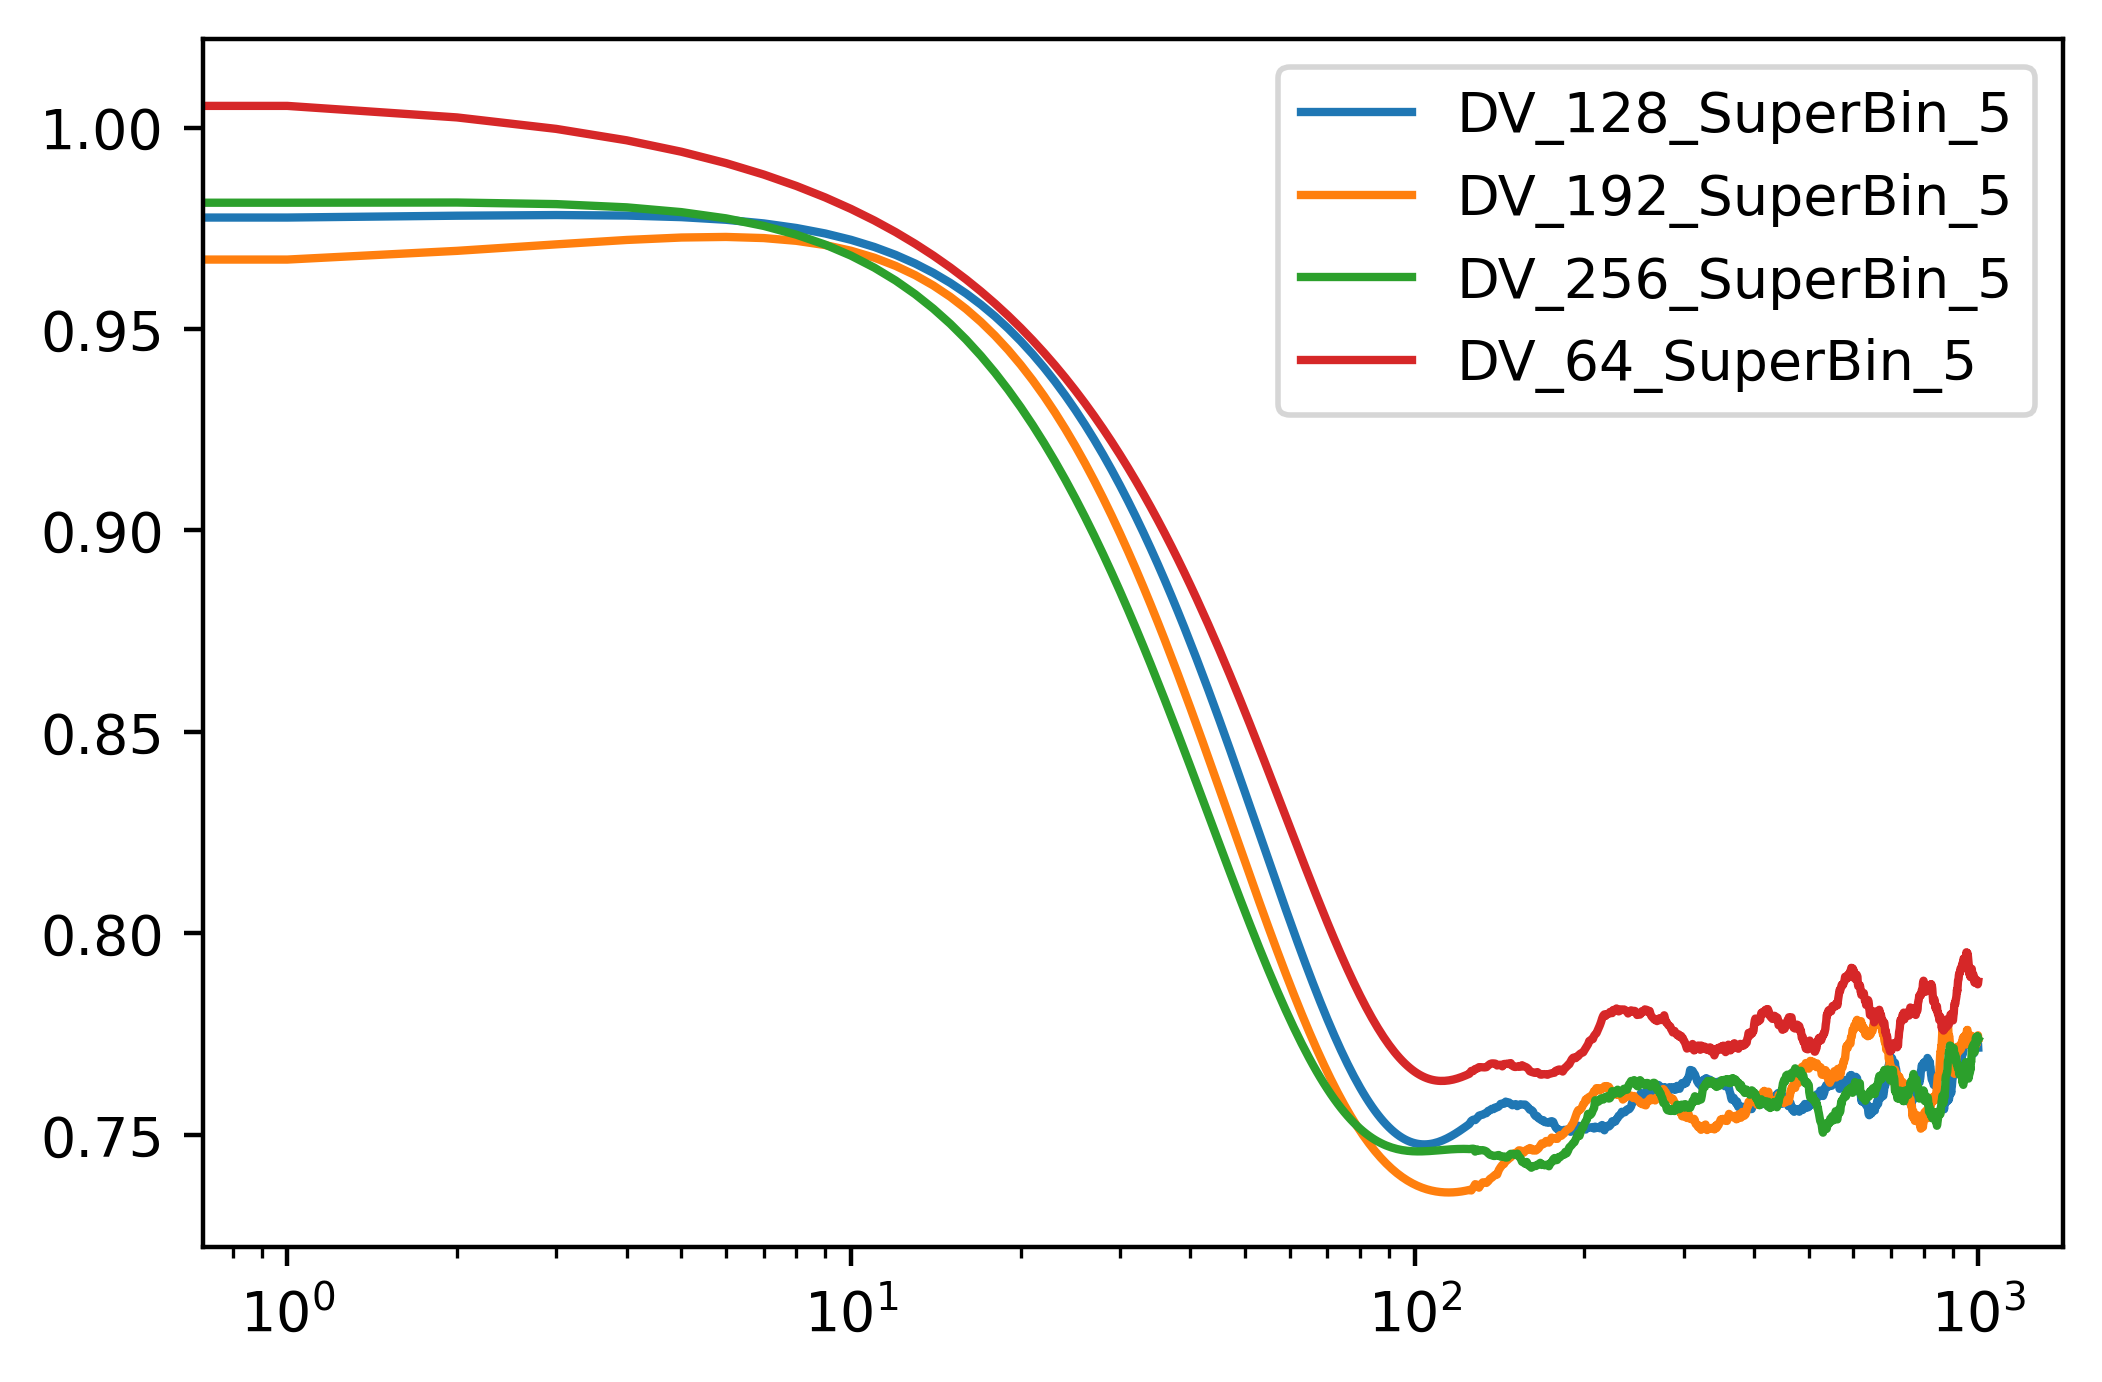

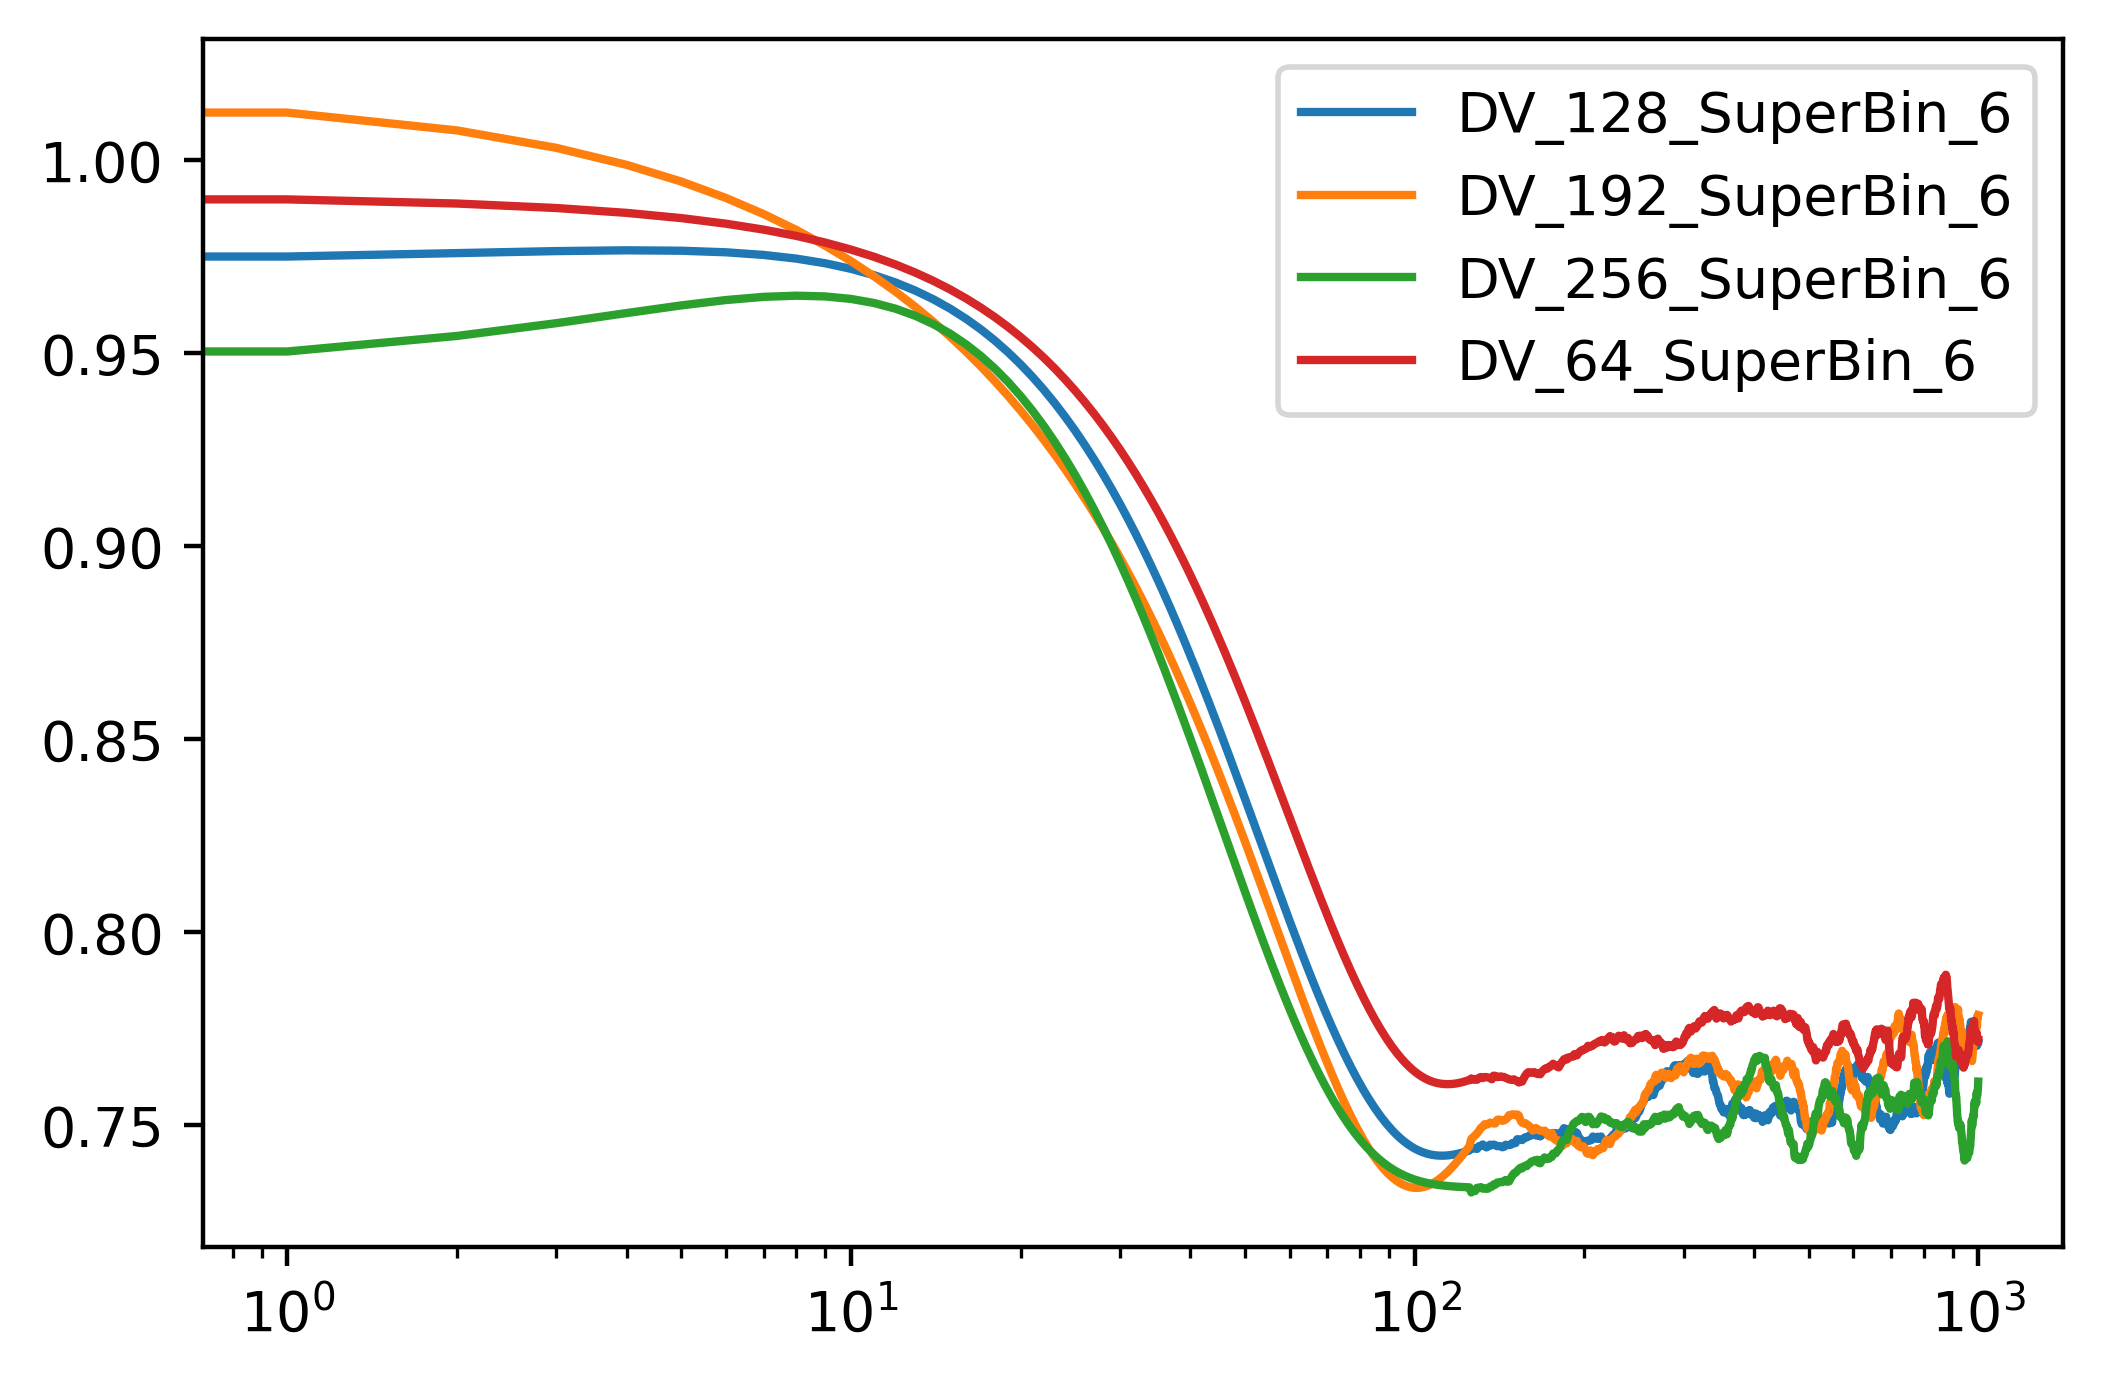

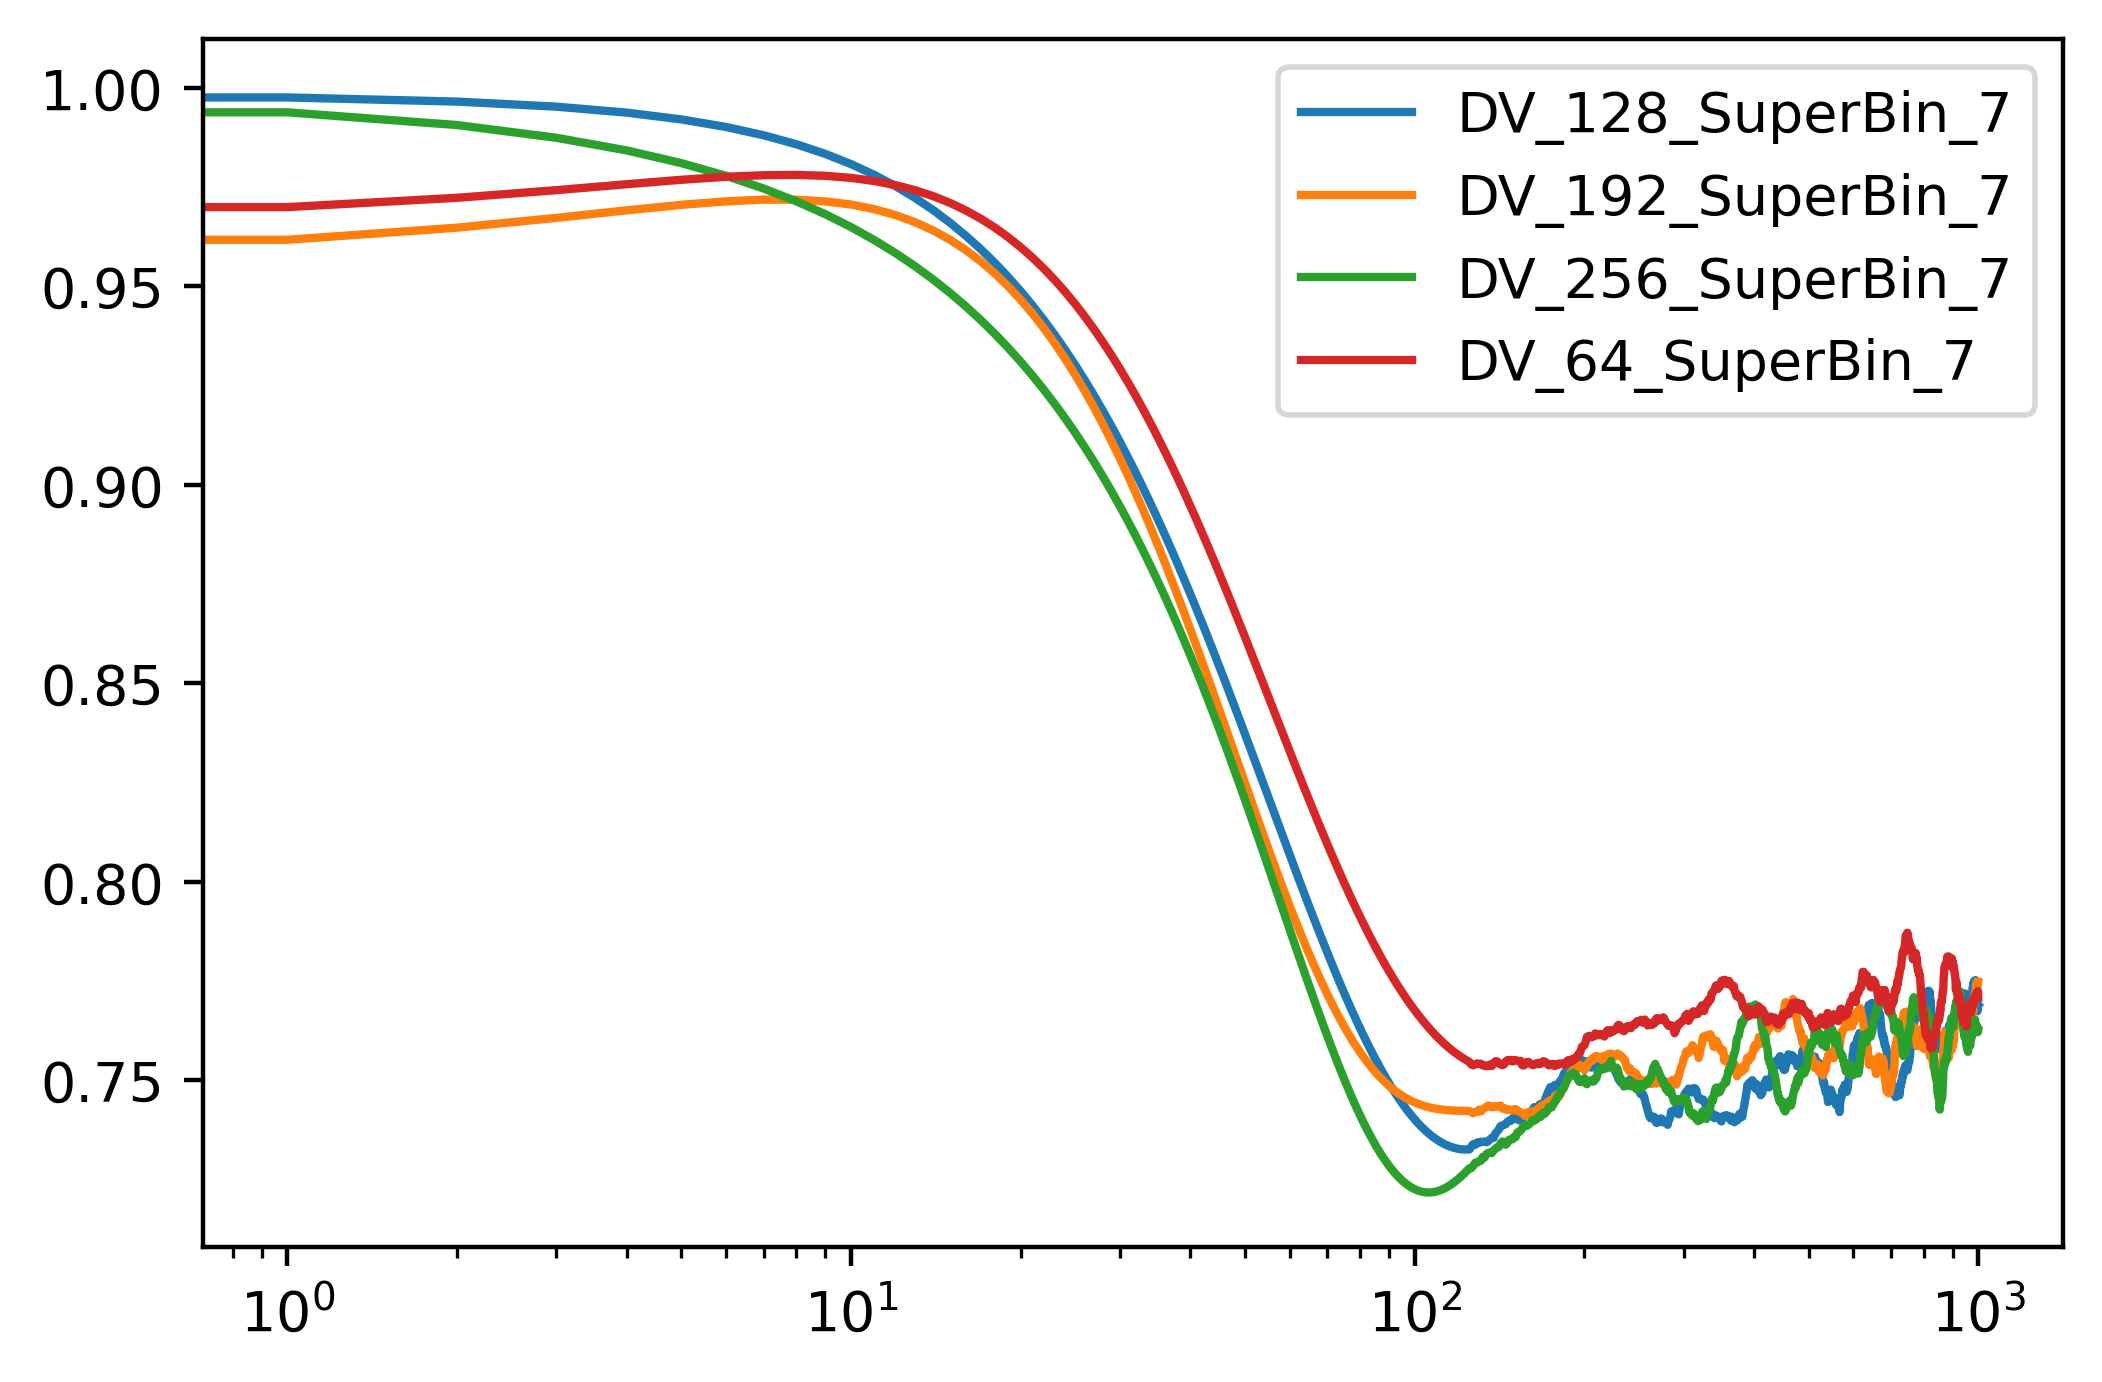

In [134]:
for i in range(9):
    plt.figure(dpi=400)
    plt.semilogx(np.transpose(smoothRatio[i:36:9,:1000]));
    plt.legend(titles[i:36:9]);

0.210241140663397
-1.4124987053891969
-0.21207120825078687
-1.583279505353661
-0.2792787654613426
0.947843324668113
1.1149089244848103
0.16552317081452755
0.3769039828490043


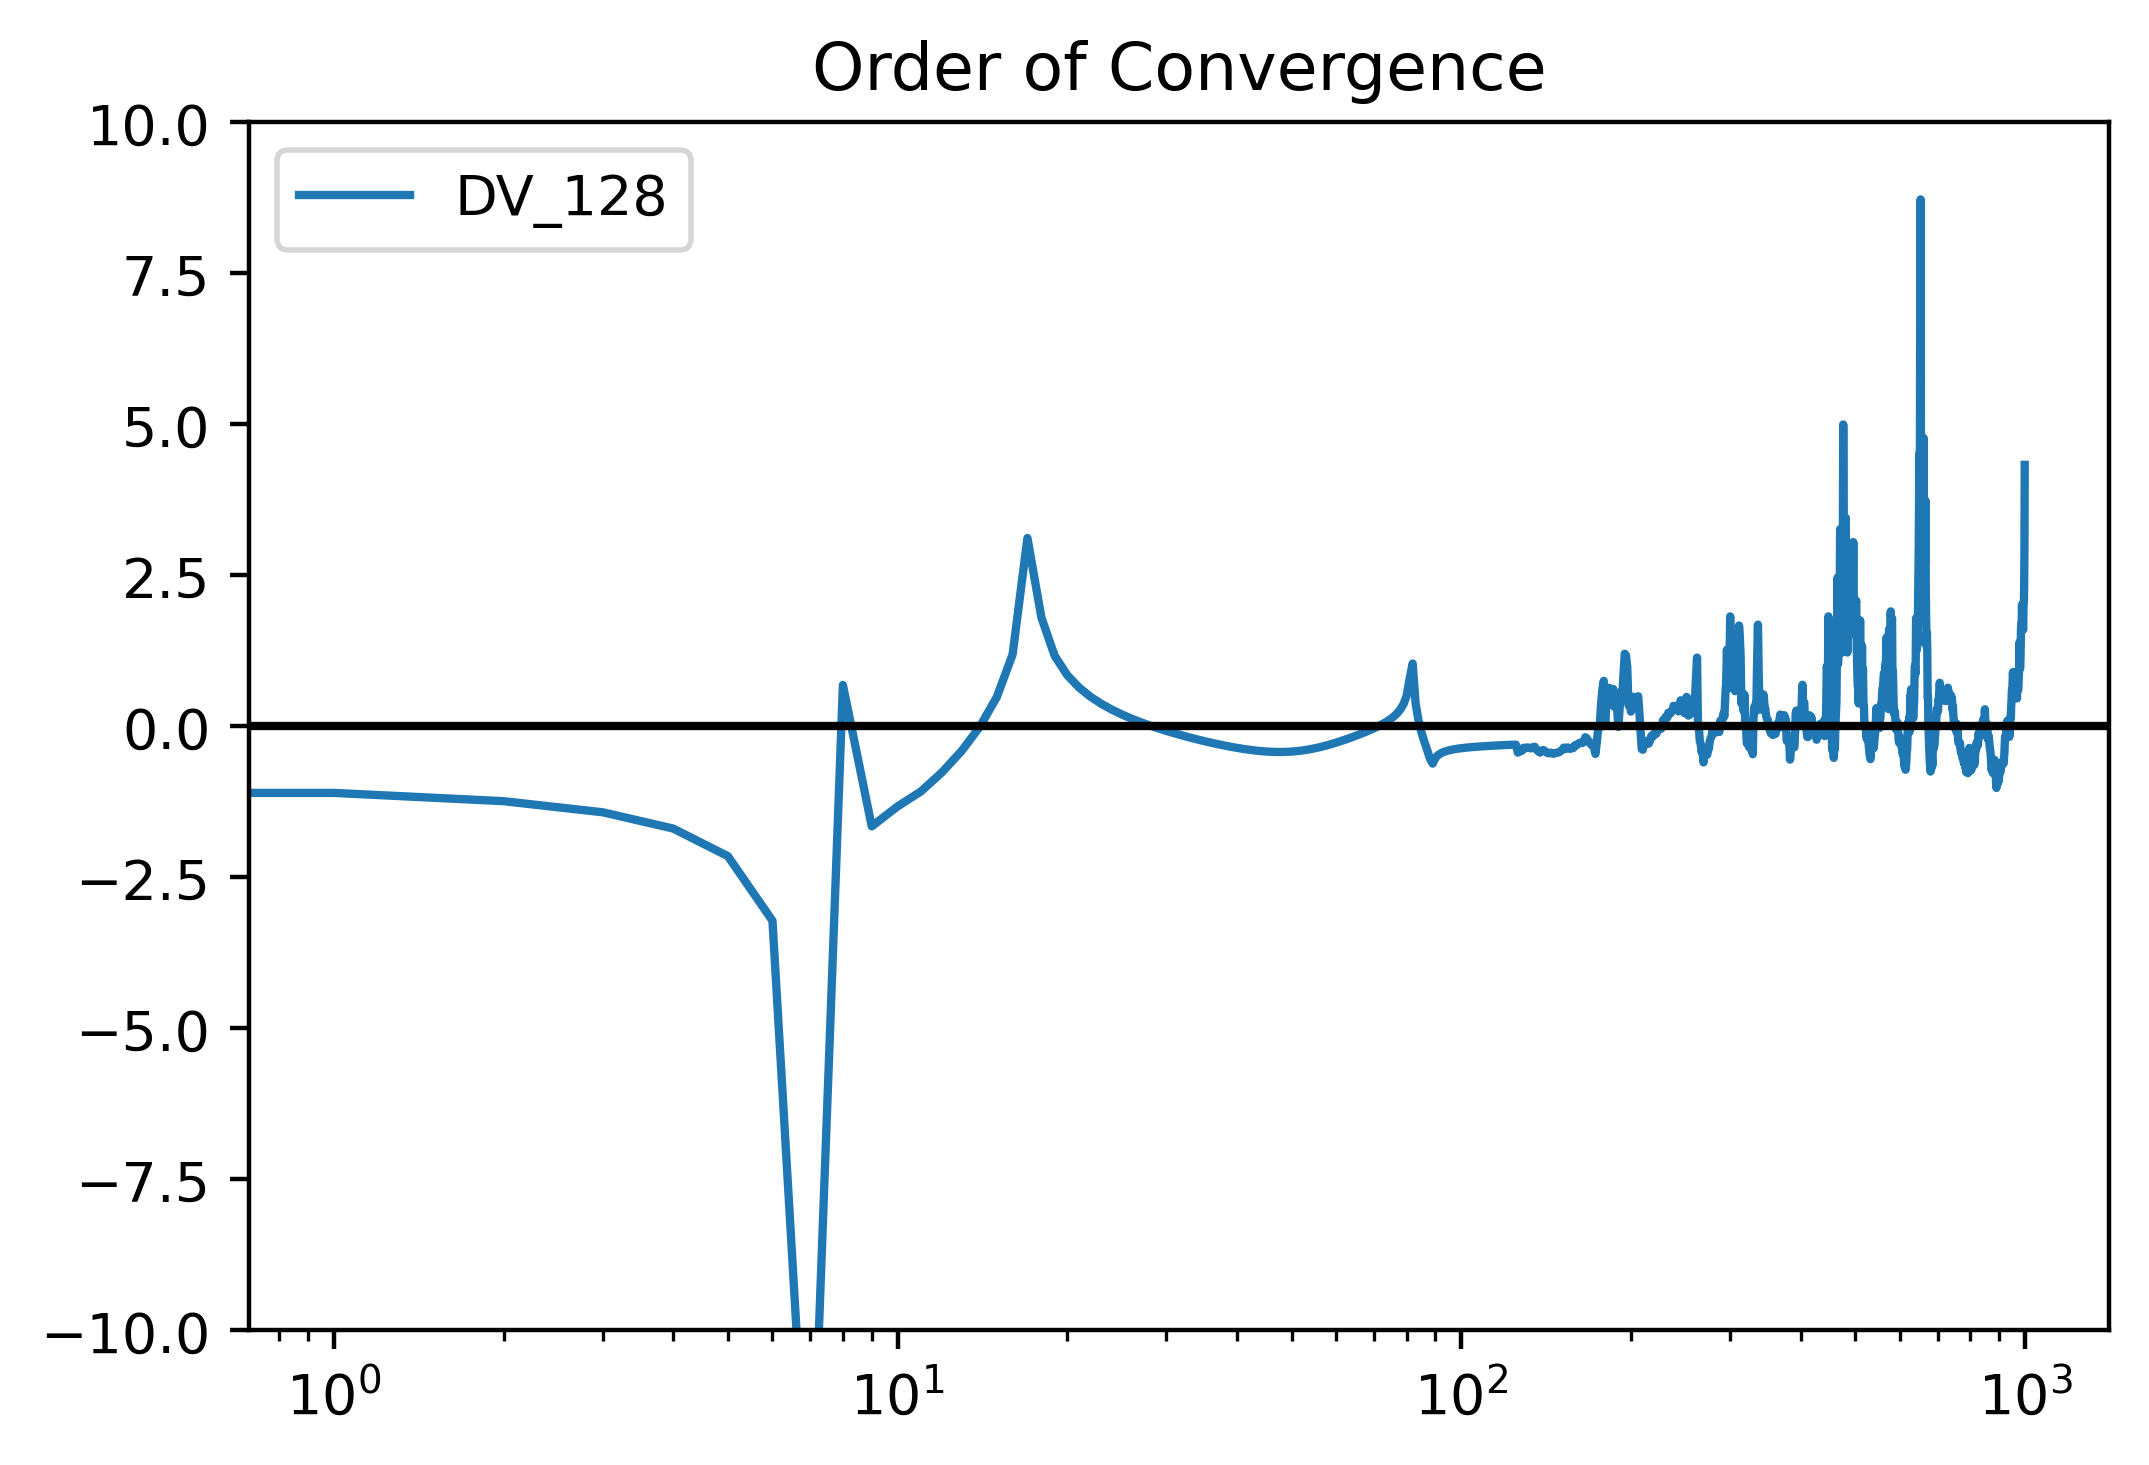

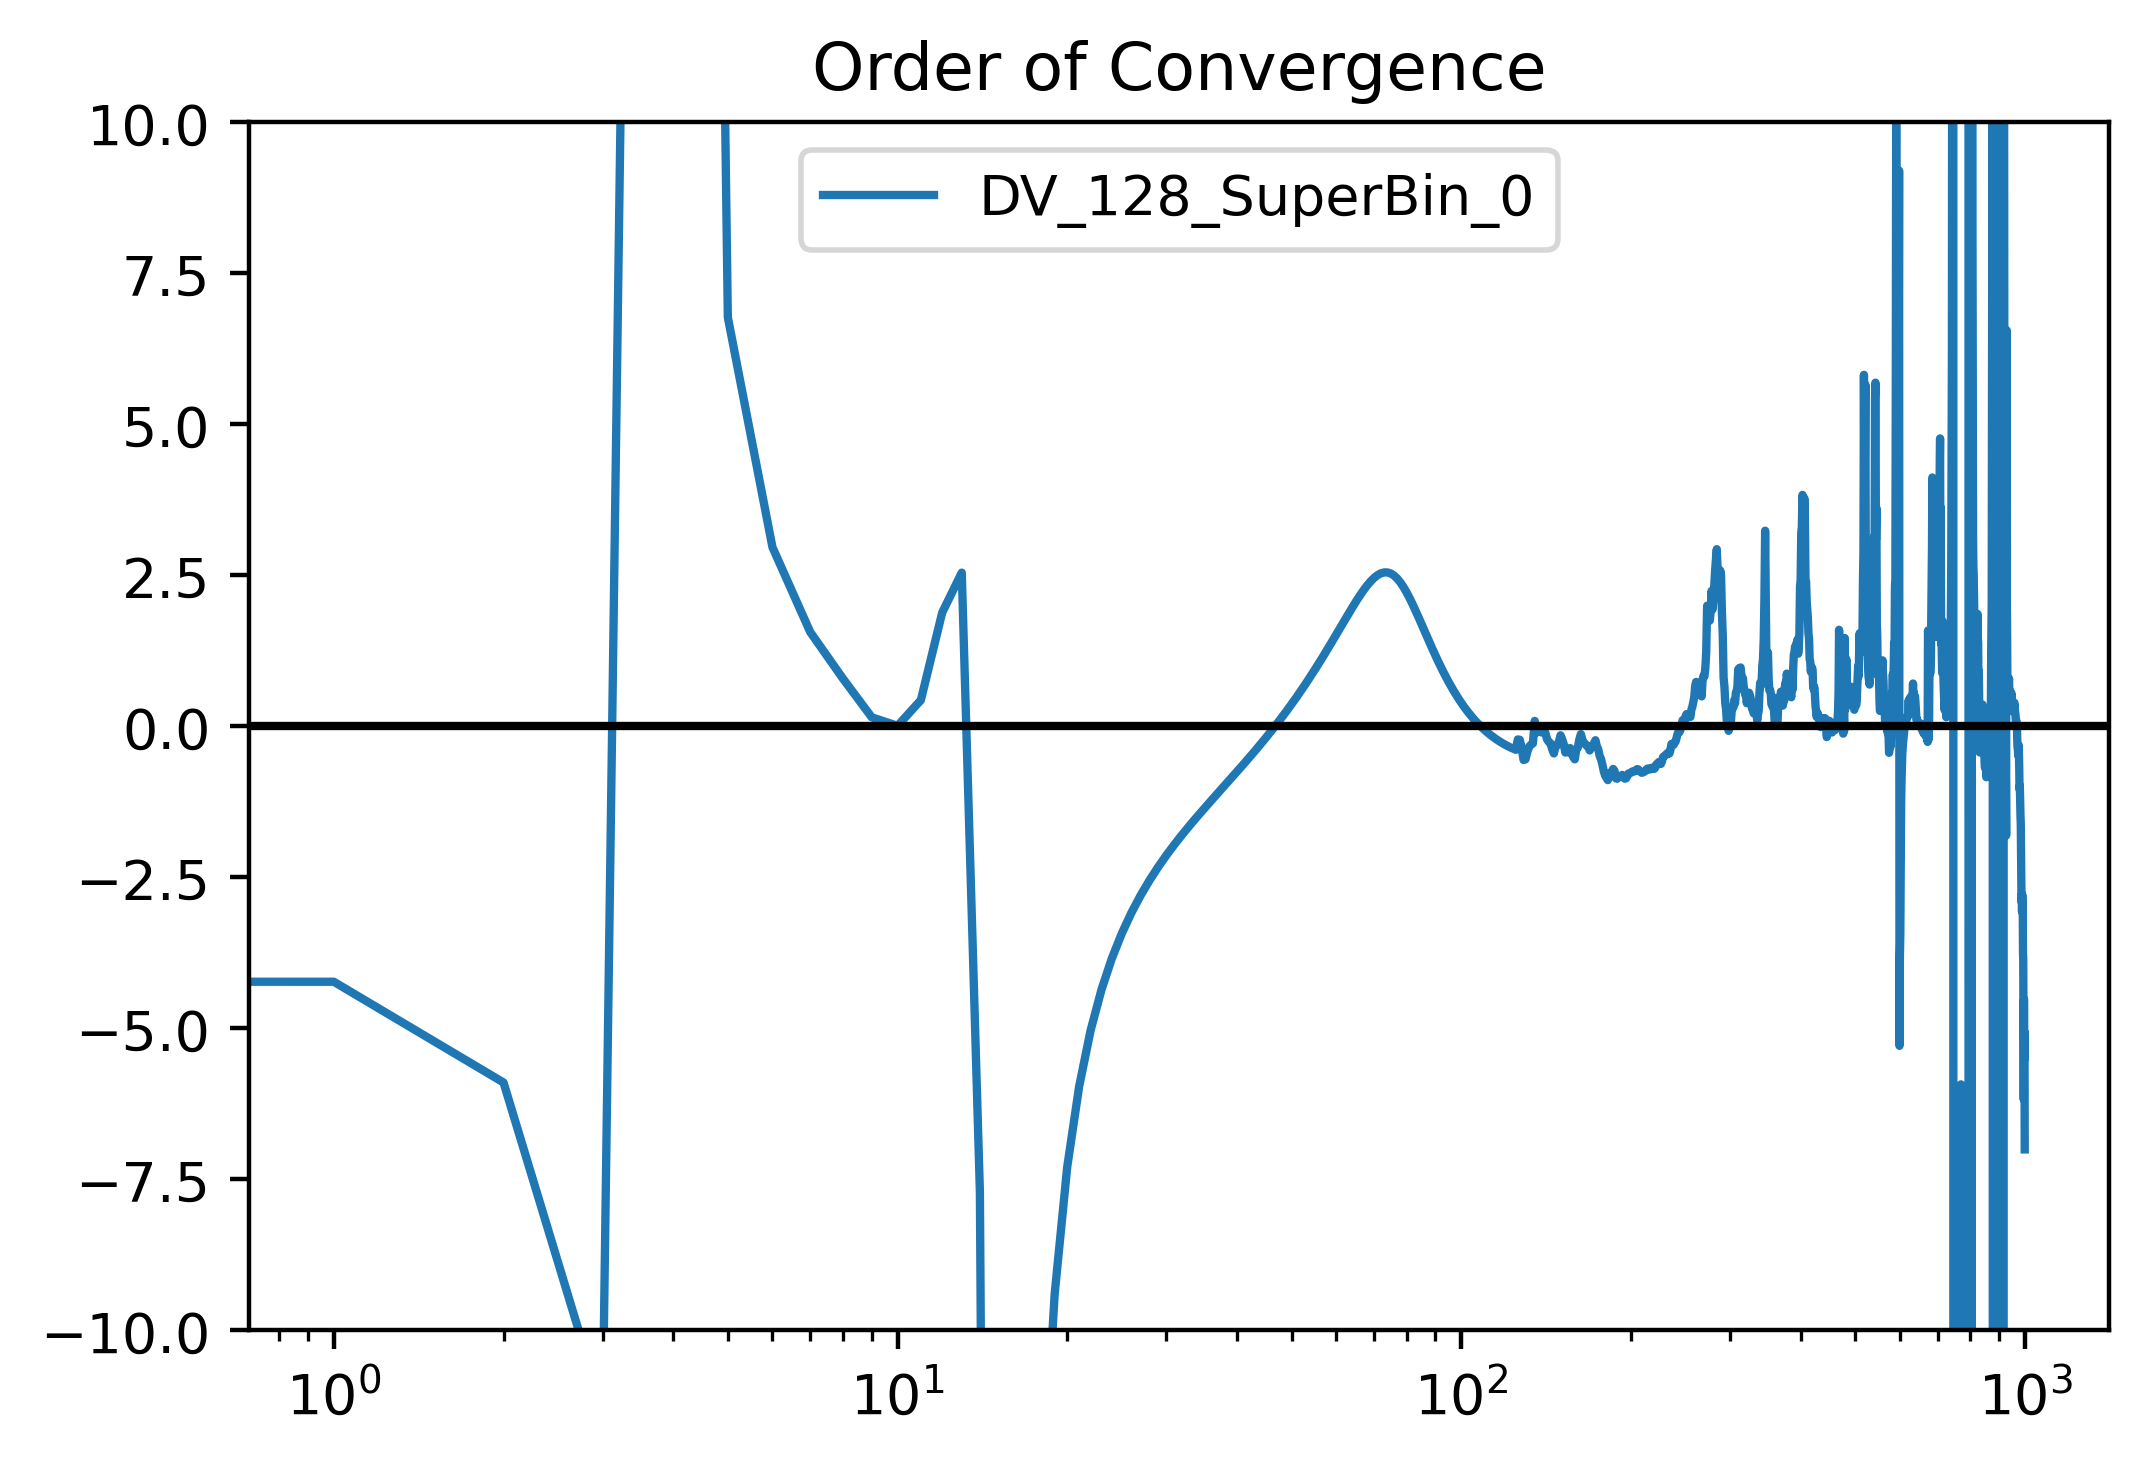

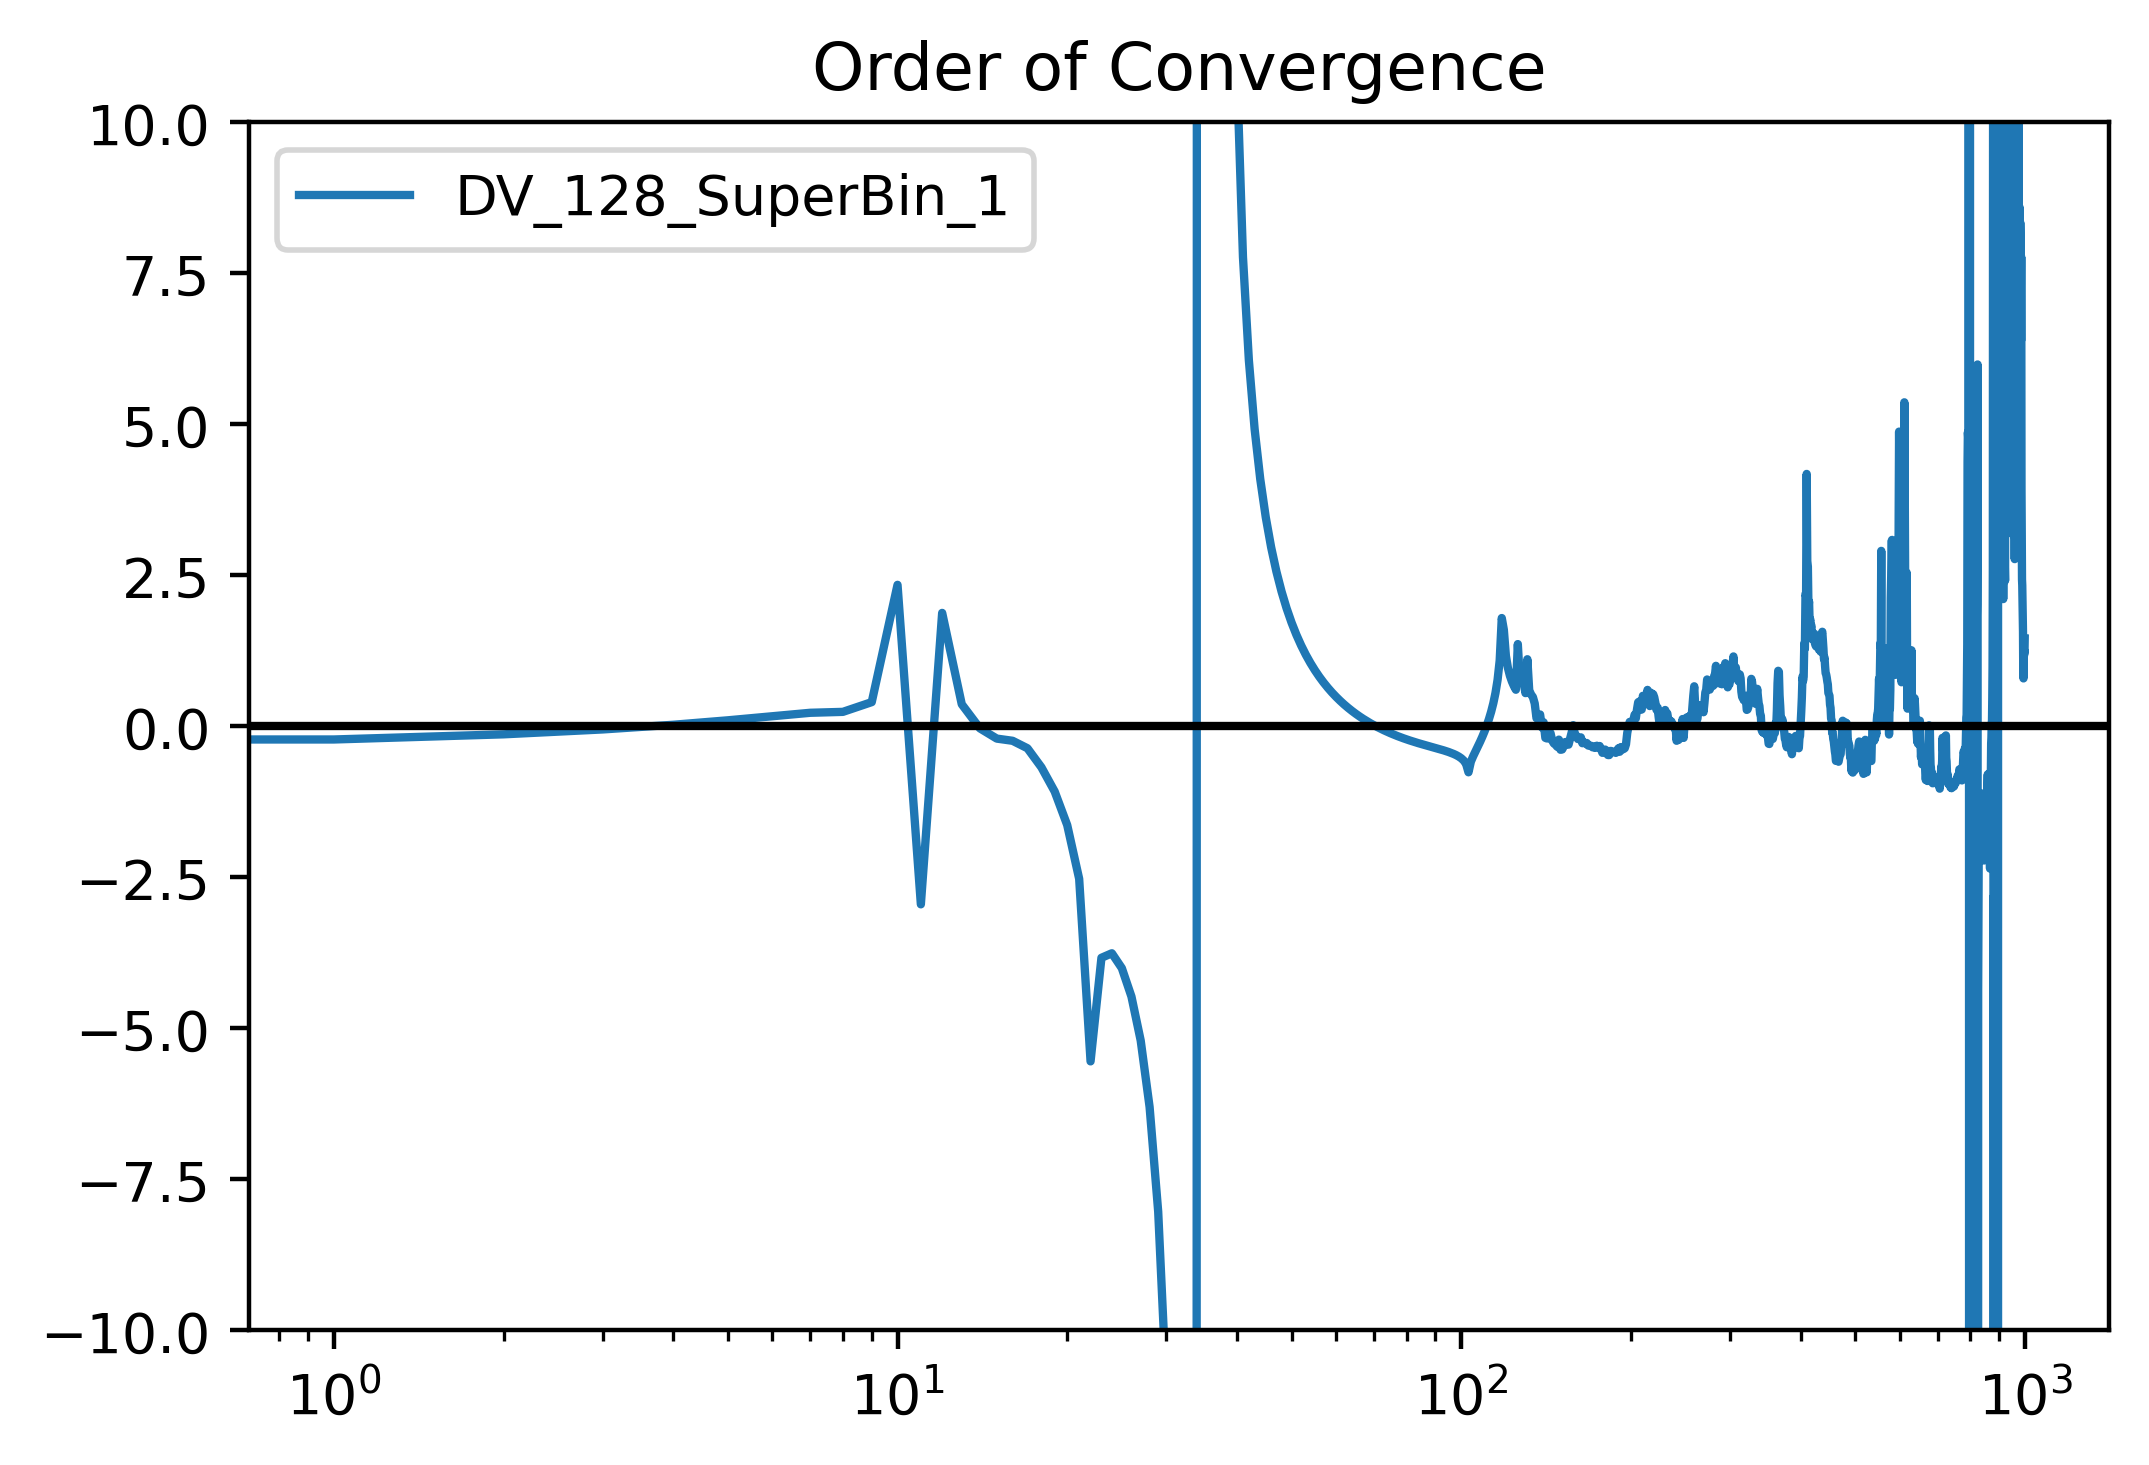

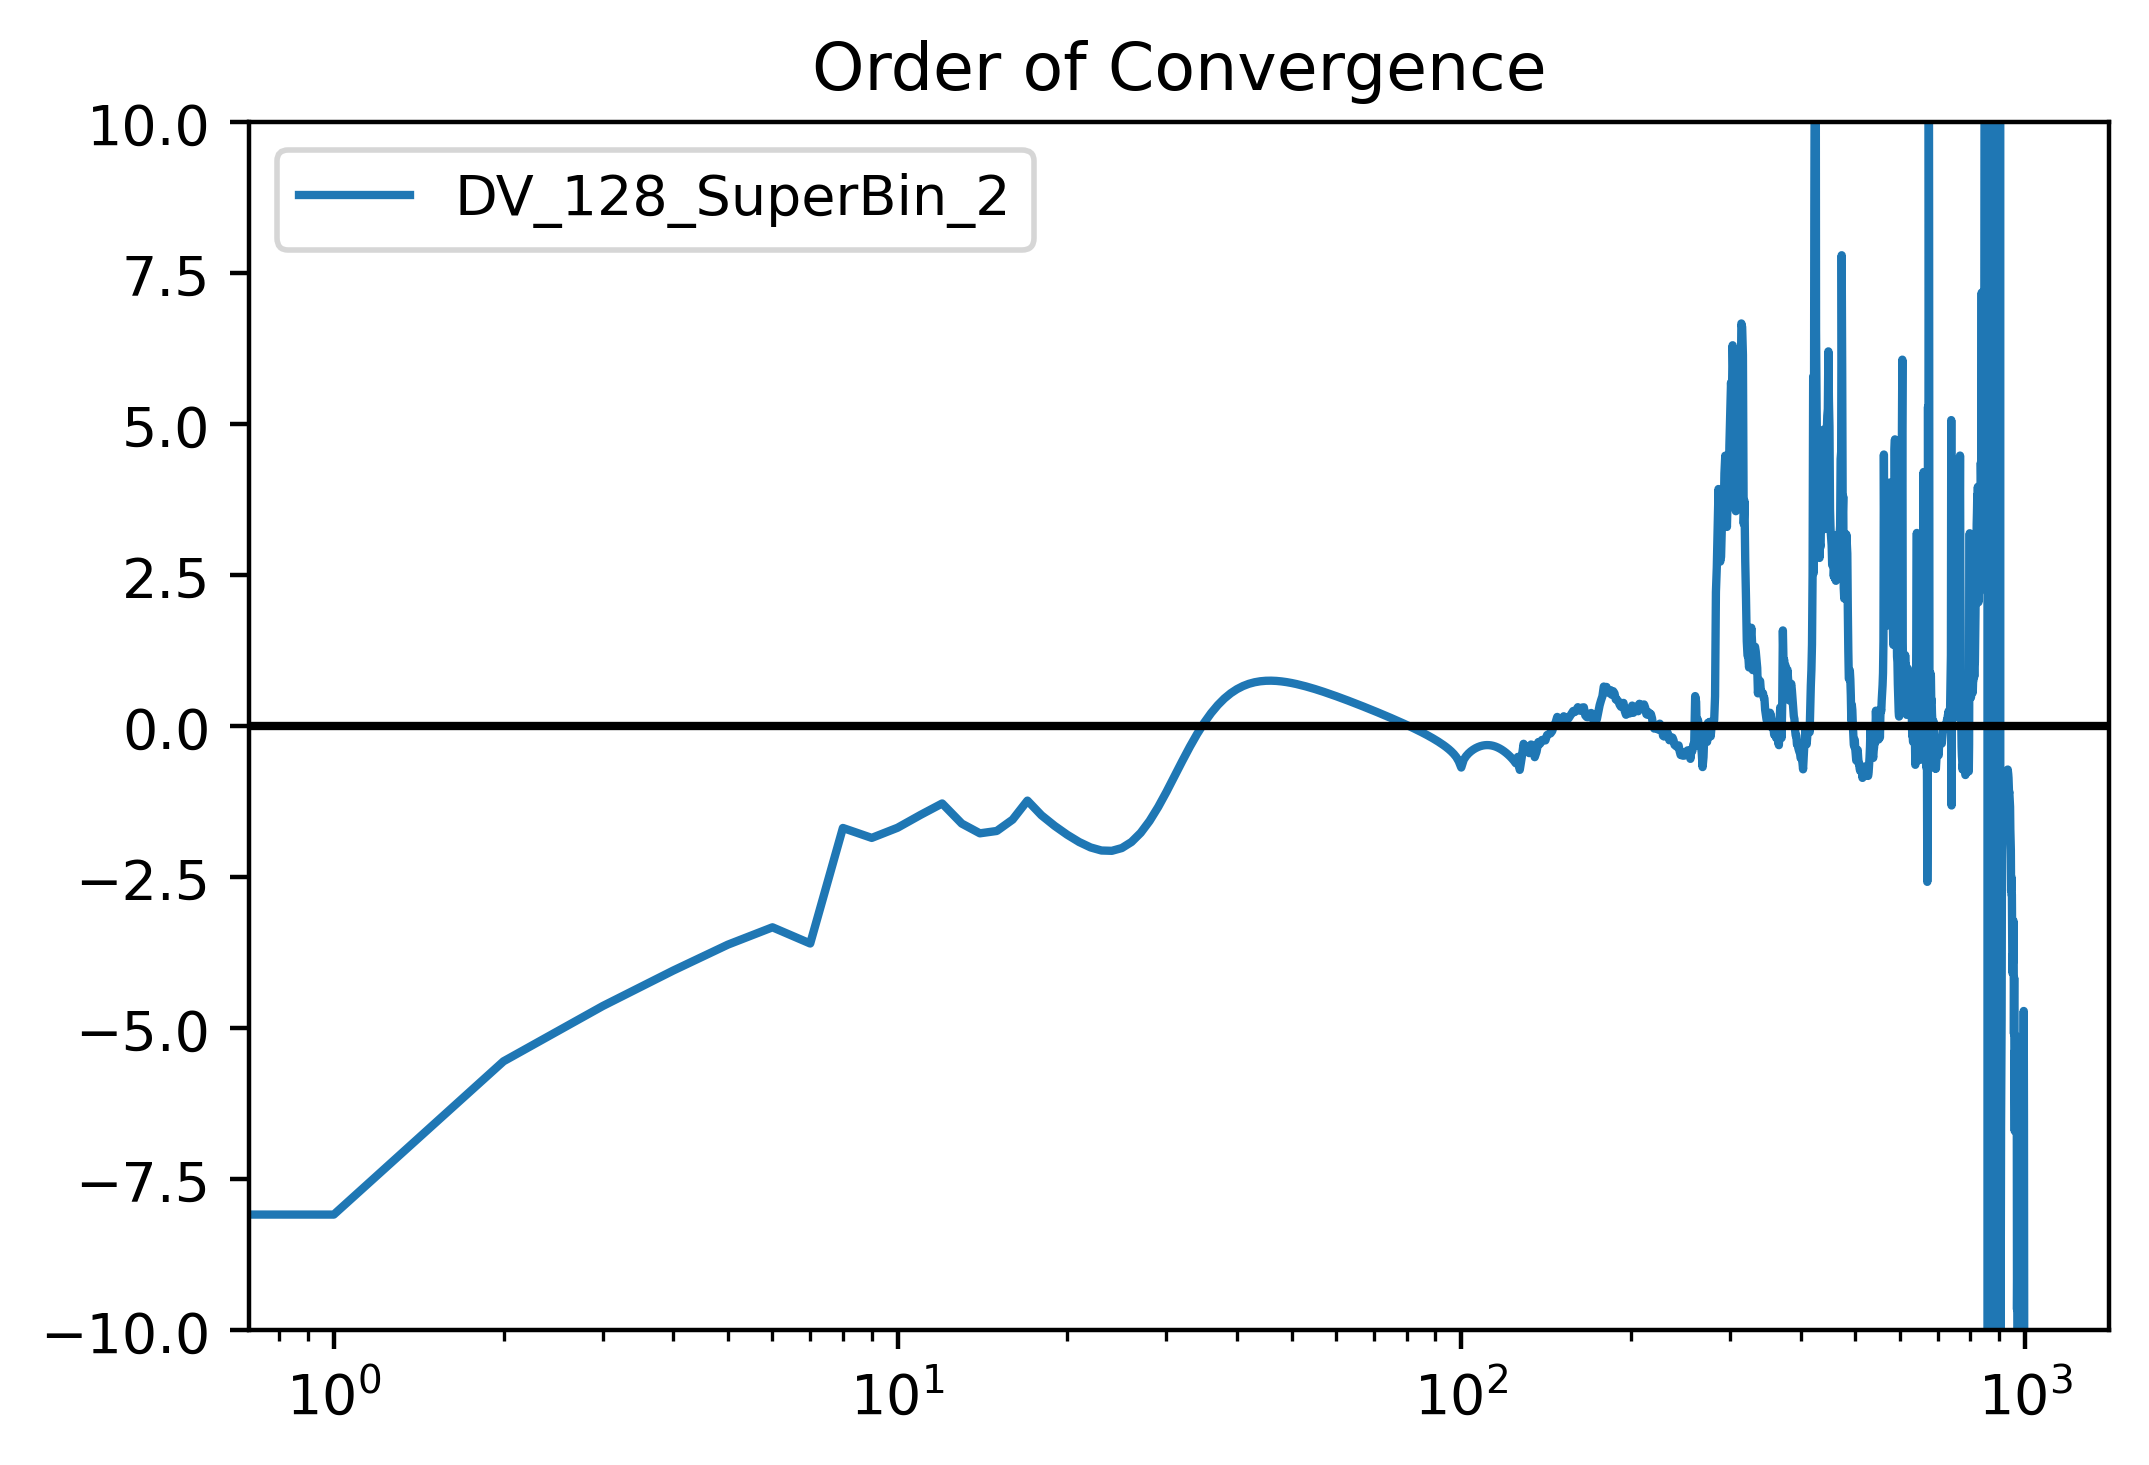

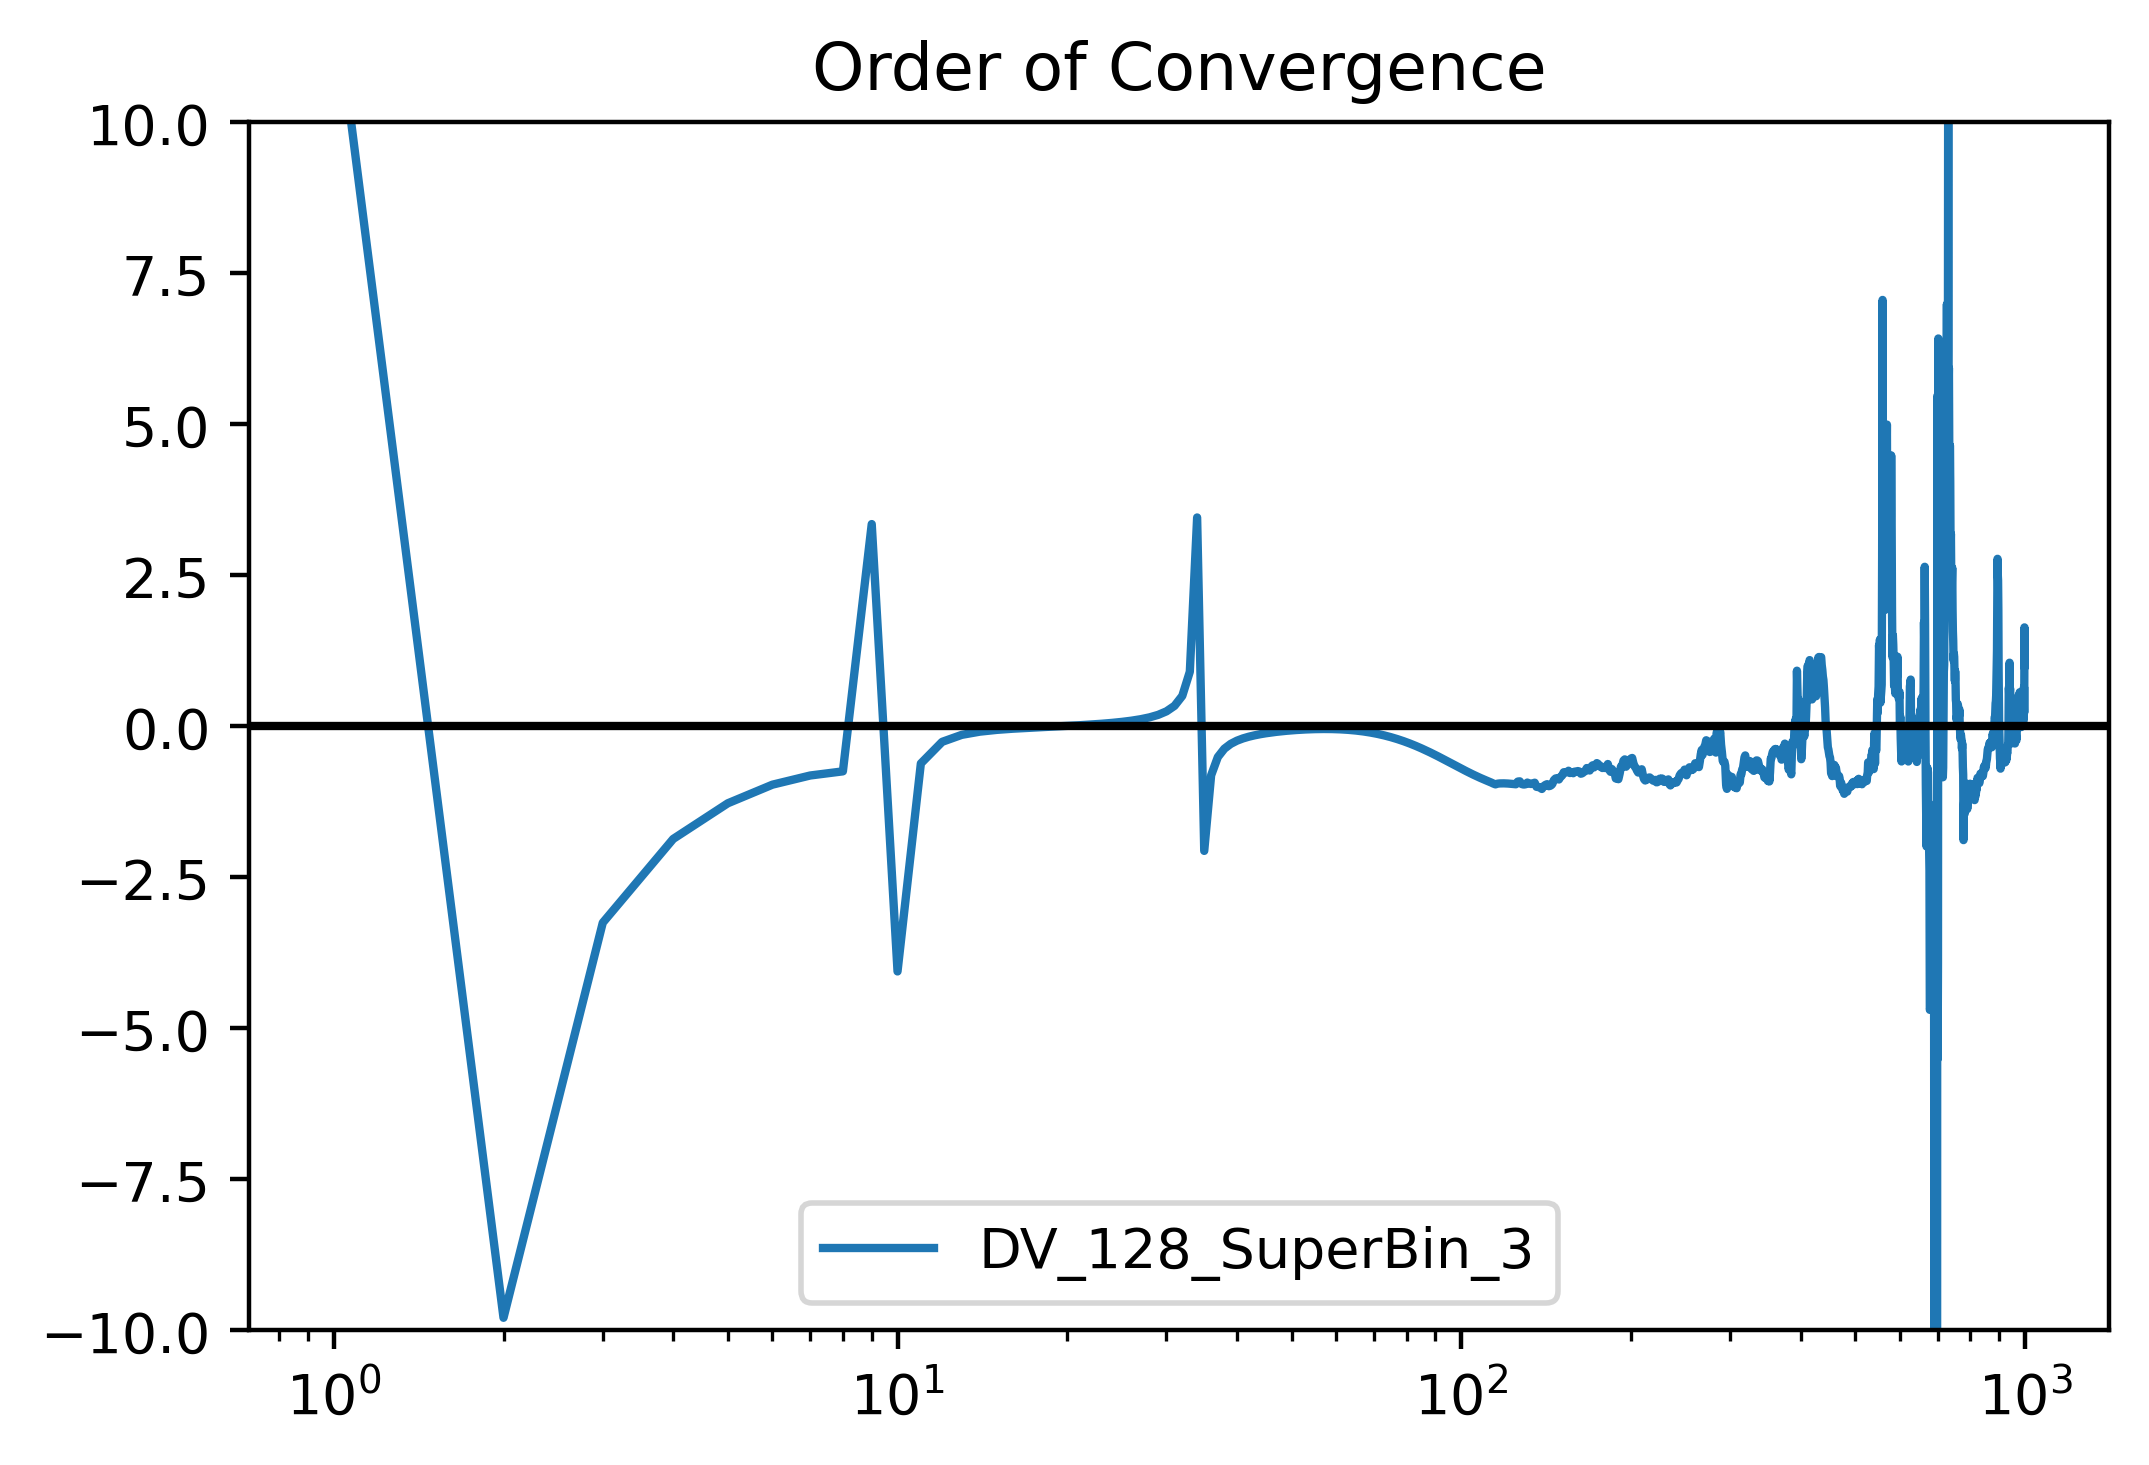

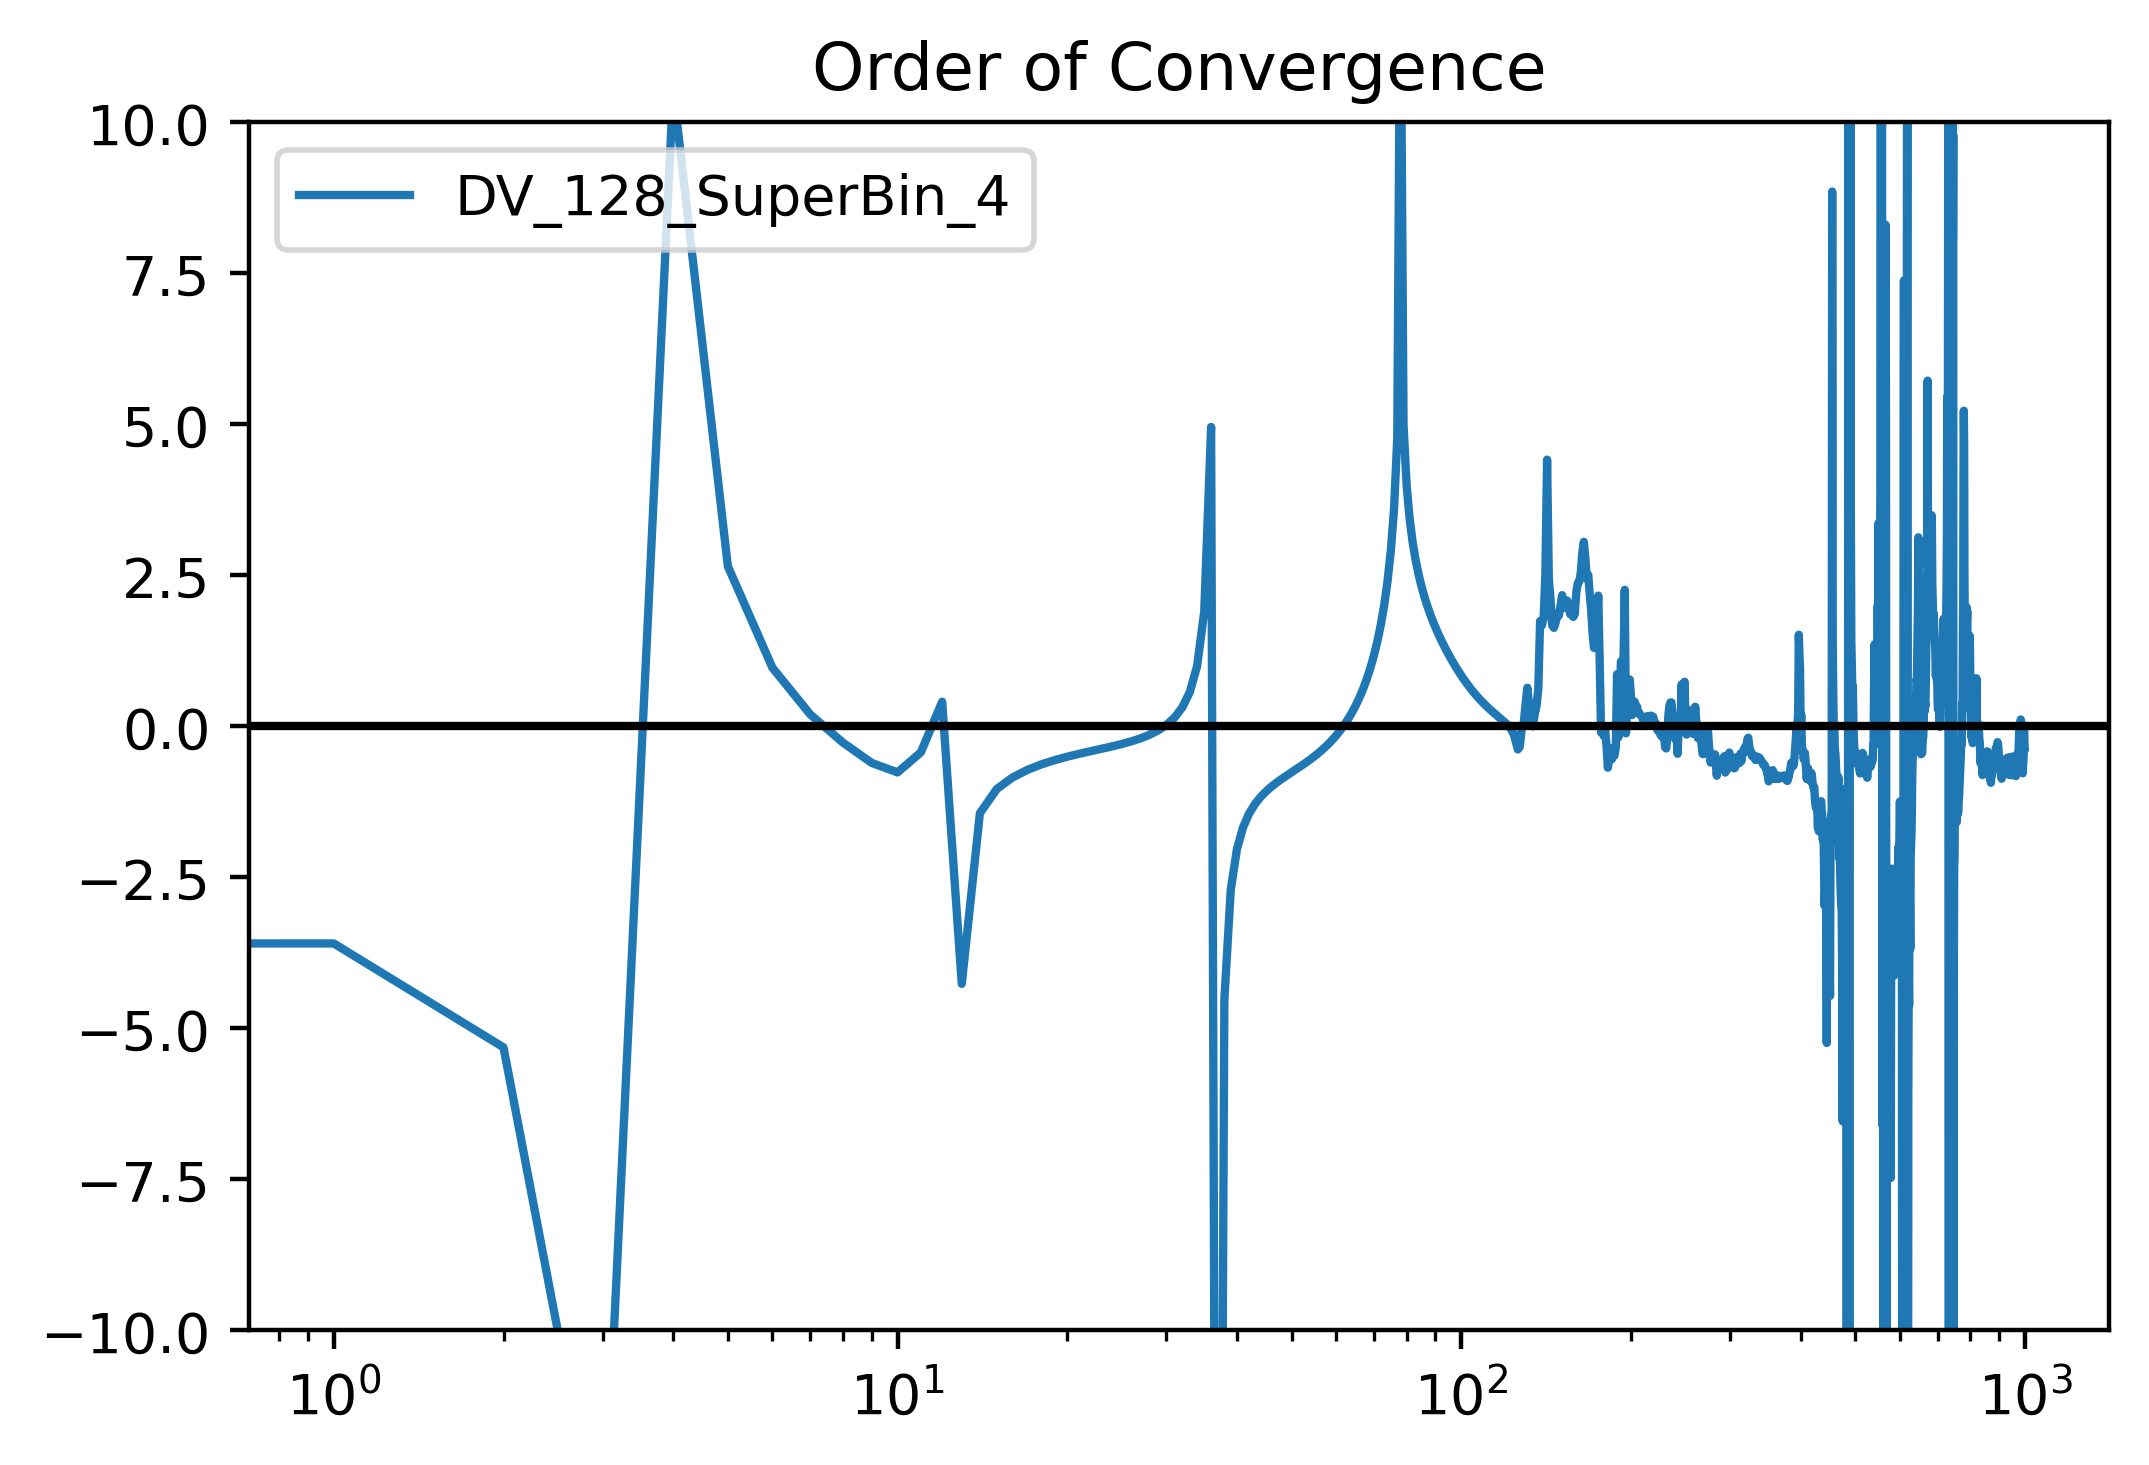

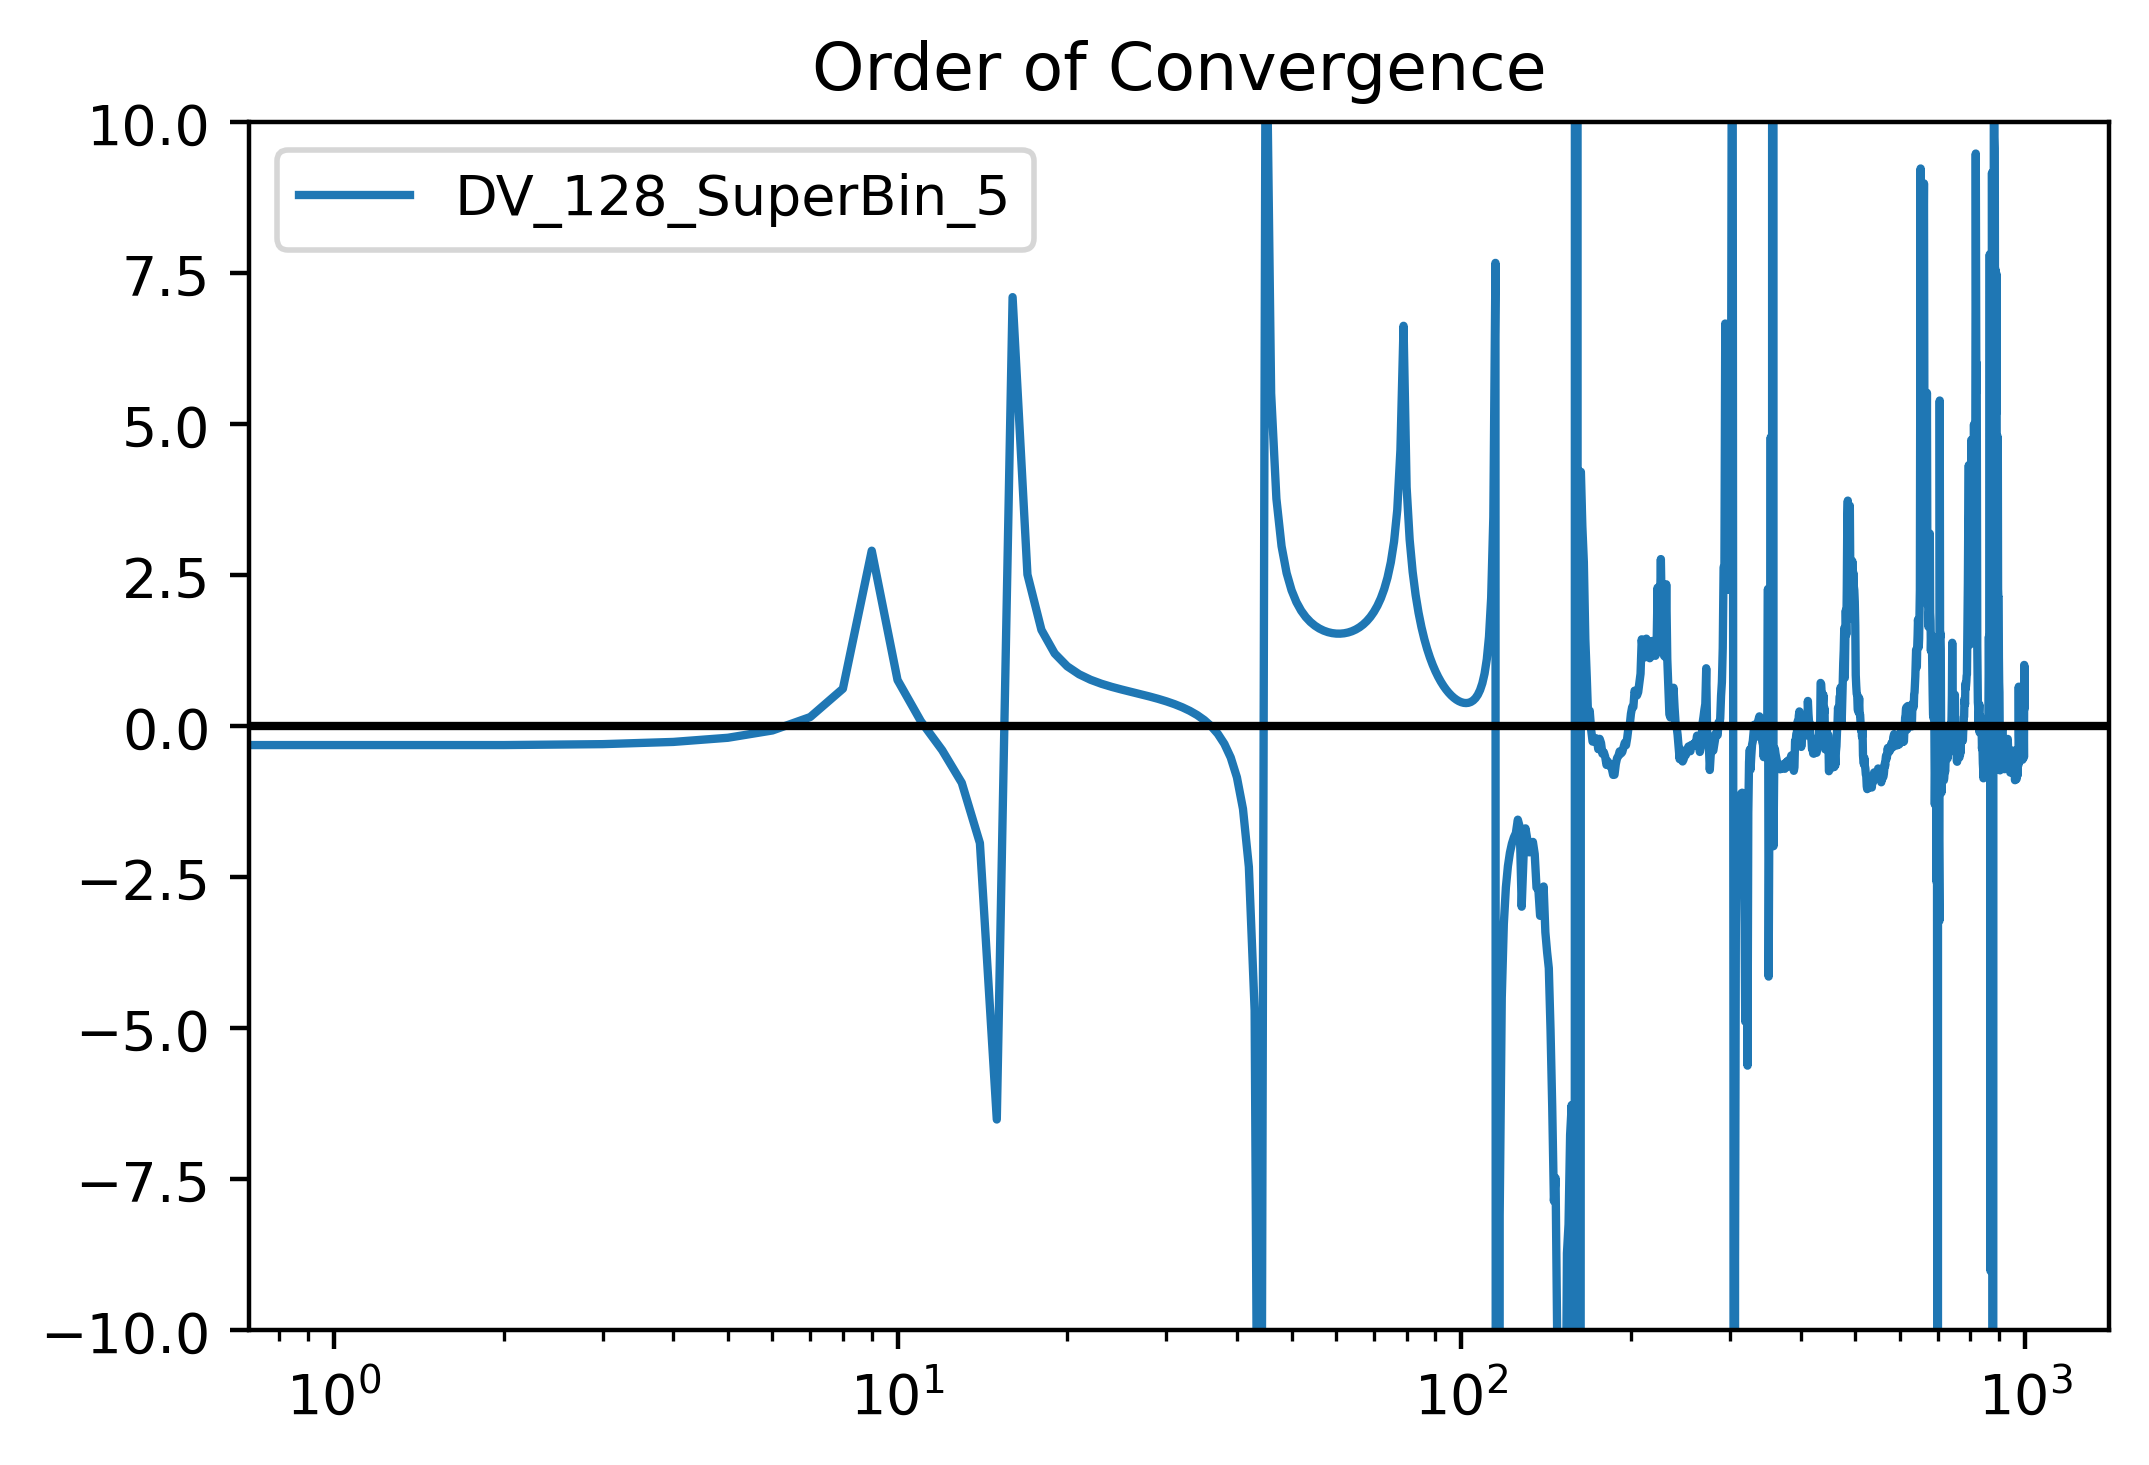

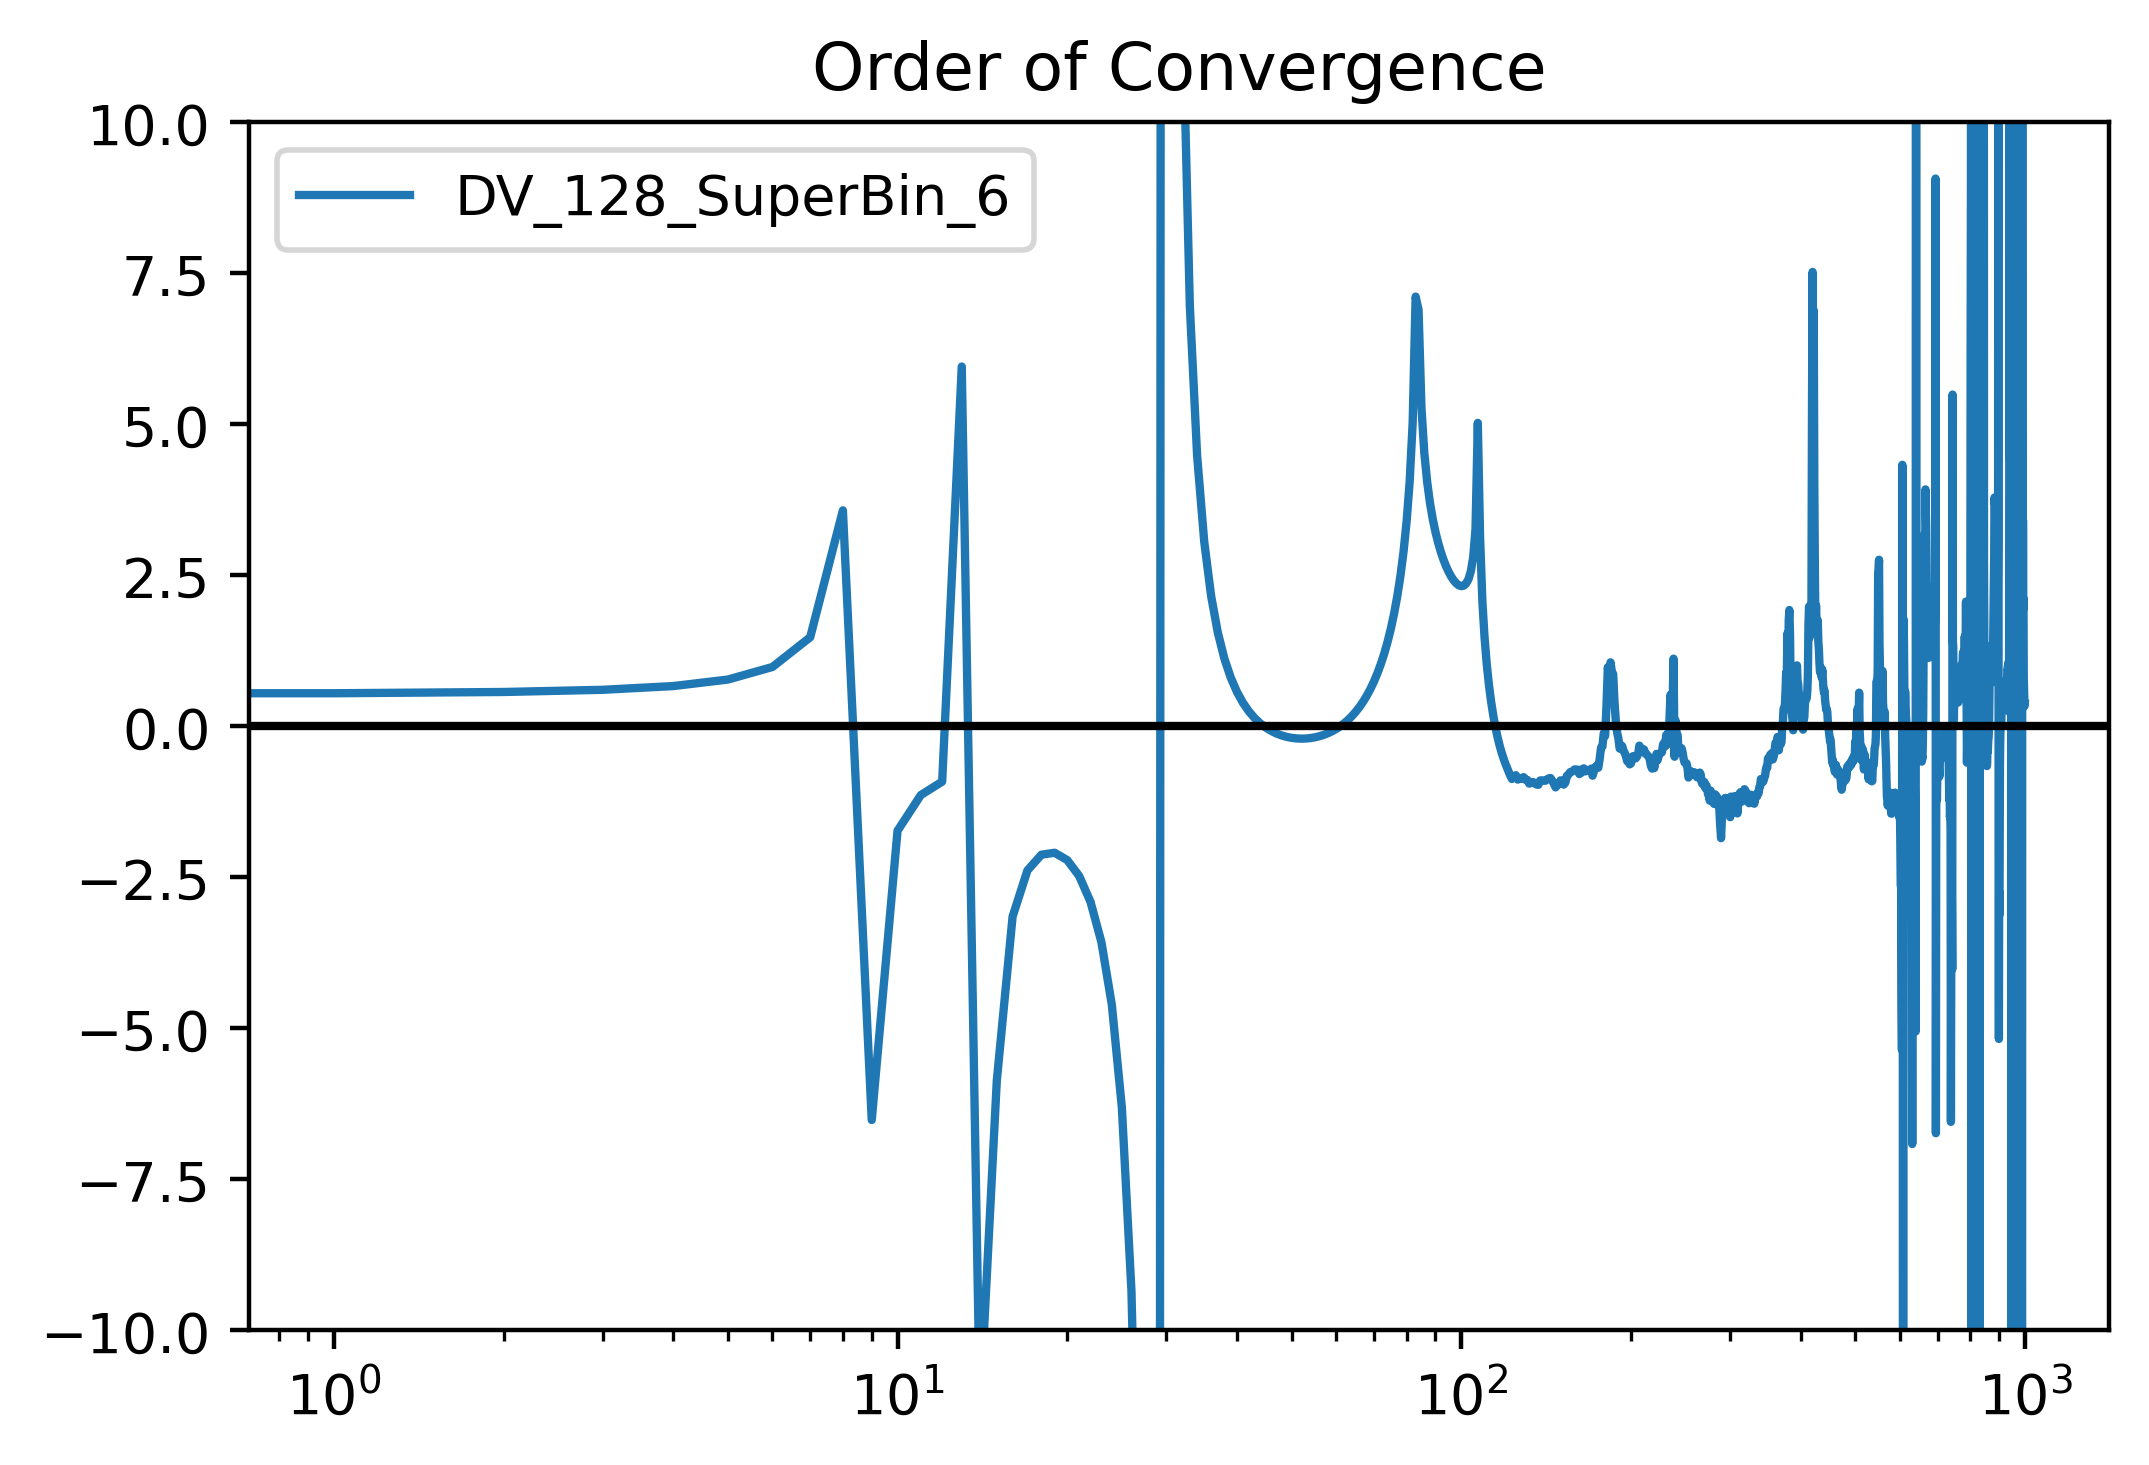

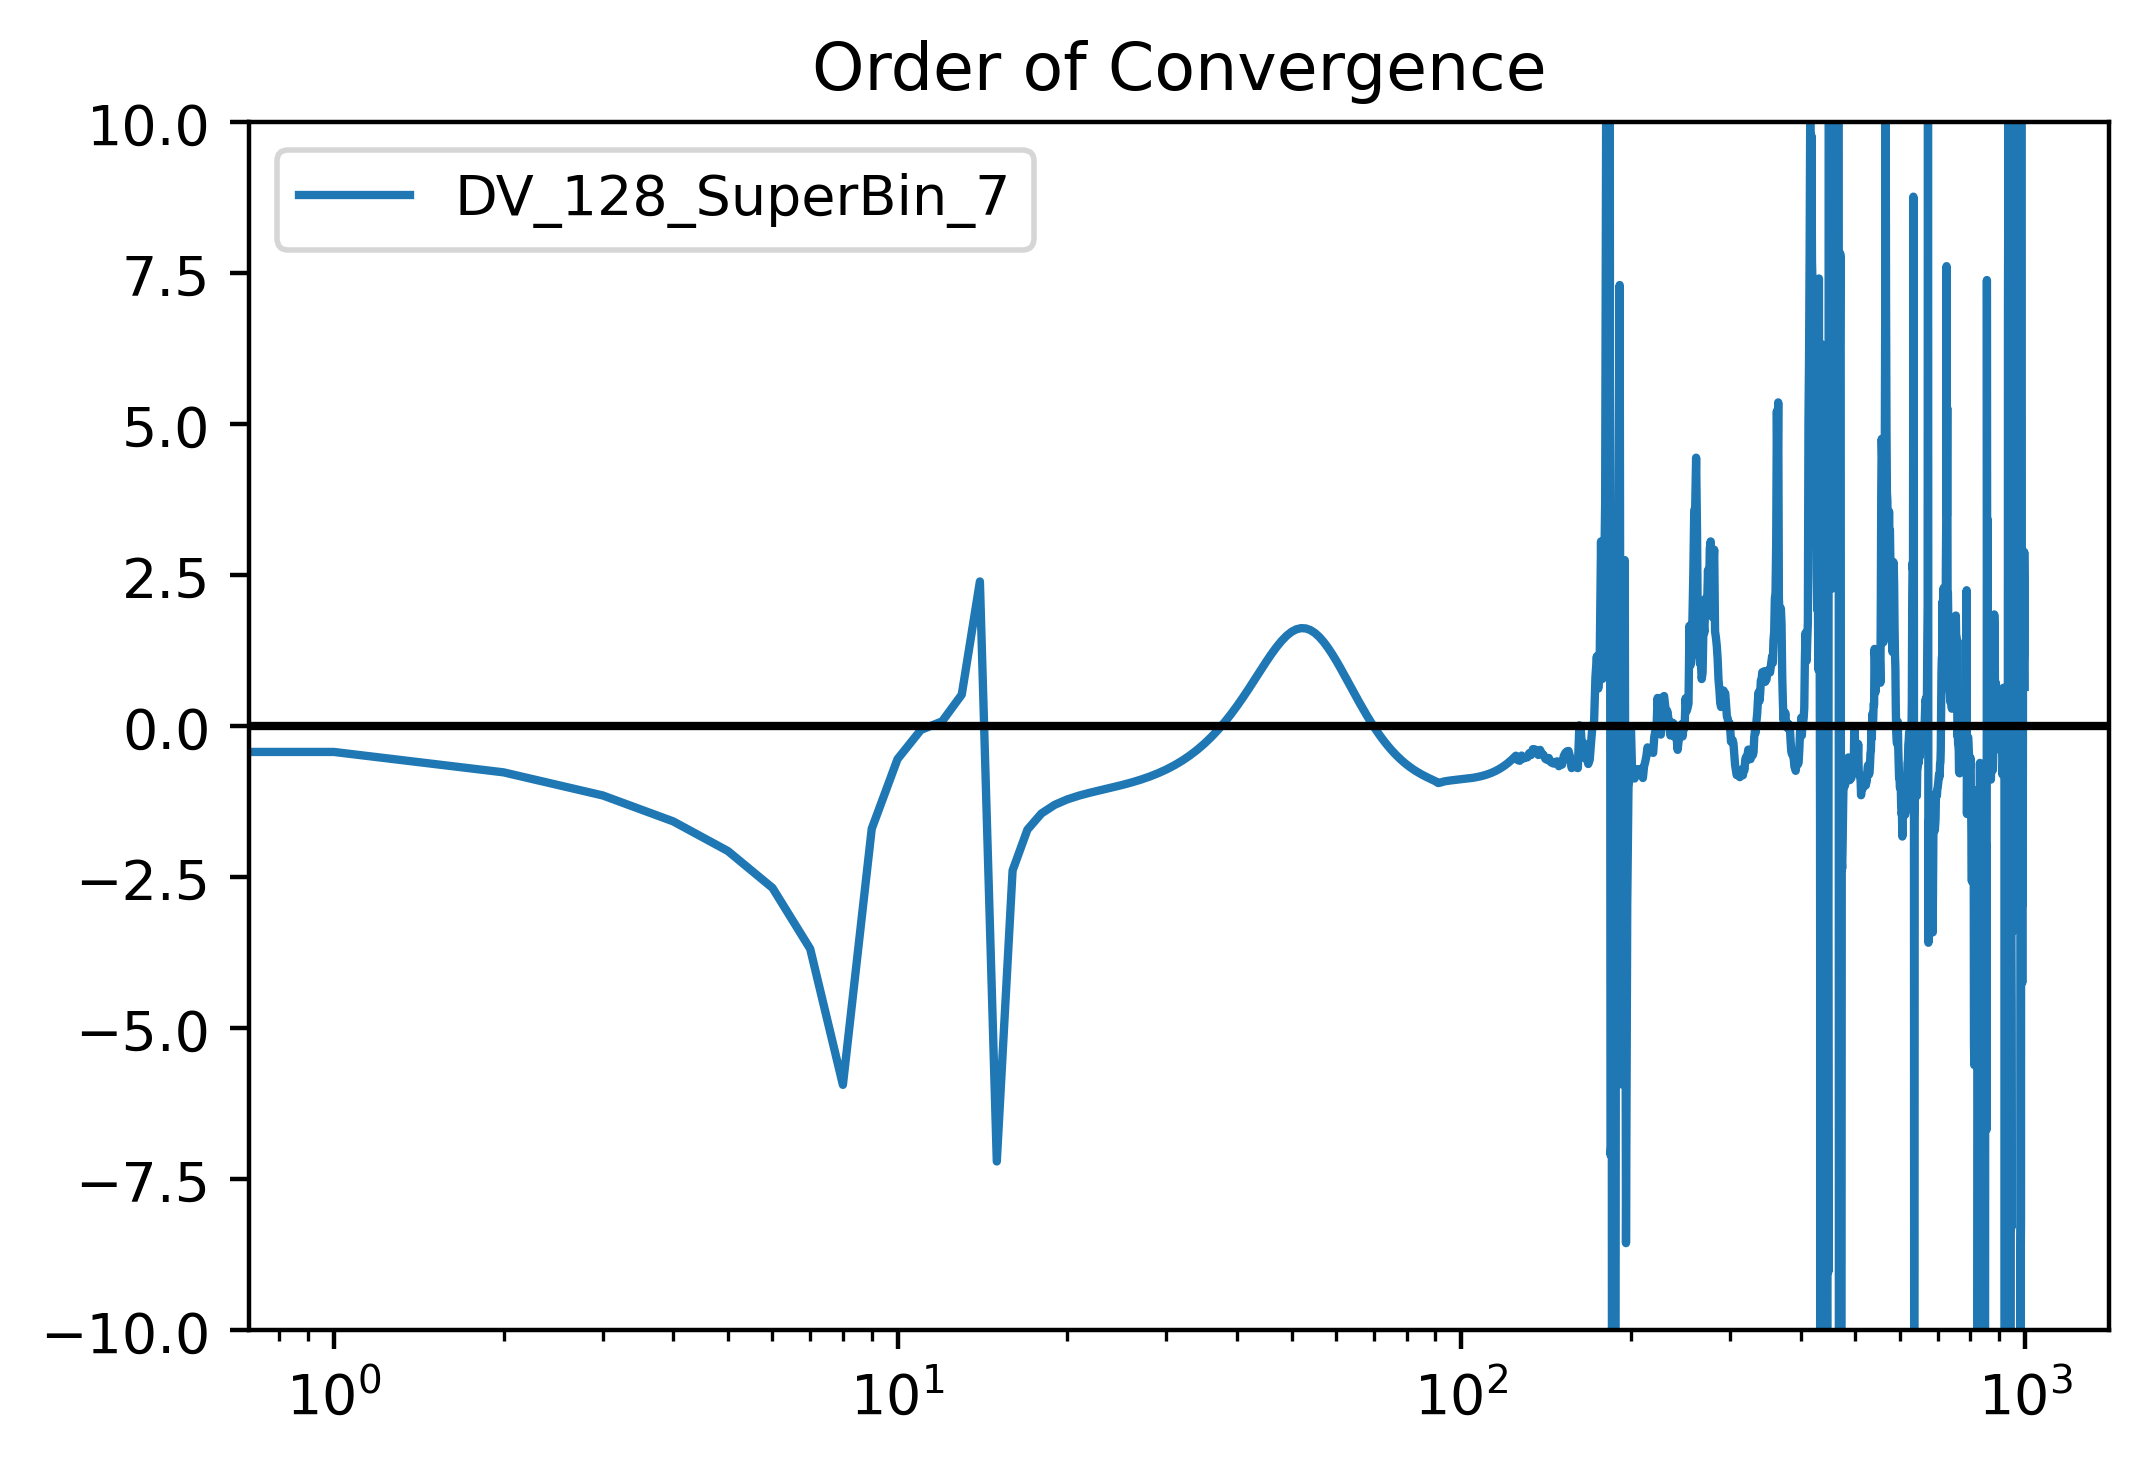

In [143]:
for i in range(9):
    XkMinus2 = smoothRatio[i:36:9,:1000][3]
    XkMinus1 = smoothRatio[i:36:9,:1000][0]
    Xk = smoothRatio[i:36:9,:1000][1]
    XkPlus1 = smoothRatio[i:36:9,:1000][2]

    q = np.log(np.abs((XkPlus1-Xk)/(Xk-XkMinus1)))/np.log(np.abs((Xk-XkMinus1)/(XkMinus1-XkMinus2)))
    
    print(np.mean(q))
    
    plt.figure(dpi=400)
    plt.semilogx(q);
    plt.legend(titles[i:36:9]);
    plt.ylim([-10,10])
    plt.axhline(y=0,color='k')
    plt.title('Order of Convergence')